## Imports

In [ ]:
!pip install h2o

     |████████████████████████████████| 175.8 MB 29 kB/s 
  Created wheel for h2o: filename=h2o-3.34.0.7-py2.py3-none-any.whl size=175908084 sha256=6adf76f3596d7be13355e781ac4f5ee266f1028dc09900bc3ae15853430d1a2b
  Stored in directory: /root/.cache/pip/wheels/df/df/05/1f2ac68a5d9bf38b74f2b8218443b2c00f1a5f4f3154ec11b6
Successfully built h2o


In [ ]:
# Load the H2O library and start up the H2O cluter locally on your machine
import h2o

# Number of threads, nthreads = -1, means use all cores on your machine
# max_mem_size is the maximum memory (in GB) to allocate to H2O
h2o.init(nthreads = -1, max_mem_size = 8)

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.11" 2021-04-20; OpenJDK Runtime Environment (build 11.0.11+9-Ubuntu-0ubuntu2.18.04); OpenJDK 64-Bit Server VM (build 11.0.11+9-Ubuntu-0ubuntu2.18.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.7/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpeeplpgnp
  JVM stdout: /tmp/tmpeeplpgnp/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpeeplpgnp/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


--------------------------  ------------------------------------------------------------------
H2O_cluster_uptime:         05 secs
H2O_cluster_timezone:       Etc/UTC
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.34.0.7
H2O_cluster_version_age:    2 days
H2O_cluster_name:           H2O_from_python_unknownUser_lerehl
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    8 Gb
H2O_cluster_total_cores:    2
H2O_cluster_allowed_cores:  2
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://127.0.0.1:54321
H2O_connection_proxy:       {"http": null, "https": null}
H2O_internal_security:      False
H2O_API_Extensions:         Amazon S3, XGBoost, Algos, AutoML, Core V3, TargetEncoder, Core V4
Python_version:             3.7.12 final
--------------------------  ------------------------------------------------------------------

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix, accuracy_score, auc
import os
import numpy as np
from sklearn.metrics import roc_curve, roc_auc_score
from matplotlib import pyplot as plt

In [ ]:
os.mkdir('Models')

## Read Data

In [ ]:
data1 = '5-6_Balanced_Stunting.csv'
data2 = '5-6_Balanced_Wasting.csv'
data3 = '5-6_Balanced_Stunted_Wasting.csv'

# path = pd.read_csv('/content/drive/MyDrive/JNMC research/New_Dataset_5-6.csv')
df1 = h2o.import_file(data1)
df2 = h2o.import_file(data2)
df3 = h2o.import_file(data3)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [ ]:
df1

C1 state area religion caste type of family father's education father's occupation mother's education mother's occupation total family members exposure to mass media Source of drinking water Toilet Facility mother's age mother's bmi child's age sex of child birth weight initiation of bf(early initiation) wealth index months of bf history of illness immunization index to birth history no of living children sex of household head dietary score H/A 
 
 
 0 4 0 1 0 1 2 0 2 0 4 1 0 1 3 2 2 1 2 1 1 1 1 2 0 1 1 0 1 
 1 4 0 2 0 1 3 0 1 0 5 1 0 1 3 0 4 1 2 1 0 1 1 2 0 1 1 0 1 
 2 4 0 1 1 1 3 0 3 6 6 1 0 0 0 2 6 0 2 1 3 0 1 2 0 1 1 0 0 
 3 4 0 1 1 1 3 0 3 6 6 1 0 0 0 2 1 1 2 1 3 0 0 0 1 1 1 0 1 
 4 4 0 0 2 1 1 5 1 6 7 1 1 1 3 0 5 0 2 1 0 0 0 2 0 0 1 0 0 
 5 4 0 2 0 0 1 0 1 0 2 1 0 1 3 0 3 0 2 1 1 0 1 2 0 1 1 0 1 
 6 4 0 1 1 0 3 0 2 0 2 1 0 1 3 0 2 1 2 1 0 1 0 2 0 1 1 0 1 
 7 4 0 1 1 1 3 3 0 6 7 1 0 0 0 0 1 1 0 1 4 0 0 0 0 0 1 0 0 
 8 4 1 1 0 0 3 4 3 6 2 1 0 0 0 0 3 0 0 0 4 0 0 2 0 1 1 0 0 
 9 4 1 1 2 1 3 5 3 6 3 1 0 0 3 0 0 1 0 1 4 0 0 2 0 0 1 0 1

In [ ]:
type(df1)

h2o.frame.H2OFrame

In [ ]:
df1 = df1.drop(['C1'], axis = 1)
df2 = df2.drop(['C1'], axis = 1)
df3 = df3.drop(['C1'], axis = 1)

In [ ]:
df2

state area religion caste type of family father's education father's occupation mother's education mother's occupation total family members exposure to mass media Source of drinking water Toilet Facility mother's age mother's bmi child's age sex of child birth weight initiation of bf(early initiation) wealth index months of bf history of illness immunization index to birth history no of living children sex of household head dietary score W/H 
 
 
 4 0 1 0 1 2 0 2 0 4 1 0 1 3 2 2 1 2 1 1 1 1 2 0 1 1 0 1 
 4 0 2 0 1 3 0 1 0 5 1 0 1 3 0 4 1 2 1 0 1 1 2 0 1 1 0 0 
 4 0 1 1 1 3 0 3 6 6 1 0 0 0 2 6 0 2 1 3 0 1 2 0 1 1 0 0 
 4 0 1 1 1 3 0 3 6 6 1 0 0 0 2 1 1 2 1 3 0 0 0 1 1 1 0 0 
 4 0 0 2 1 1 5 1 6 7 1 1 1 3 0 5 0 2 1 0 0 0 2 0 0 1 0 0 
 4 0 2 0 0 1 0 1 0 2 1 0 1 3 0 3 0 2 1 1 0 1 2 0 1 1 0 0 
 4 0 1 1 0 3 0 2 0 2 1 0 1 3 0 2 1 2 1 0 1 0 2 0 1 1 0 0 
 4 0 1 1 1 3 3 0 6 7 1 0 0 0 0 1 1 0 1 4 0 0 0 0 0 1 0 0 
 4 1 1 0 0 3 4 3 6 2 1 0 0 0 0 3 0 0 0 4 0 0 2 0 1 1 0 0 
 4 1 1 2 1 3 5 3 6 3 1 0 0 3 0 0 1 0 1 4 0 0 2 0 0 1 0 0

In [ ]:
df2.shape

(60833, 28)

In [ ]:
df3

state area religion caste type of family father's education father's occupation mother's education mother's occupation total family members exposure to mass media Source of drinking water Toilet Facility mother's age mother's bmi child's age sex of child birth weight initiation of bf(early initiation) wealth index months of bf history of illness immunization index to birth history no of living children sex of household head dietary score HAWH 
 
 
 4 0 1 0 1 2 0 2 0 4 1 0 1 3 2 2 1 2 1 1 1 1 2 0 1 1 0 1 
 4 0 2 0 1 3 0 1 0 5 1 0 1 3 0 4 1 2 1 0 1 1 2 0 1 1 0 0 
 4 0 1 1 1 3 0 3 6 6 1 0 0 0 2 6 0 2 1 3 0 1 2 0 1 1 0 0 
 4 0 1 1 1 3 0 3 6 6 1 0 0 0 2 1 1 2 1 3 0 0 0 1 1 1 0 0 
 4 0 0 2 1 1 5 1 6 7 1 1 1 3 0 5 0 2 1 0 0 0 2 0 0 1 0 0 
 4 0 2 0 0 1 0 1 0 2 1 0 1 3 0 3 0 2 1 1 0 1 2 0 1 1 0 0 
 4 0 1 1 0 3 0 2 0 2 1 0 1 3 0 2 1 2 1 0 1 0 2 0 1 1 0 0 
 4 0 1 1 1 3 3 0 6 7 1 0 0 0 0 1 1 0 1 4 0 0 0 0 0 1 0 0 
 4 1 1 0 0 3 4 3 6 2 1 0 0 0 0 3 0 0 0 4 0 0 2 0 1 1 0 0 
 4 1 1 2 1 3 5 3 6 3 1 0 0 3 0 0 1 0 1 4 0 0 2 0 0 1 0 0

In [ ]:
df3.shape

(69491, 28)

## Splitting Data

In [ ]:
df1['H/A'] = df1['H/A'].asfactor()  #encode the binary repsonse as a factor
df1['H/A'].levels() 

[['0', '1']]

In [ ]:
df3['HAWH'] = df3['HAWH'].asfactor()  #encode the binary repsonse as a factor
df3['HAWH'].levels() 

[['0', '1']]

In [ ]:
df2['W/H'] = df2['W/H'].asfactor()  #encode the binary repsonse as a factor
df2['W/H'].levels() 

[['0', '1']]

In [ ]:
# Partition data into 70%, 15%, 15% chunks
# Setting a seed will guarantee reproducibility
splits1 = df1.split_frame(ratios=[0.75, 0.10], seed=247) 
 
train1 = splits1[0]
valid1 = splits1[1]
test1 = splits1[2]

In [ ]:
# Partition data into 70%, 15%, 15% chunks
# Setting a seed will guarantee reproducibility
splits2 = df2.split_frame(ratios=[0.75, 0.10], seed=247) 
 
train2 = splits2[0]
valid2 = splits2[1]
test2 = splits2[2]

In [ ]:
# Partition data into 70%, 15%, 15% chunks
# Setting a seed will guarantee reproducibility
splits3 = df3.split_frame(ratios=[0.75, 0.10], seed=247) 
 
train3 = splits3[0]
valid3 = splits3[1]
test3 = splits3[2]

In [ ]:
y2_true = test2['W/H']
y1_true = test1['H/A']
y3_true = test3['HAWH']

In [ ]:
print('HA rows......')
print(train1.nrow)
print(valid1.nrow)
print(test1.nrow)

print('WH rows......')
print(train2.nrow)
print(valid2.nrow)
print(test2.nrow)

print('HAWH rows......')
print(train3.nrow)
print(valid3.nrow)
print(test3.nrow)

HA rows......
29352
3849
5850
WH rows......
45604
6038
9191
HAWH rows......
52112
6889
10490


In [ ]:
y1 = 'H/A'
y2 = 'W/H'
y3 = 'HAWH'
x1 = list(df1.columns)
x2 = list(df2.columns)
x3 = list(df3.columns)

In [ ]:
x1.remove(y1)  #remove the response
x2.remove(y2)
x3.remove(y3)

# Function to test model

In [ ]:
def test_model(df, output, model):
  preds = model.predict(df)
  print(f'shape of preds is {preds.shape}')
  pred = preds['predict']
  print(f'shape of preds is {pred.shape}')
  true = df[output]
  true = true.as_data_frame().to_numpy()
  pred = pred.as_data_frame().to_numpy()
  accuracy = accuracy_score(true, pred)
  print(f'accuracy is {accuracy}')
  # perf = model.model_performance(df)
  # auc = perf.auc()
  # print(f'roc auc score is {auc}')

# Testing

In [ ]:
saved_model1 = h2o.load_model('/content/glm1_fit2_63_39')
test_model(test, y1, saved_model1)
test_model(train, y1, saved_model1)

H2OResponseError: ignored

In [ ]:
saved_model2 = h2o.load_model('/content/glm2_fit2_59_48')
test_model(test, y2, saved_model2)
test_model(train, y2, saved_model2)

H2OResponseError: ignored

In [ ]:
saved_model3 = h2o.load_model('/content/rf1_fit3_93_70')
test_model(test, 'H/A', saved_model3)
test_model(train, 'H/A', saved_model3)

drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%
accuracy is 0.9343629343629344
roc auc score is 0.9984898391024873
drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%
accuracy is 0.9333822655621964
roc auc score is 0.9986310208207605


In [ ]:
saved_model4 = h2o.load_model('/content/rf2_fit3_92_12')
test_model(test, y2, saved_model4)
test_model(train, y2, saved_model4)

drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%
accuracy is 0.9178659178659179
roc auc score is 0.998740963403211
drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%
accuracy is 0.914892873370382
roc auc score is 0.9988116094471993


In [ ]:
saved_model5 = h2o.load_model('/content/gbm1_fit2_64_19')
test_model(test, y1, saved_model5)
test_model(train, y1, saved_model5)

glm prediction progress: |███████████████████████████████████████████████████████| (done) 100%
accuracy is 0.637065637065637
roc auc score is 0.7106014442847447
glm prediction progress: |███████████████████████████████████████████████████████| (done) 100%
accuracy is 0.6418160847226592
roc auc score is 0.7163490603206977


In [ ]:
saved_model6 = h2o.load_model('/content/gbm2_fit2_60_83')
test_model(test, y2, saved_model6)
test_model(train, y2, saved_model6)

gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%
accuracy is 0.6437346437346437
roc auc score is 0.7429315943902113
gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%
accuracy is 0.6530355457691098
roc auc score is 0.7533628877229844


In [ ]:
saved_model7 = h2o.load_model('/content/dl1_fit3_62_60')
test_model(test, y1, saved_model7)
test_model(train, y1, saved_model7)

deeplearning prediction progress: |██████████████████████████████████████████████| (done) 100%
accuracy is 0.6433836433836434
roc auc score is 0.7187863067433226
deeplearning prediction progress: |██████████████████████████████████████████████| (done) 100%
accuracy is 0.6469190171612317
roc auc score is 0.7216107988518456


In [ ]:
saved_model8 = h2o.load_model('/content/dl2_fit3_60_30')
test_model(test, y2, saved_model8)
test_model(train, y2, saved_model8)

deeplearning prediction progress: |██████████████████████████████████████████████| (done) 100%
accuracy is 0.6272376272376272
roc auc score is 0.7032427633790589
deeplearning prediction progress: |██████████████████████████████████████████████| (done) 100%
accuracy is 0.6211596938240537
roc auc score is 0.706333119450606


In [ ]:
saved_model9 = h2o.load_model('/content/nb1_fit2_56_76')
test_model(test, y1, saved_model9)
test_model(train, y1, saved_model9)

naivebayes prediction progress: |████████████████████████████████████████████████| (done) 100%
accuracy is 0.575991575991576
roc auc score is 0.6764629371781051
naivebayes prediction progress: |████████████████████████████████████████████████| (done) 100%
accuracy is 0.5785537031211772
roc auc score is 0.6770035112761269


In [ ]:
saved_model10 = h2o.load_model('/content/nb2_fit1_54_95')
test_model(test, y2, saved_model10)
test_model(train, y2, saved_model10)

naivebayes prediction progress: |████████████████████████████████████████████████| (done) 100%
accuracy is 0.5524745524745525
roc auc score is 0.6757754909544278
naivebayes prediction progress: |████████████████████████████████████████████████| (done) 100%
accuracy is 0.558386634511202
roc auc score is 0.676527066889423


In [ ]:
saved_model11 = h2o.load_model('/content/aml1_73_145')
test_model(test, y1, saved_model11)
test_model(train, y1, saved_model11)

stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%
accuracy is 0.7286767286767287
roc auc score is 0.8861246481614564
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%
accuracy is 0.7371989794135123
roc auc score is 0.8898856303148015


In [ ]:
saved_model12 = h2o.load_model('/content/aml_72_3557')
test_model(test, y2, saved_model12)
test_model(train, y2, saved_model12)

stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%
accuracy is 0.732011232011232
roc auc score is 0.9040677822274007
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%
accuracy is 0.7340533361294607
roc auc score is 0.9105196961083636


# Models

### GLE

In [ ]:
# Import H2O GLM:
from h2o.estimators.glm import H2OGeneralizedLinearEstimator

#### HAWH

In [ ]:
# Initialize the GLM estimator:
# Similar to R's glm() and H2O's R GLM, H2O's GLM has the "family" argument

glm3_fit1 = H2OGeneralizedLinearEstimator(family='binomial', model_id='glm3_fit1', balance_classes = True, seed = 1234)

In [ ]:
glm3_fit1.train(x=x3, y=y3, training_frame=train3, validation_frame = valid3)

glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
Model Details
H2OGeneralizedLinearEstimator :  Generalized Linear Modeling
Model Key:  glm3_fit1


GLM Model: summary


family  ... number_of_iterations  training_frame
0    binomial  ...                    4  py_22_sid_9cc6

[1 rows x 8 columns]



ModelMetricsBinomialGLM: glm
** Reported on train data. **

MSE: 0.16705066019117829
RMSE: 0.40871831399042824
LogLoss: 0.5072302377706697
Null degrees of freedom: 52111
Residual degrees of freedom: 52084
Null deviance: 72234.66235102201
Residual deviance: 52865.564301410275
AIC: 52921.564301410275
AUC: 0.8322996786025152
AUCPR: 0.82596476642561
Gini: 0.6645993572050304

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3894882999884952: 


0        1   Error                Rate
0      0  16717.0   9660.0  0.3662    (9660.0/26377.0)
1      1   3891.0  21844.0  0.1512    (3891.0/25735.0)
2  Total  20608.0  31504.0    0.26   (13551.0/52112.0)


Maximum Metrics: Maximum metrics at their respective thresholds


metric  threshold         value    idx
0                        max f1   0.389488      0.763256  245.0
1                        max f2   0.187583      0.850875  326.0
2                  max f0point5   0.603537      0.767752  156.0
3                  max accuracy   0.537776      0.757541  183.0
4                 max precision   0.984400      1.000000    0.0
5                    max recall   0.002142      1.000000  399.0
6               max specificity   0.984400      1.000000    0.0
7              max absolute_mcc   0.537776      0.515490  183.0
8    max min_per_class_accuracy   0.503298      0.755848  197.0
9   max mean_per_class_accuracy   0.537776      0.757158  183.0
10                      max tns   0.984400  26377.000000    0.0
11                      max fns   0.984400  25696.000000    0.0
12                      max fps   0.002142  26377.000000  399.0
13                      max tps   0.002142  25735.000000  399.0
14                      max tnr   0.984400      1.000000    0.0
15                      max fnr   0.984400      0.998485    0.0
16                      max fpr   0.002142      1.000000  399.0
17                      max tpr   0.002142      1.000000  399.0


Gains/Lift Table: Avg response rate: 49.38 %, avg score: 49.38 %


group  cumulative_data_fraction  ...  cumulative_gain  kolmogorov_smirnov
0       1                  0.010017  ...        97.839607            0.019362
1       2                  0.020015  ...        96.476120            0.038149
2       3                  0.030051  ...        95.770697            0.056859
3       4                  0.040010  ...        94.919317            0.075030
4       5                  0.050008  ...        93.947300            0.092818
5       6                  0.100015  ...        88.624628            0.175119
6       7                  0.150004  ...        84.361580            0.250011
7       8                  0.200012  ...        80.075120            0.316421
8       9                  0.300008  ...        71.642522            0.424635
9      10                  0.400004  ...        62.481441            0.493773
10     11                  0.500000  ...        51.878764            0.512474
11     12                  0.599996  ...        40.872606            0.484499
12     13                  0.699992  ...        29.918991            0.413764
13     14                  0.799988  ...        19.503371            0.308252
14     15                  0.899985  ...         9.308257            0.165507
15     16                  1.000000  ...         0.000000            0.000000

[16 rows x 14 columns]



ModelMetricsBinomialGLM: glm
** Reported on validation data. **

MSE: 0.1659642160521933
RMSE: 0.4073870592596104
LogLoss: 0.502669317133729
Null degrees of freedom: 6888
Residual degrees of freedom: 6861
Null deviance: 9550.759328217957
Residual deviance: 6925.777851468517
AIC: 6981.777851468517
AUC: 0.8346707696664585
AUCPR: 0.8308534884773495
Gini: 0.669341539332917

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3926763553903168: 


0       1   Error              Rate
0      0  2202.0  1252.0  0.3625   (1252.0/3454.0)
1      1   522.0  2913.0   0.152    (522.0/3435.0)
2  Total  2724.0  4165.0  0.2575   (1774.0/6889.0)


Maximum Metrics: Maximum metrics at their respective thresholds


metric  threshold        value    idx
0                        max f1   0.392676     0.766579  238.0
1                        max f2   0.153292     0.853690  336.0
2                  max f0point5   0.597913     0.771300  159.0
3                  max accuracy   0.561965     0.756133  172.0
4                 max precision   0.984601     1.000000    0.0
5                    max recall   0.003750     1.000000  399.0
6               max specificity   0.984601     1.000000    0.0
7              max absolute_mcc   0.569801     0.515275  169.0
8    max min_per_class_accuracy   0.500758     0.753040  195.0
9   max mean_per_class_accuracy   0.561965     0.755980  172.0
10                      max tns   0.984601  3454.000000    0.0
11                      max fns   0.984601  3427.000000    0.0
12                      max fps   0.003750  3454.000000  399.0
13                      max tps   0.003750  3435.000000  399.0
14                      max tnr   0.984601     1.000000    0.0
15                      max fnr   0.984601     0.997671    0.0
16                      max fpr   0.003750     1.000000  399.0
17                      max tpr   0.003750     1.000000  399.0


Gains/Lift Table: Avg response rate: 49.86 %, avg score: 49.40 %


group  cumulative_data_fraction  ...  cumulative_gain  kolmogorov_smirnov
0       1                  0.010016  ...        97.646562            0.019507
1       2                  0.020032  ...        96.193279            0.038433
2       3                  0.030193  ...        93.803745            0.056489
3       4                  0.040064  ...        91.833428            0.073382
4       5                  0.050080  ...        90.089488            0.089985
5       6                  0.100160  ...        86.601607            0.173003
6       7                  0.150240  ...        83.695040            0.250794
7       8                  0.200029  ...        80.905327            0.322778
8       9                  0.300044  ...        72.221483            0.432200
9      10                  0.400058  ...        62.057990            0.495170
10     11                  0.500073  ...        50.720480            0.505883
11     12                  0.599942  ...        40.527913            0.484950
12     13                  0.699956  ...        29.847962            0.416696
13     14                  0.799971  ...        19.473040            0.310700
14     15                  0.900131  ...         9.865986            0.177125
15     16                  1.000000  ...         0.000000            0.000000

[16 rows x 14 columns]



Scoring History: 


timestamp  ... validation_lift  validation_classification_error
0    2021-12-23 16:13:08  ...                                                 
1    2021-12-23 16:13:08  ...                                                 
2    2021-12-23 16:13:08  ...                                                 
3    2021-12-23 16:13:08  ...                                                 
4    2021-12-23 16:13:09  ...         1.97647                         0.257512

[5 rows x 20 columns]


Variable Importances: 


variable  ...  percentage
0               exposure to mass media  ...    0.076901
1                       type of family  ...    0.059616
2                        dietary score  ...    0.057910
3                          child's age  ...    0.057859
4                                 area  ...    0.056023
5               index to birth history  ...    0.055964
6                   history of illness  ...    0.054120
7   initiation of bf(early initiation)  ...    0.051608
8                         wealth index  ...    0.050909
9                                state  ...    0.047631
10                        months of bf  ...    0.045290
11            Source of drinking water  ...    0.044996
12               no of living children  ...    0.042022
13                            religion  ...    0.037017
14                               caste  ...    0.035777
15                        sex of child  ...    0.034292
16                  mother's education  ...    0.033798
17                        immunization  ...    0.030102
18                     Toilet Facility  ...    0.025952
19               sex of household head  ...    0.023590

[20 rows x 4 columns]


See the whole table with table.as_data_frame()


In [ ]:
glm3_fit2 = H2OGeneralizedLinearEstimator(family='binomial', model_id='glm3_fit2', balance_classes = True, seed = 1234, lambda_search=True)
glm3_fit2.train(x=x3, y=y3, training_frame=train3, validation_frame=valid3)

glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
Model Details
H2OGeneralizedLinearEstimator :  Generalized Linear Modeling
Model Key:  glm3_fit2


GLM Model: summary


family  ... number_of_iterations  training_frame
0    binomial  ...                   90  py_22_sid_9cc6

[1 rows x 9 columns]



ModelMetricsBinomialGLM: glm
** Reported on train data. **

MSE: 0.16714714035216557
RMSE: 0.40883632464858793
LogLoss: 0.5073448556747683
Null degrees of freedom: 52111
Residual degrees of freedom: 52084
Null deviance: 72234.66235102201
Residual deviance: 52877.510237847055
AIC: 52933.510237847055
AUC: 0.8321834756052777
AUCPR: 0.8257394312352884
Gini: 0.6643669512105554

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.39326814274287775: 


0        1   Error                Rate
0      0  16768.0   9609.0  0.3643    (9609.0/26377.0)
1      1   3906.0  21829.0  0.1518    (3906.0/25735.0)
2  Total  20674.0  31438.0  0.2593   (13515.0/52112.0)


Maximum Metrics: Maximum metrics at their respective thresholds


metric  threshold         value    idx
0                        max f1   0.393268      0.763612  241.0
1                        max f2   0.192429      0.850850  323.0
2                  max f0point5   0.592889      0.766917  160.0
3                  max accuracy   0.540970      0.757004  182.0
4                 max precision   0.987516      1.000000    0.0
5                    max recall   0.002390      1.000000  399.0
6               max specificity   0.987516      1.000000    0.0
7              max absolute_mcc   0.540970      0.514609  182.0
8    max min_per_class_accuracy   0.504069      0.756530  197.0
9   max mean_per_class_accuracy   0.508260      0.756840  195.0
10                      max tns   0.987516  26377.000000    0.0
11                      max fns   0.987516  25728.000000    0.0
12                      max fps   0.002390  26377.000000  399.0
13                      max tps   0.002390  25735.000000  399.0
14                      max tnr   0.987516      1.000000    0.0
15                      max fnr   0.987516      0.999728    0.0
16                      max fpr   0.002390      1.000000  399.0
17                      max tpr   0.002390      1.000000  399.0


Gains/Lift Table: Avg response rate: 49.38 %, avg score: 49.38 %


group  cumulative_data_fraction  ...  cumulative_gain  kolmogorov_smirnov
0       1                  0.010017  ...        97.839607            0.019362
1       2                  0.020034  ...        96.675845            0.038264
2       3                  0.030012  ...        95.762098            0.056781
3       4                  0.040010  ...        95.016437            0.075107
4       5                  0.050027  ...        93.950579            0.092857
5       6                  0.100054  ...        88.862968            0.175657
6       7                  0.150004  ...        84.180250            0.249474
7       8                  0.200012  ...        80.016837            0.316190
8       9                  0.300008  ...        71.474144            0.423637
9      10                  0.400004  ...        62.432869            0.493389
10     11                  0.500000  ...        51.839907            0.512090
11     12                  0.599996  ...        40.885559            0.484653
12     13                  0.699992  ...        29.913440            0.413687
13     14                  0.799988  ...        19.479085            0.307868
14     15                  0.899985  ...         9.316892            0.165660
15     16                  1.000000  ...         0.000000            0.000000

[16 rows x 14 columns]



ModelMetricsBinomialGLM: glm
** Reported on validation data. **

MSE: 0.1660311532115238
RMSE: 0.4074692052309276
LogLoss: 0.5028434685618818
Null degrees of freedom: 6888
Residual degrees of freedom: 6861
Null deviance: 9550.759328217957
Residual deviance: 6928.177309845607
AIC: 6984.177309845607
AUC: 0.8346172064707374
AUCPR: 0.8307666730450831
Gini: 0.6692344129414749

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3929413939921376: 


0       1   Error              Rate
0      0  2188.0  1266.0  0.3665   (1266.0/3454.0)
1      1   513.0  2922.0  0.1493    (513.0/3435.0)
2  Total  2701.0  4188.0  0.2582   (1779.0/6889.0)


Maximum Metrics: Maximum metrics at their respective thresholds


metric  threshold        value    idx
0                        max f1   0.392941     0.766627  240.0
1                        max f2   0.157598     0.853640  334.0
2                  max f0point5   0.587787     0.771963  162.0
3                  max accuracy   0.556783     0.756278  175.0
4                 max precision   0.982831     1.000000    0.0
5                    max recall   0.005148     1.000000  398.0
6               max specificity   0.982831     1.000000    0.0
7              max absolute_mcc   0.571779     0.515618  169.0
8    max min_per_class_accuracy   0.502752     0.750509  196.0
9   max mean_per_class_accuracy   0.518725     0.756233  189.0
10                      max tns   0.982831  3454.000000    0.0
11                      max fns   0.982831  3427.000000    0.0
12                      max fps   0.002080  3454.000000  399.0
13                      max tps   0.005148  3435.000000  398.0
14                      max tnr   0.982831     1.000000    0.0
15                      max fnr   0.982831     0.997671    0.0
16                      max fpr   0.002080     1.000000  399.0
17                      max tpr   0.005148     1.000000  398.0


Gains/Lift Table: Avg response rate: 49.86 %, avg score: 49.40 %


group  cumulative_data_fraction  ...  cumulative_gain  kolmogorov_smirnov
0       1                  0.010016  ...        97.646562            0.019507
1       2                  0.020032  ...        96.193279            0.038433
2       3                  0.030048  ...        93.771140            0.056198
3       4                  0.040064  ...        92.560070            0.073962
4       5                  0.050080  ...        90.089488            0.089985
5       6                  0.100160  ...        86.601607            0.173003
6       7                  0.150094  ...        83.678737            0.250503
7       8                  0.200029  ...        80.759787            0.322197
8       9                  0.300044  ...        72.512561            0.433942
9      10                  0.400058  ...        61.694141            0.492267
10     11                  0.500073  ...        50.545833            0.504141
11     12                  0.600087  ...        40.299867            0.482338
12     13                  0.699956  ...        29.640005            0.413793
13     14                  0.799971  ...        19.436649            0.310120
14     15                  0.899985  ...         9.883707            0.177415
15     16                  1.000000  ...         0.000000            0.000000

[16 rows x 14 columns]



Scoring History: 


timestamp  ... validation_lift  validation_classification_error
0     2021-12-23 16:13:46  ...                                                 
1     2021-12-23 16:13:46  ...                                                 
2     2021-12-23 16:13:46  ...                                                 
3     2021-12-23 16:13:46  ...                                                 
4     2021-12-23 16:13:46  ...                                                 
5     2021-12-23 16:13:47  ...                                                 
6     2021-12-23 16:13:47  ...                                                 
7     2021-12-23 16:13:47  ...                                                 
8     2021-12-23 16:13:47  ...                                                 
9     2021-12-23 16:13:47  ...                                                 
10    2021-12-23 16:13:47  ...                                                 
11    2021-12-23 16:13:47  ...                                                 
12    2021-12-23 16:13:48  ...                                                 
13    2021-12-23 16:13:48  ...                                                 
14    2021-12-23 16:13:48  ...                                                 
15    2021-12-23 16:13:48  ...                                                 
16    2021-12-23 16:13:48  ...                                                 
17    2021-12-23 16:13:48  ...                                                 
18    2021-12-23 16:13:48  ...                                                 
19    2021-12-23 16:13:48  ...                                                 

[20 rows x 24 columns]


See the whole table with table.as_data_frame()

Variable Importances: 


variable  ...  percentage
0               exposure to mass media  ...    0.077933
1                       type of family  ...    0.058977
2                          child's age  ...    0.058846
3                        dietary score  ...    0.057650
4               index to birth history  ...    0.056760
5                                 area  ...    0.056156
6                   history of illness  ...    0.054762
7   initiation of bf(early initiation)  ...    0.052288
8                         wealth index  ...    0.051171
9                                state  ...    0.047903
10            Source of drinking water  ...    0.045904
11                        months of bf  ...    0.045744
12               no of living children  ...    0.041332
13                            religion  ...    0.037053
14                               caste  ...    0.036126
15                        sex of child  ...    0.034633
16                  mother's education  ...    0.033979
17                        immunization  ...    0.030199
18                     Toilet Facility  ...    0.025149
19               sex of household head  ...    0.023427

[20 rows x 4 columns]


See the whole table with table.as_data_frame()


In [ ]:
glm3_perf1 = glm3_fit1.model_performance(test3)
glm3_perf2 = glm3_fit2.model_performance(test3)
# Print model performance
print(glm3_perf1)
print(glm3_perf2)


ModelMetricsBinomialGLM: glm
** Reported on test data. **

MSE: 0.16804814379455557
RMSE: 0.409936755847235
LogLoss: 0.5076476959214264
Null degrees of freedom: 10489
Residual degrees of freedom: 10462
Null deviance: 14541.55314331216
Residual deviance: 10650.448660431528
AIC: 10706.448660431528
AUC: 0.8305416453137169
AUCPR: 0.8258274950939005
Gini: 0.6610832906274338

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.37975074895629424: 


0       1   Error               Rate
0      0  3256.0  2035.0  0.3846    (2035.0/5291.0)
1      1   721.0  4478.0  0.1387     (721.0/5199.0)
2  Total  3977.0  6513.0  0.2627   (2756.0/10490.0)


Maximum Metrics: Maximum metrics at their respective thresholds


metric  threshold        value    idx
0                        max f1   0.379751     0.764686  250.0
1                        max f2   0.189171     0.853563  326.0
2                  max f0point5   0.592175     0.762972  163.0
3                  max accuracy   0.530640     0.752050  189.0
4                 max precision   0.984365     1.000000    0.0
5                    max recall   0.002055     1.000000  399.0
6               max specificity   0.984365     1.000000    0.0
7              max absolute_mcc   0.530640     0.504211  189.0
8    max min_per_class_accuracy   0.508743     0.750331  199.0
9   max mean_per_class_accuracy   0.513240     0.751927  197.0
10                      max tns   0.984365  5291.000000    0.0
11                      max fns   0.984365  5191.000000    0.0
12                      max fps   0.002055  5291.000000  399.0
13                      max tps   0.002055  5199.000000  399.0
14                      max tnr   0.984365     1.000000    0.0
15                      max fnr   0.984365     0.998461    0.0
16                      max fpr   0.002055     1.000000  399.0
17                      max tpr   0.002055     1.000000  399.0


Gains/Lift Table: Avg response rate: 49.56 %, avg score: 49.74 %


group  cumulative_data_fraction  ...  cumulative_gain  kolmogorov_smirnov
0       1                  0.010010  ...       101.769571            0.020196
1       2                  0.020019  ...        98.887149            0.039248
2       3                  0.030029  ...        97.285803            0.057919
3       4                  0.040038  ...        96.965534            0.076971
4       5                  0.050048  ...        93.698788            0.092973
5       6                  0.100000  ...        89.844201            0.178126
6       7                  0.150048  ...        84.464049            0.251269
7       8                  0.200000  ...        79.746105            0.316211
8       9                  0.300000  ...        69.776239            0.415018
9      10                  0.400000  ...        60.800154            0.482172
10     11                  0.500000  ...        50.528948            0.500896
11     12                  0.600000  ...        40.636020            0.483393
12     13                  0.700000  ...        30.382216            0.421653
13     14                  0.800000  ...        19.686478            0.312245
14     15                  0.900000  ...         9.572354            0.170804
15     16                  1.000000  ...         0.000000            0.000000

[16 rows x 14 columns]




ModelMetricsBinomialGLM: glm
** Reported on test data. **

MSE: 0.16810391763857332
RMSE: 0.41000477758018056
LogLoss: 0.5077432757617485
Null degrees of freedom: 10489
Residual degrees of freedom: 10462
Null deviance: 14541.55314331216
Residual deviance: 10652.453925481484
AIC: 10708.453925481484
AUC: 0.8305322661929702
AUCPR: 0.8258281124127641
Gini: 0.6610645323859403

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.39416355116831536: 


0       1   Error               Rate
0      0  3338.0  1953.0  0.3691    (1953.0/5291.0)
1      1   762.0  4437.0  0.1466     (762.0/5199.0)
2  Total  4100.0  6390.0  0.2588   (2715.0/10490.0)


Maximum Metrics: Maximum metrics at their respective thresholds


metric  threshold        value    idx
0                        max f1   0.394164     0.765726  236.0
1                        max f2   0.170039     0.853621  327.0
2                  max f0point5   0.588791     0.762623  160.0
3                  max accuracy   0.520957     0.752145  187.0
4                 max precision   0.982922     1.000000    0.0
5                    max recall   0.002576     1.000000  399.0
6               max specificity   0.982922     1.000000    0.0
7              max absolute_mcc   0.520957     0.504248  187.0
8    max min_per_class_accuracy   0.510819     0.749952  191.0
9   max mean_per_class_accuracy   0.520957     0.752054  187.0
10                      max tns   0.982922  5291.000000    0.0
11                      max fns   0.982922  5192.000000    0.0
12                      max fps   0.002576  5291.000000  399.0
13                      max tps   0.002576  5199.000000  399.0
14                      max tnr   0.982922     1.000000    0.0
15                      max fnr   0.982922     0.998654    0.0
16                      max fpr   0.002576     1.000000  399.0
17                      max tpr   0.002576     1.000000  399.0


Gains/Lift Table: Avg response rate: 49.56 %, avg score: 49.74 %


group  cumulative_data_fraction  ...  cumulative_gain  kolmogorov_smirnov
0       1                  0.010010  ...       101.769571            0.020196
1       2                  0.020019  ...        98.887149            0.039248
2       3                  0.030029  ...        98.566879            0.058682
3       4                  0.040038  ...        97.445937            0.077353
4       5                  0.050048  ...        93.698788            0.092973
5       6                  0.100000  ...        89.651856            0.177745
6       7                  0.150048  ...        84.335860            0.250888
7       8                  0.200000  ...        79.842277            0.316593
8       9                  0.300000  ...        69.583894            0.413874
9      10                  0.400000  ...        60.752068            0.481791
10     11                  0.500000  ...        50.605886            0.501659
11     12                  0.600000  ...        40.668077            0.483774
12     13                  0.700000  ...        30.409694            0.422034
13     14                  0.800000  ...        19.662435            0.311864
14     15                  0.900000  ...         9.572354            0.170804
15     16                  1.000000  ...         0.000000            0.000000

[16 rows x 14 columns]

In [ ]:
# Retreive test set AUCROC
print(glm3_perf1.auc())
print(glm3_perf2.auc())

0.8305416453137169
0.8305322661929702


In [ ]:
# Retreive test set AUCPR
print(glm3_perf1.aucpr())
print(glm3_perf2.aucpr())

0.8258274950939005
0.8258281124127641


In [ ]:
# Retreive test set Accuracies
print(glm3_perf1.accuracy())
print(glm3_perf2.accuracy())

[[0.5306398105362057, 0.752049571020019]]
[[0.520956532669858, 0.7521448999046711]]


In [ ]:
# Compare test AUC to the training AUC and validation AUC
print(glm3_fit2.aucpr(train=True))
print(glm3_fit2.aucpr(valid=True))

0.8257394312352884
0.8307666730450831


In [ ]:
test_model(test3, 'HAWH', glm3_fit2)
test_model(train3, 'HAWH', glm3_fit2)
test_model(valid3, 'HAWH', glm3_fit2)

glm prediction progress: |███████████████████████████████████████████████████████| (done) 100%
shape of preds is (10490, 3)
shape of preds is (10490, 1)
accuracy is 0.7408960915157292
glm prediction progress: |███████████████████████████████████████████████████████| (done) 100%
shape of preds is (52112, 3)
shape of preds is (52112, 1)
accuracy is 0.7406355541909733
glm prediction progress: |███████████████████████████████████████████████████████| (done) 100%
shape of preds is (6889, 3)
shape of preds is (6889, 1)
accuracy is 0.7417622296414574


In [ ]:
test_model(test3, 'HAWH', glm3_fit1)
test_model(train3, 'HAWH', glm3_fit1)
test_model(valid3, 'HAWH', glm3_fit1)

glm prediction progress: |███████████████████████████████████████████████████████| (done) 100%
shape of preds is (10490, 3)
shape of preds is (10490, 1)
accuracy is 0.7398474737845567
glm prediction progress: |███████████████████████████████████████████████████████| (done) 100%
shape of preds is (52112, 3)
shape of preds is (52112, 1)
accuracy is 0.7409617746392385
glm prediction progress: |███████████████████████████████████████████████████████| (done) 100%
shape of preds is (6889, 3)
shape of preds is (6889, 1)
accuracy is 0.7421977064886051


In [ ]:
glm3_fit2_HAWH = h2o.save_model(model=glm3_fit2, path="/content/Models", force=True)
print(glm3_fit2_HAWH)

/content/Models/glm3_fit2


#### H/A

In [ ]:
# Initialize the GLM estimator:
# Similar to R's glm() and H2O's R GLM, H2O's GLM has the "family" argument

glm1_fit1 = H2OGeneralizedLinearEstimator(family='binomial', model_id='glm1_fit1', balance_classes = True, seed = 1234)

In [ ]:
glm1_fit1.train(x=x1, y=y1, training_frame=train1, validation_frame = valid1)

glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
Model Details
H2OGeneralizedLinearEstimator :  Generalized Linear Modeling
Model Key:  glm1_fit1


GLM Model: summary


family  ... number_of_iterations  training_frame
0    binomial  ...                    3  py_14_sid_9cc6

[1 rows x 8 columns]



ModelMetricsBinomialGLM: glm
** Reported on train data. **

MSE: 0.22631200853997446
RMSE: 0.4757226172255997
LogLoss: 0.6439334895806474
Null degrees of freedom: 29351
Residual degrees of freedom: 29324
Null deviance: 40465.19983374059
Residual deviance: 37801.47157234233
AIC: 37857.47157234233
AUC: 0.6720470787975831
AUCPR: 0.5966130552034401
Gini: 0.34409415759516615

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.35172912168153797: 


0        1   Error                Rate
0      0  5844.0  10117.0  0.6339   (10117.0/15961.0)
1      1  2063.0  11328.0  0.1541    (2063.0/13391.0)
2  Total  7907.0  21445.0   0.415   (12180.0/29352.0)


Maximum Metrics: Maximum metrics at their respective thresholds


metric  threshold         value    idx
0                        max f1   0.351729      0.650362  272.0
1                        max f2   0.159497      0.807943  385.0
2                  max f0point5   0.459939      0.600810  195.0
3                  max accuracy   0.464064      0.634471  192.0
4                 max precision   0.803873      0.800000    0.0
5                    max recall   0.097546      1.000000  399.0
6               max specificity   0.803873      0.999937    0.0
7              max absolute_mcc   0.452057      0.269496  201.0
8    max min_per_class_accuracy   0.462528      0.633544  193.0
9   max mean_per_class_accuracy   0.452057      0.635237  201.0
10                      max tns   0.803873  15960.000000    0.0
11                      max fns   0.803873  13387.000000    0.0
12                      max fps   0.097546  15961.000000  399.0
13                      max tps   0.097546  13391.000000  399.0
14                      max tnr   0.803873      0.999937    0.0
15                      max fnr   0.803873      0.999701    0.0
16                      max fpr   0.097546      1.000000  399.0
17                      max tpr   0.097546      1.000000  399.0


Gains/Lift Table: Avg response rate: 45.62 %, avg score: 45.62 %


group  cumulative_data_fraction  ...  cumulative_gain  kolmogorov_smirnov
0       1                  0.010016  ...        39.418037            0.007261
1       2                  0.020033  ...        41.281915            0.015208
2       3                  0.030015  ...        41.317881            0.022806
3       4                  0.040031  ...        40.282877            0.029655
4       5                  0.050014  ...        42.146307            0.038764
5       6                  0.100027  ...        43.863411            0.080686
6       7                  0.150007  ...        42.726198            0.117864
7       8                  0.200020  ...        40.789135            0.150036
8       9                  0.300014  ...        37.200349            0.205242
9      10                  0.400007  ...        34.117647            0.250971
10     11                  0.500000  ...        29.265925            0.269098
11     12                  0.599993  ...        22.994452            0.253715
12     13                  0.699986  ...        17.575926            0.226248
13     14                  0.799980  ...        11.588991            0.170491
14     15                  0.899973  ...         6.069476            0.100452
15     16                  1.000000  ...         0.000000            0.000000

[16 rows x 14 columns]



ModelMetricsBinomialGLM: glm
** Reported on validation data. **

MSE: 0.22638832457188054
RMSE: 0.47580282110542443
LogLoss: 0.6443809776956264
Null degrees of freedom: 3848
Residual degrees of freedom: 3821
Null deviance: 5293.6623665572615
Residual deviance: 4960.444766300932
AIC: 5016.444766300932
AUC: 0.6696322653937322
AUCPR: 0.595047633541089
Gini: 0.33926453078746444

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3466728835764859: 


0       1   Error              Rate
0      0  738.0  1391.0  0.6534   (1391.0/2129.0)
1      1  242.0  1478.0  0.1407    (242.0/1720.0)
2  Total  980.0  2869.0  0.4243   (1633.0/3849.0)


Maximum Metrics: Maximum metrics at their respective thresholds


metric  threshold        value    idx
0                        max f1   0.346673     0.644149  277.0
1                        max f2   0.137796     0.802164  395.0
2                  max f0point5   0.503307     0.593610  162.0
3                  max accuracy   0.506697     0.638867  159.0
4                 max precision   0.783148     1.000000    0.0
5                    max recall   0.137796     1.000000  395.0
6               max specificity   0.783148     1.000000    0.0
7              max absolute_mcc   0.503307     0.263958  162.0
8    max min_per_class_accuracy   0.466038     0.630233  190.0
9   max mean_per_class_accuracy   0.459877     0.631930  194.0
10                      max tns   0.783148  2129.000000    0.0
11                      max fns   0.783148  1718.000000    0.0
12                      max fps   0.109552  2129.000000  399.0
13                      max tps   0.137796  1720.000000  395.0
14                      max tnr   0.783148     1.000000    0.0
15                      max fnr   0.783148     0.998837    0.0
16                      max fpr   0.109552     1.000000  399.0
17                      max tpr   0.137796     1.000000  395.0


Gains/Lift Table: Avg response rate: 44.69 %, avg score: 45.83 %


group  cumulative_data_fraction  ...  cumulative_gain  kolmogorov_smirnov
0       1                  0.010133  ...        54.923971            0.010061
1       2                  0.020005  ...        56.935971            0.020592
2       3                  0.030138  ...        56.259523            0.030653
3       4                  0.040010  ...        55.482860            0.040133
4       5                  0.050143  ...        55.369924            0.050194
5       6                  0.100026  ...        49.961039            0.090348
6       7                  0.150169  ...        45.572544            0.123724
7       8                  0.200052  ...        37.754908            0.136549
8       9                  0.300078  ...        39.498641            0.214283
9      10                  0.400104  ...        35.720553            0.258383
10     11                  0.500130  ...        29.036243            0.262540
11     12                  0.599896  ...        22.889502            0.248247
12     13                  0.699922  ...        17.621070            0.222974
13     14                  0.799948  ...        10.981046            0.158810
14     15                  0.899974  ...         5.300197            0.086237
15     16                  1.000000  ...         0.000000            0.000000

[16 rows x 14 columns]



Scoring History: 


timestamp  ... validation_lift  validation_classification_error
0    2021-12-23 17:04:41  ...                                                 
1    2021-12-23 17:04:41  ...                                                 
2    2021-12-23 17:04:41  ...                                                 
3    2021-12-23 17:04:41  ...         1.54924                         0.424266

[4 rows x 20 columns]


Variable Importances: 


variable  ...  percentage
0                          child's age  ...    0.186088
1                         birth weight  ...    0.084828
2                         wealth index  ...    0.082950
3                         months of bf  ...    0.076379
4               index to birth history  ...    0.056883
5                      Toilet Facility  ...    0.047500
6               exposure to mass media  ...    0.043696
7                       type of family  ...    0.042223
8                        dietary score  ...    0.040234
9                         mother's age  ...    0.039960
10            Source of drinking water  ...    0.033526
11               no of living children  ...    0.032298
12                        mother's bmi  ...    0.029547
13                 father's occupation  ...    0.027294
14                total family members  ...    0.026019
15                 mother's occupation  ...    0.025097
16                        immunization  ...    0.022999
17                  history of illness  ...    0.020365
18  initiation of bf(early initiation)  ...    0.016930
19                  mother's education  ...    0.016522

[20 rows x 4 columns]


See the whole table with table.as_data_frame()


In [ ]:
glm1_fit2 = H2OGeneralizedLinearEstimator(family='binomial', model_id='glm1_fit2', lambda_search=True, balance_classes = True, seed = 1234)
glm1_fit2.train(x=x1, y=y1, training_frame=train1, validation_frame=valid1)

glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
Model Details
H2OGeneralizedLinearEstimator :  Generalized Linear Modeling
Model Key:  glm1_fit2


GLM Model: summary


family  ... number_of_iterations  training_frame
0    binomial  ...                   56  py_14_sid_9cc6

[1 rows x 9 columns]



ModelMetricsBinomialGLM: glm
** Reported on train data. **

MSE: 0.22639332437279983
RMSE: 0.47580807514459
LogLoss: 0.644100632911434
Null degrees of freedom: 29351
Residual degrees of freedom: 29326
Null deviance: 40465.19983374059
Residual deviance: 37811.283554432826
AIC: 37863.283554432826
AUC: 0.6718369084347375
AUCPR: 0.5960373531418734
Gini: 0.34367381686947507

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3589530894291016: 


0        1   Error                Rate
0      0  5994.0   9967.0  0.6245    (9967.0/15961.0)
1      1  2146.0  11245.0  0.1603    (2146.0/13391.0)
2  Total  8140.0  21212.0  0.4127   (12113.0/29352.0)


Maximum Metrics: Maximum metrics at their respective thresholds


metric  threshold         value    idx
0                        max f1   0.358953      0.649944  267.0
1                        max f2   0.186725      0.808127  376.0
2                  max f0point5   0.459670      0.600459  193.0
3                  max accuracy   0.473608      0.634233  183.0
4                 max precision   0.797161      1.000000    0.0
5                    max recall   0.108822      1.000000  399.0
6               max specificity   0.797161      1.000000    0.0
7              max absolute_mcc   0.459670      0.267989  193.0
8    max min_per_class_accuracy   0.462546      0.633043  191.0
9   max mean_per_class_accuracy   0.459670      0.634504  193.0
10                      max tns   0.797161  15961.000000    0.0
11                      max fns   0.797161  13389.000000    0.0
12                      max fps   0.108822  15961.000000  399.0
13                      max tps   0.108822  13391.000000  399.0
14                      max tnr   0.797161      1.000000    0.0
15                      max fnr   0.797161      0.999851    0.0
16                      max fpr   0.108822      1.000000  399.0
17                      max tpr   0.108822      1.000000  399.0


Gains/Lift Table: Avg response rate: 45.62 %, avg score: 45.62 %


group  cumulative_data_fraction  ...  cumulative_gain  kolmogorov_smirnov
0       1                  0.010016  ...        37.181384            0.006849
1       2                  0.020033  ...        39.790813            0.014659
2       3                  0.030015  ...        39.576287            0.021845
3       4                  0.040031  ...        39.163598            0.028831
4       5                  0.050014  ...        41.549054            0.038214
5       6                  0.100027  ...        43.116844            0.079313
6       7                  0.150007  ...        42.377721            0.116903
7       8                  0.200020  ...        40.863804            0.150311
8       9                  0.300014  ...        37.424370            0.206478
9      10                  0.400007  ...        34.136316            0.251109
10     11                  0.500000  ...        29.280860            0.269235
11     12                  0.599993  ...        22.894881            0.252617
12     13                  0.699986  ...        17.597263            0.226523
13     14                  0.799980  ...        11.682340            0.171865
14     15                  0.899973  ...         6.069476            0.100452
15     16                  1.000000  ...         0.000000            0.000000

[16 rows x 14 columns]



ModelMetricsBinomialGLM: glm
** Reported on validation data. **

MSE: 0.22646817075158907
RMSE: 0.4758867205035134
LogLoss: 0.6445783107694701
Null degrees of freedom: 3848
Residual degrees of freedom: 3823
Null deviance: 5293.6623665572615
Residual deviance: 4961.963836303382
AIC: 5013.963836303382
AUC: 0.6694473876806449
AUCPR: 0.5933767745655669
Gini: 0.33889477536128987

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.35853043490985076: 


0       1   Error              Rate
0      0   783.0  1346.0  0.6322   (1346.0/2129.0)
1      1   266.0  1454.0  0.1547    (266.0/1720.0)
2  Total  1049.0  2800.0  0.4188   (1612.0/3849.0)


Maximum Metrics: Maximum metrics at their respective thresholds


metric  threshold        value    idx
0                        max f1   0.358530     0.643363  271.0
1                        max f2   0.144977     0.802089  395.0
2                  max f0point5   0.497925     0.596397  169.0
3                  max accuracy   0.497925     0.640426  169.0
4                 max precision   0.768207     1.000000    0.0
5                    max recall   0.144977     1.000000  395.0
6               max specificity   0.768207     1.000000    0.0
7              max absolute_mcc   0.497925     0.269065  169.0
8    max min_per_class_accuracy   0.466108     0.631282  190.0
9   max mean_per_class_accuracy   0.497925     0.633639  169.0
10                      max tns   0.768207  2129.000000    0.0
11                      max fns   0.768207  1718.000000    0.0
12                      max fps   0.121440  2129.000000  399.0
13                      max tps   0.144977  1720.000000  395.0
14                      max tnr   0.768207     1.000000    0.0
15                      max fnr   0.768207     0.998837    0.0
16                      max fpr   0.121440     1.000000  399.0
17                      max tpr   0.144977     1.000000  395.0


Gains/Lift Table: Avg response rate: 44.69 %, avg score: 45.83 %


group  cumulative_data_fraction  ...  cumulative_gain  kolmogorov_smirnov
0       1                  0.010133  ...        49.186047            0.009010
1       2                  0.020005  ...        51.123528            0.018490
2       3                  0.030138  ...        54.330393            0.029602
3       4                  0.040010  ...        55.482860            0.040133
4       5                  0.050143  ...        56.529401            0.051246
5       6                  0.100026  ...        49.961039            0.090348
6       7                  0.150169  ...        44.798222            0.121622
7       8                  0.200052  ...        38.626774            0.139702
8       9                  0.300078  ...        38.723648            0.210079
9      10                  0.400104  ...        35.865864            0.259434
10     11                  0.500130  ...        28.803745            0.260438
11     12                  0.599896  ...        23.180250            0.251401
12     13                  0.699922  ...        17.621070            0.222974
13     14                  0.799948  ...        11.053725            0.159861
14     15                  0.899974  ...         5.170995            0.084135
15     16                  1.000000  ...         0.000000            0.000000

[16 rows x 14 columns]



Scoring History: 


timestamp  ... validation_lift  validation_classification_error
0     2021-12-23 17:04:53  ...                                                 
1     2021-12-23 17:04:53  ...                                                 
2     2021-12-23 17:04:53  ...                                                 
3     2021-12-23 17:04:53  ...                                                 
4     2021-12-23 17:04:53  ...                                                 
5     2021-12-23 17:04:53  ...                                                 
6     2021-12-23 17:04:53  ...                                                 
7     2021-12-23 17:04:53  ...                                                 
8     2021-12-23 17:04:53  ...                                                 
9     2021-12-23 17:04:53  ...                                                 
10    2021-12-23 17:04:53  ...                                                 
11    2021-12-23 17:04:53  ...                                                 
12    2021-12-23 17:04:53  ...                                                 
13    2021-12-23 17:04:53  ...                                                 
14    2021-12-23 17:04:53  ...                                                 
15    2021-12-23 17:04:53  ...                                                 
16    2021-12-23 17:04:53  ...                                                 
17    2021-12-23 17:04:53  ...                                                 
18    2021-12-23 17:04:53  ...                                                 
19    2021-12-23 17:04:53  ...                                                 

[20 rows x 24 columns]


See the whole table with table.as_data_frame()

Variable Importances: 


variable  ...  percentage
0                child's age  ...    0.197788
1               birth weight  ...    0.093446
2               wealth index  ...    0.090833
3               months of bf  ...    0.080202
4     index to birth history  ...    0.058786
5            Toilet Facility  ...    0.050685
6     exposure to mass media  ...    0.046742
7               mother's age  ...    0.042476
8              dietary score  ...    0.039918
9             type of family  ...    0.039410
10     no of living children  ...    0.038710
11  Source of drinking water  ...    0.032100
12              mother's bmi  ...    0.028777
13       mother's occupation  ...    0.024477
14       father's occupation  ...    0.023548
15              immunization  ...    0.020599
16      total family members  ...    0.020346
17        history of illness  ...    0.018392
18        mother's education  ...    0.013647
19        father's education  ...    0.012593

[20 rows x 4 columns]


See the whole table with table.as_data_frame()


In [ ]:
glm1_perf1 = glm1_fit1.model_performance(test1)
glm1_perf2 = glm1_fit2.model_performance(test1)
# Print model performance
print(glm1_perf1)
print(glm1_perf2)


ModelMetricsBinomialGLM: glm
** Reported on test data. **

MSE: 0.22742332742857344
RMSE: 0.47688921924129657
LogLoss: 0.6464674673575032
Null degrees of freedom: 5849
Residual degrees of freedom: 5822
Null deviance: 8069.518396275973
Residual deviance: 7563.669368082788
AIC: 7619.669368082788
AUC: 0.6688700248194096
AUCPR: 0.5938543919572948
Gini: 0.3377400496388192

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.35954549271608416: 


0       1   Error              Rate
0      0  1215.0  1953.0  0.6165   (1953.0/3168.0)
1      1   432.0  2250.0  0.1611    (432.0/2682.0)
2  Total  1647.0  4203.0  0.4077   (2385.0/5850.0)


Maximum Metrics: Maximum metrics at their respective thresholds


metric  threshold        value    idx
0                        max f1   0.359545     0.653595  266.0
1                        max f2   0.157820     0.809757  388.0
2                  max f0point5   0.453504     0.600097  196.0
3                  max accuracy   0.466437     0.631966  188.0
4                 max precision   0.735421     0.672727   13.0
5                    max recall   0.126855     1.000000  397.0
6               max specificity   0.826888     0.999684    0.0
7              max absolute_mcc   0.453504     0.264716  196.0
8    max min_per_class_accuracy   0.462131     0.628635  191.0
9   max mean_per_class_accuracy   0.453504     0.632810  196.0
10                      max tns   0.826888  3167.000000    0.0
11                      max fns   0.826888  2682.000000    0.0
12                      max fps   0.086521  3168.000000  399.0
13                      max tps   0.126855  2682.000000  397.0
14                      max tnr   0.826888     0.999684    0.0
15                      max fnr   0.826888     1.000000    0.0
16                      max fpr   0.086521     1.000000  399.0
17                      max tpr   0.126855     1.000000  397.0


Gains/Lift Table: Avg response rate: 45.85 %, avg score: 45.72 %


group  cumulative_data_fraction  ...  cumulative_gain  kolmogorov_smirnov
0       1                  0.010085  ...        44.181549            0.008228
1       2                  0.020000  ...        32.363908            0.011953
2       3                  0.030085  ...        45.000763            0.025000
3       4                  0.040000  ...        40.753169            0.030102
4       5                  0.050085  ...        43.676844            0.040396
5       6                  0.100000  ...        43.176734            0.079730
6       7                  0.150085  ...        38.375044            0.106355
7       8                  0.200000  ...        38.143177            0.140870
8       9                  0.300000  ...        37.832463            0.209583
9      10                  0.400000  ...        31.804623            0.234921
10     11                  0.500000  ...        28.411633            0.262323
11     12                  0.600000  ...        23.291076            0.258055
12     13                  0.700000  ...        17.396399            0.224868
13     14                  0.800000  ...        11.763609            0.173781
14     15                  0.900000  ...         5.849698            0.097218
15     16                  1.000000  ...         0.000000            0.000000

[16 rows x 14 columns]




ModelMetricsBinomialGLM: glm
** Reported on test data. **

MSE: 0.2273871051395365
RMSE: 0.4768512400524261
LogLoss: 0.6463594973063382
Null degrees of freedom: 5849
Residual degrees of freedom: 5824
Null deviance: 8069.518396275973
Residual deviance: 7562.406118484158
AIC: 7614.406118484158
AUC: 0.6691496668775752
AUCPR: 0.5943233790708432
Gini: 0.3382993337551503

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.329605546858318: 


0       1   Error              Rate
0      0   916.0  2252.0  0.7109   (2252.0/3168.0)
1      1   287.0  2395.0   0.107    (287.0/2682.0)
2  Total  1203.0  4647.0   0.434   (2539.0/5850.0)


Maximum Metrics: Maximum metrics at their respective thresholds


metric  threshold        value    idx
0                        max f1   0.329606     0.653568  295.0
1                        max f2   0.179879     0.809706  386.0
2                  max f0point5   0.472668     0.600294  184.0
3                  max accuracy   0.472668     0.633162  184.0
4                 max precision   0.721594     0.677419   13.0
5                    max recall   0.133808     1.000000  398.0
6               max specificity   0.815829     0.999684    0.0
7              max absolute_mcc   0.411496     0.267033  230.0
8    max min_per_class_accuracy   0.461641     0.630366  191.0
9   max mean_per_class_accuracy   0.458801     0.632167  193.0
10                      max tns   0.815829  3167.000000    0.0
11                      max fns   0.815829  2682.000000    0.0
12                      max fps   0.099632  3168.000000  399.0
13                      max tps   0.133808  2682.000000  398.0
14                      max tnr   0.815829     0.999684    0.0
15                      max fnr   0.815829     1.000000    0.0
16                      max fpr   0.099632     1.000000  399.0
17                      max tpr   0.133808     1.000000  398.0


Gains/Lift Table: Avg response rate: 45.85 %, avg score: 45.73 %


group  cumulative_data_fraction  ...  cumulative_gain  kolmogorov_smirnov
0       1                  0.010085  ...        47.878512            0.008917
1       2                  0.020000  ...        32.363908            0.011953
2       3                  0.030085  ...        41.282794            0.022935
3       4                  0.040000  ...        39.821029            0.029413
4       5                  0.050085  ...        40.699086            0.037642
5       6                  0.100000  ...        41.685309            0.076976
6       7                  0.150085  ...        39.120331            0.108421
7       8                  0.200000  ...        37.583893            0.138804
8       9                  0.300000  ...        37.832463            0.209583
9      10                  0.400000  ...        31.991051            0.236298
10     11                  0.500000  ...        28.560776            0.263700
11     12                  0.600000  ...        23.601790            0.261497
12     13                  0.700000  ...        17.662725            0.228311
13     14                  0.800000  ...        11.903430            0.175846
14     15                  0.900000  ...         5.849698            0.097218
15     16                  1.000000  ...         0.000000            0.000000

[16 rows x 14 columns]

In [ ]:
# Retreive test set AUC
print(glm1_perf1.auc())
print(glm1_perf2.auc())

0.6688700248194096
0.6691496668775752


In [ ]:
# Retreive test set AUCPR
print(glm1_perf1.aucpr())
print(glm1_perf2.aucpr())

0.5938543919572948
0.5943233790708432


In [ ]:
# Retreive test set Accuracies
print(glm1_perf1.accuracy())
print(glm1_perf2.accuracy())

[[0.4664373350947236, 0.6319658119658119]]
[[0.47266764178394133, 0.6331623931623932]]


In [ ]:
glm1_fit2_HA = h2o.save_model(model=glm1_fit2, path="/content/Models", force=True)
print(glm1_fit2_HA)

/content/Models/glm1_fit2


In [ ]:
# Compare test AUC to the training AUC and validation AUC
print(glm1_fit2.auc(train=True))
print(glm1_fit2.auc(valid=True))

0.6718369084347375
0.6694473876806449


In [ ]:
test_model(test1, 'H/A', glm1_fit2)

glm prediction progress: |███████████████████████████████████████████████████████| (done) 100%
shape of preds is (5850, 3)
shape of preds is (5850, 1)
accuracy is 0.584957264957265


In [ ]:
test_model(test1, 'H/A', glm1_fit1)

glm prediction progress: |███████████████████████████████████████████████████████| (done) 100%
shape of preds is (5850, 3)
shape of preds is (5850, 1)
accuracy is 0.5796581196581196


#### W/H

In [ ]:
glm2_fit1 = H2OGeneralizedLinearEstimator(family='binomial', model_id='glm2_fit1', balance_classes = True, seed = 1234 )

In [ ]:
glm2_fit1.train(x=x2, y=y2, training_frame=train2, validation_frame = valid2)

glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
Model Details
H2OGeneralizedLinearEstimator :  Generalized Linear Modeling
Model Key:  glm2_fit1


GLM Model: summary


family  ... number_of_iterations  training_frame
0    binomial  ...                    3  py_18_sid_9cc6

[1 rows x 8 columns]



ModelMetricsBinomialGLM: glm
** Reported on train data. **

MSE: 0.19817514046490042
RMSE: 0.4451686651875898
LogLoss: 0.582512854955922
Null degrees of freedom: 45603
Residual degrees of freedom: 45576
Null deviance: 63204.1220950551
Residual deviance: 53129.832474819734
AIC: 53185.832474819734
AUC: 0.7638324322979066
AUCPR: 0.7606516981273235
Gini: 0.5276648645958133

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.4034021381322667: 


0        1   Error                Rate
0      0  12679.0  10556.0  0.4543   (10556.0/23235.0)
1      1   4237.0  18132.0  0.1894    (4237.0/22369.0)
2  Total  16916.0  28688.0  0.3244   (14793.0/45604.0)


Maximum Metrics: Maximum metrics at their respective thresholds


metric  threshold         value    idx
0                        max f1   0.403402      0.710265  238.0
1                        max f2   0.101421      0.829574  372.0
2                  max f0point5   0.567335      0.704329  158.0
3                  max accuracy   0.519965      0.701035  180.0
4                 max precision   0.964617      1.000000    0.0
5                    max recall   0.007055      1.000000  399.0
6               max specificity   0.964617      1.000000    0.0
7              max absolute_mcc   0.537288      0.402245  172.0
8    max min_per_class_accuracy   0.501053      0.697304  189.0
9   max mean_per_class_accuracy   0.519965      0.700543  180.0
10                      max tns   0.964617  23235.000000    0.0
11                      max fns   0.964617  22365.000000    0.0
12                      max fps   0.007055  23235.000000  399.0
13                      max tps   0.007055  22369.000000  399.0
14                      max tnr   0.964617      1.000000    0.0
15                      max fnr   0.964617      0.999821    0.0
16                      max fpr   0.007055      1.000000  399.0
17                      max tpr   0.007055      1.000000  399.0


Gains/Lift Table: Avg response rate: 49.05 %, avg score: 49.05 %


group  cumulative_data_fraction  ...  cumulative_gain  kolmogorov_smirnov
0       1                  0.010021  ...        97.625915            0.019202
1       2                  0.020020  ...        94.939494            0.037306
2       3                  0.030019  ...        92.851352            0.054708
3       4                  0.040018  ...        90.913026            0.071408
4       5                  0.050018  ...        88.855910            0.087231
5       6                  0.100013  ...        80.404536            0.157833
6       7                  0.150009  ...        75.798503            0.223171
7       8                  0.200004  ...        69.829527            0.274119
8       9                  0.299996  ...        58.808407            0.346270
9      10                  0.400009  ...        49.869305            0.391528
10     11                  0.500000  ...        40.408601            0.396556
11     12                  0.599991  ...        31.426363            0.370083
12     13                  0.700004  ...        22.637066            0.311015
13     14                  0.799996  ...        14.774423            0.231984
14     15                  0.899987  ...         7.243237            0.127947
15     16                  1.000000  ...         0.000000            0.000000

[16 rows x 14 columns]



ModelMetricsBinomialGLM: glm
** Reported on validation data. **

MSE: 0.19538339841988334
RMSE: 0.442021943369199
LogLoss: 0.5751985022346251
Null degrees of freedom: 6037
Residual degrees of freedom: 6010
Null deviance: 8370.344047460489
Residual deviance: 6946.097112985333
AIC: 7002.097112985333
AUC: 0.7708689925814133
AUCPR: 0.7657037035013132
Gini: 0.5417379851628266

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.41902903268591196: 


0       1   Error              Rate
0      0  1772.0  1277.0  0.4188   (1277.0/3049.0)
1      1   597.0  2392.0  0.1997    (597.0/2989.0)
2  Total  2369.0  3669.0  0.3104   (1874.0/6038.0)


Maximum Metrics: Maximum metrics at their respective thresholds


metric  threshold        value    idx
0                        max f1   0.419029     0.718534  230.0
1                        max f2   0.148134     0.836040  354.0
2                  max f0point5   0.575859     0.711917  155.0
3                  max accuracy   0.518605     0.705366  182.0
4                 max precision   0.948694     1.000000    0.0
5                    max recall   0.011452     1.000000  399.0
6               max specificity   0.948694     1.000000    0.0
7              max absolute_mcc   0.518605     0.410840  182.0
8    max min_per_class_accuracy   0.500288     0.701869  192.0
9   max mean_per_class_accuracy   0.512665     0.705177  185.0
10                      max tns   0.948694  3049.000000    0.0
11                      max fns   0.948694  2986.000000    0.0
12                      max fps   0.011452  3049.000000  399.0
13                      max tps   0.011452  2989.000000  399.0
14                      max tnr   0.948694     1.000000    0.0
15                      max fnr   0.948694     0.998996    0.0
16                      max fpr   0.011452     1.000000  399.0
17                      max tpr   0.011452     1.000000  399.0


Gains/Lift Table: Avg response rate: 49.50 %, avg score: 48.94 %


group  cumulative_data_fraction  ...  cumulative_gain  kolmogorov_smirnov
0       1                  0.010103  ...        92.072572            0.018421
1       2                  0.020040  ...        88.651502            0.035181
2       3                  0.030142  ...        87.578263            0.052277
3       4                  0.040079  ...        86.147278            0.068375
4       5                  0.050017  ...        87.960491            0.087124
5       6                  0.100033  ...        79.264810            0.157022
6       7                  0.150050  ...        73.913621            0.219632
7       8                  0.200066  ...        68.562433            0.271641
8       9                  0.300099  ...        58.083023            0.345183
9      10                  0.399967  ...        50.397198            0.399178
10     11                  0.500000  ...        41.050519            0.406466
11     12                  0.600033  ...        32.199683            0.382615
12     13                  0.699901  ...        23.565790            0.326628
13     14                  0.799934  ...        15.809189            0.250437
14     15                  0.899967  ...         7.918176            0.141120
15     16                  1.000000  ...         0.000000            0.000000

[16 rows x 14 columns]



Scoring History: 


timestamp  ... validation_lift  validation_classification_error
0    2021-12-23 17:07:39  ...                                                 
1    2021-12-23 17:07:39  ...                                                 
2    2021-12-23 17:07:39  ...                                                 
3    2021-12-23 17:07:39  ...         1.92073                         0.310368

[4 rows x 20 columns]


Variable Importances: 


variable  ...  percentage
0               index to birth history  ...    0.083266
1                         months of bf  ...    0.079027
2               exposure to mass media  ...    0.071998
3                                 area  ...    0.058764
4                        dietary score  ...    0.058377
5   initiation of bf(early initiation)  ...    0.056582
6                                state  ...    0.055145
7                   history of illness  ...    0.052938
8                       type of family  ...    0.045820
9                         sex of child  ...    0.042578
10               no of living children  ...    0.042471
11                               caste  ...    0.039078
12            Source of drinking water  ...    0.038493
13                        wealth index  ...    0.038002
14                            religion  ...    0.033234
15                     Toilet Facility  ...    0.032921
16                  mother's education  ...    0.028762
17               sex of household head  ...    0.028177
18                        immunization  ...    0.023942
19                total family members  ...    0.016906

[20 rows x 4 columns]


See the whole table with table.as_data_frame()


In [ ]:
glm2_fit2 = H2OGeneralizedLinearEstimator(family='binomial', model_id='glm2_fit2', lambda_search=True, balance_classes = True, seed = 1234)
glm2_fit2.train(x=x2, y=y2, training_frame=train2, validation_frame=valid2)

glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
Model Details
H2OGeneralizedLinearEstimator :  Generalized Linear Modeling
Model Key:  glm2_fit2


GLM Model: summary


family  ... number_of_iterations  training_frame
0    binomial  ...                   74  py_18_sid_9cc6

[1 rows x 9 columns]



ModelMetricsBinomialGLM: glm
** Reported on train data. **

MSE: 0.19828669016221104
RMSE: 0.4452939368127653
LogLoss: 0.5826385896710018
Null degrees of freedom: 45603
Residual degrees of freedom: 45576
Null deviance: 63204.1220950551
Residual deviance: 53141.30048671273
AIC: 53197.30048671273
AUC: 0.7638305111587544
AUCPR: 0.7605653564754695
Gini: 0.5276610223175089

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.4089167059364019: 


0        1   Error                Rate
0      0  12779.0  10456.0    0.45   (10456.0/23235.0)
1      1   4308.0  18061.0  0.1926    (4308.0/22369.0)
2  Total  17087.0  28517.0  0.3237   (14764.0/45604.0)


Maximum Metrics: Maximum metrics at their respective thresholds


metric  threshold         value    idx
0                        max f1   0.408917      0.709861  236.0
1                        max f2   0.104841      0.829489  373.0
2                  max f0point5   0.575674      0.703778  150.0
3                  max accuracy   0.532633      0.701517  172.0
4                 max precision   0.960241      1.000000    0.0
5                    max recall   0.008353      1.000000  399.0
6               max specificity   0.960241      1.000000    0.0
7              max absolute_mcc   0.532633      0.403261  172.0
8    max min_per_class_accuracy   0.501119      0.697707  188.0
9   max mean_per_class_accuracy   0.532633      0.700627  172.0
10                      max tns   0.960241  23235.000000    0.0
11                      max fns   0.960241  22365.000000    0.0
12                      max fps   0.008353  23235.000000  399.0
13                      max tps   0.008353  22369.000000  399.0
14                      max tnr   0.960241      1.000000    0.0
15                      max fnr   0.960241      0.999821    0.0
16                      max fpr   0.008353      1.000000  399.0
17                      max tpr   0.008353      1.000000  399.0


Gains/Lift Table: Avg response rate: 49.05 %, avg score: 49.05 %


group  cumulative_data_fraction  ...  cumulative_gain  kolmogorov_smirnov
0       1                  0.010021  ...        96.733699            0.019026
1       2                  0.020020  ...        94.716195            0.037218
2       3                  0.030019  ...        92.404592            0.054445
3       4                  0.040018  ...        90.577895            0.071145
4       5                  0.050018  ...        89.034666            0.087406
5       6                  0.100013  ...        80.225741            0.157482
6       7                  0.150009  ...        75.709099            0.222908
7       8                  0.200004  ...        69.695416            0.273592
8       9                  0.300018  ...        58.722297            0.345788
9      10                  0.400009  ...        49.791074            0.390914
10     11                  0.500000  ...        40.337074            0.395854
11     12                  0.599991  ...        31.374207            0.369469
12     13                  0.700004  ...        22.585975            0.310313
13     14                  0.799996  ...        14.729718            0.231282
14     15                  0.899987  ...         7.248204            0.128034
15     16                  1.000000  ...         0.000000            0.000000

[16 rows x 14 columns]



ModelMetricsBinomialGLM: glm
** Reported on validation data. **

MSE: 0.19549255731186266
RMSE: 0.4421454029070784
LogLoss: 0.5754330693614519
Null degrees of freedom: 6037
Residual degrees of freedom: 6010
Null deviance: 8370.344047460489
Residual deviance: 6948.929745608893
AIC: 7004.929745608893
AUC: 0.7709178763150465
AUCPR: 0.7657434690691534
Gini: 0.541835752630093

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.4242725316897049: 


0       1   Error              Rate
0      0  1790.0  1259.0  0.4129   (1259.0/3049.0)
1      1   611.0  2378.0  0.2044    (611.0/2989.0)
2  Total  2401.0  3637.0  0.3097   (1870.0/6038.0)


Maximum Metrics: Maximum metrics at their respective thresholds


metric  threshold        value    idx
0                        max f1   0.424273     0.717778  230.0
1                        max f2   0.151517     0.836370  356.0
2                  max f0point5   0.574912     0.712308  155.0
3                  max accuracy   0.520806     0.706525  181.0
4                 max precision   0.943605     1.000000    0.0
5                    max recall   0.014616     1.000000  399.0
6               max specificity   0.943605     1.000000    0.0
7              max absolute_mcc   0.520806     0.413298  181.0
8    max min_per_class_accuracy   0.500787     0.702911  192.0
9   max mean_per_class_accuracy   0.520806     0.706223  181.0
10                      max tns   0.943605  3049.000000    0.0
11                      max fns   0.943605  2986.000000    0.0
12                      max fps   0.014616  3049.000000  399.0
13                      max tps   0.014616  2989.000000  399.0
14                      max tnr   0.943605     1.000000    0.0
15                      max fnr   0.943605     0.998996    0.0
16                      max fpr   0.014616     1.000000  399.0
17                      max tpr   0.014616     1.000000  399.0


Gains/Lift Table: Avg response rate: 49.50 %, avg score: 48.93 %


group  cumulative_data_fraction  ...  cumulative_gain  kolmogorov_smirnov
0       1                  0.010103  ...        92.072572            0.018421
1       2                  0.020040  ...        86.982019            0.034519
2       3                  0.030308  ...        87.657111            0.052612
3       4                  0.040079  ...        86.147278            0.068375
4       5                  0.050017  ...        85.284897            0.084474
5       6                  0.100033  ...        79.933708            0.158347
6       7                  0.150050  ...        73.690655            0.218969
7       8                  0.200066  ...        68.729658            0.272304
8       9                  0.300099  ...        58.305989            0.346509
9      10                  0.399967  ...        50.229904            0.397852
10     11                  0.500000  ...        41.251255            0.408454
11     12                  0.600033  ...        32.199683            0.382615
12     13                  0.699901  ...        23.613591            0.327291
13     14                  0.799934  ...        15.767365            0.249775
14     15                  0.899967  ...         7.918176            0.141120
15     16                  1.000000  ...         0.000000            0.000000

[16 rows x 14 columns]



Scoring History: 


timestamp  ... validation_lift  validation_classification_error
0     2021-12-23 17:07:49  ...                                                 
1     2021-12-23 17:07:49  ...                                                 
2     2021-12-23 17:07:49  ...                                                 
3     2021-12-23 17:07:49  ...                                                 
4     2021-12-23 17:07:49  ...                                                 
5     2021-12-23 17:07:49  ...                                                 
6     2021-12-23 17:07:49  ...                                                 
7     2021-12-23 17:07:50  ...                                                 
8     2021-12-23 17:07:50  ...                                                 
9     2021-12-23 17:07:50  ...                                                 
10    2021-12-23 17:07:50  ...                                                 
11    2021-12-23 17:07:50  ...                                                 
12    2021-12-23 17:07:50  ...                                                 
13    2021-12-23 17:07:51  ...                                                 
14    2021-12-23 17:07:51  ...                                                 
15    2021-12-23 17:07:51  ...                                                 
16    2021-12-23 17:07:51  ...                                                 
17    2021-12-23 17:07:51  ...                                                 
18    2021-12-23 17:07:51  ...                                                 
19    2021-12-23 17:07:52  ...                                                 

[20 rows x 24 columns]


See the whole table with table.as_data_frame()

Variable Importances: 


variable  ...  percentage
0               index to birth history  ...    0.085356
1                         months of bf  ...    0.081044
2               exposure to mass media  ...    0.073384
3                        dietary score  ...    0.059055
4                                 area  ...    0.059036
5   initiation of bf(early initiation)  ...    0.057816
6                                state  ...    0.055776
7                   history of illness  ...    0.054005
8                       type of family  ...    0.044490
9                         sex of child  ...    0.043475
10               no of living children  ...    0.041546
11            Source of drinking water  ...    0.039783
12                               caste  ...    0.039684
13                        wealth index  ...    0.037774
14                            religion  ...    0.033222
15                     Toilet Facility  ...    0.031997
16                  mother's education  ...    0.028853
17               sex of household head  ...    0.028110
18                        immunization  ...    0.023512
19                        mother's bmi  ...    0.016245

[20 rows x 4 columns]


See the whole table with table.as_data_frame()


In [ ]:
glm2_perf1 = glm2_fit1.model_performance(test2)
glm2_perf2 = glm2_fit2.model_performance(test2)
# Print model performance
print(glm2_perf1)
print(glm2_perf2)


ModelMetricsBinomialGLM: glm
** Reported on test data. **

MSE: 0.19628420377168326
RMSE: 0.4430397315949025
LogLoss: 0.5765617685103861
Null degrees of freedom: 9190
Residual degrees of freedom: 9163
Null deviance: 12737.567459775688
Residual deviance: 10598.358428757918
AIC: 10654.358428757918
AUC: 0.7682547919936294
AUCPR: 0.7655450653166538
Gini: 0.5365095839872589

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.41996811470822065: 


0       1   Error              Rate
0      0  2674.0  2016.0  0.4299   (2016.0/4690.0)
1      1   882.0  3619.0   0.196    (882.0/4501.0)
2  Total  3556.0  5635.0  0.3153   (2898.0/9191.0)


Maximum Metrics: Maximum metrics at their respective thresholds


metric  threshold        value    idx
0                        max f1   0.419968     0.714088  234.0
1                        max f2   0.137315     0.832550  359.0
2                  max f0point5   0.560816     0.702853  165.0
3                  max accuracy   0.507500     0.702535  190.0
4                 max precision   0.950514     1.000000    0.0
5                    max recall   0.005574     1.000000  399.0
6               max specificity   0.950514     1.000000    0.0
7              max absolute_mcc   0.507500     0.404769  190.0
8    max min_per_class_accuracy   0.501103     0.700213  193.0
9   max mean_per_class_accuracy   0.507500     0.702364  190.0
10                      max tns   0.950514  4690.000000    0.0
11                      max fns   0.950514  4498.000000    0.0
12                      max fps   0.005574  4690.000000  399.0
13                      max tps   0.005574  4501.000000  399.0
14                      max tnr   0.950514     1.000000    0.0
15                      max fnr   0.950514     0.999333    0.0
16                      max fpr   0.005574     1.000000  399.0
17                      max tpr   0.005574     1.000000  399.0


Gains/Lift Table: Avg response rate: 48.97 %, avg score: 49.20 %


group  cumulative_data_fraction  ...  cumulative_gain  kolmogorov_smirnov
0       1                  0.010010  ...       104.199067            0.020440
1       2                  0.020020  ...        98.650179            0.038703
2       3                  0.030029  ...        93.841143            0.055224
3       4                  0.040039  ...        91.436625            0.071746
4       5                  0.050049  ...        89.993914            0.088267
5       6                  0.100098  ...        82.891338            0.162601
6       7                  0.150038  ...        77.841247            0.228877
7       8                  0.200087  ...        70.776599            0.277523
8       9                  0.300076  ...        58.220959            0.342374
9      10                  0.400065  ...        49.497930            0.388068
10     11                  0.500054  ...        40.931123            0.401108
11     12                  0.600044  ...        31.850023            0.374526
12     13                  0.700033  ...        23.617558            0.323999
13     14                  0.800022  ...        15.360115            0.240816
14     15                  0.900011  ...         7.727844            0.136300
15     16                  1.000000  ...         0.000000            0.000000

[16 rows x 14 columns]




ModelMetricsBinomialGLM: glm
** Reported on test data. **

MSE: 0.1964041537661502
RMSE: 0.44317508251948257
LogLoss: 0.5768319325410367
Null degrees of freedom: 9190
Residual degrees of freedom: 9163
Null deviance: 12737.567459775688
Residual deviance: 10603.324583969337
AIC: 10659.324583969337
AUC: 0.7681392052654491
AUCPR: 0.7653220654418256
Gini: 0.5362784105308982

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.42001173297492084: 


0       1   Error              Rate
0      0  2662.0  2028.0  0.4324   (2028.0/4690.0)
1      1   873.0  3628.0   0.194    (873.0/4501.0)
2  Total  3535.0  5656.0  0.3156   (2901.0/9191.0)


Maximum Metrics: Maximum metrics at their respective thresholds


metric  threshold        value    idx
0                        max f1   0.420012     0.714384  233.0
1                        max f2   0.136231     0.832114  360.0
2                  max f0point5   0.563169     0.702930  163.0
3                  max accuracy   0.517872     0.702100  184.0
4                 max precision   0.949874     1.000000    0.0
5                    max recall   0.006575     1.000000  399.0
6               max specificity   0.949874     1.000000    0.0
7              max absolute_mcc   0.517872     0.403773  184.0
8    max min_per_class_accuracy   0.501712     0.700067  193.0
9   max mean_per_class_accuracy   0.517872     0.701584  184.0
10                      max tns   0.949874  4690.000000    0.0
11                      max fns   0.949874  4500.000000    0.0
12                      max fps   0.006575  4690.000000  399.0
13                      max tps   0.006575  4501.000000  399.0
14                      max tnr   0.949874     1.000000    0.0
15                      max fnr   0.949874     0.999778    0.0
16                      max fpr   0.006575     1.000000  399.0
17                      max tpr   0.006575     1.000000  399.0


Gains/Lift Table: Avg response rate: 48.97 %, avg score: 49.20 %


group  cumulative_data_fraction  ...  cumulative_gain  kolmogorov_smirnov
0       1                  0.010010  ...       104.199067            0.020440
1       2                  0.020020  ...       100.869734            0.039574
2       3                  0.030029  ...        93.101292            0.054789
3       4                  0.040039  ...        91.436625            0.071746
4       5                  0.050049  ...        89.993914            0.088267
5       6                  0.100098  ...        82.891338            0.162601
6       7                  0.150038  ...        77.397014            0.227570
7       8                  0.200087  ...        70.887637            0.277958
8       9                  0.300076  ...        58.220959            0.342374
9      10                  0.400065  ...        49.664532            0.389374
10     11                  0.500054  ...        40.931123            0.401108
11     12                  0.600044  ...        31.701919            0.372785
12     13                  0.700033  ...        23.744508            0.325740
13     14                  0.800022  ...        15.415656            0.241687
14     15                  0.900011  ...         7.752530            0.136735
15     16                  1.000000  ...         0.000000            0.000000

[16 rows x 14 columns]

In [ ]:
# Retreive test set AUC
print(glm2_perf1.auc())
print(glm2_perf2.auc())

0.7682547919936294
0.7681392052654491


In [ ]:
# Retreive test set AUC-PR
print(glm2_perf1.aucpr())
print(glm2_perf2.aucpr())

0.7655450653166538
0.7653220654418256


In [ ]:
# Retreive test set AUC
print(glm2_perf1.accuracy())
print(glm2_perf2.accuracy())

[[0.5074997782010008, 0.7025350886737025]]
[[0.5178719931131844, 0.7020998803177021]]


In [ ]:
glm2_fit2_WH = h2o.save_model(model=glm2_fit2, path="/content/Models", force=True)
print(glm2_fit2_WH)

/content/Models/glm2_fit2


In [ ]:
# Compare test AUC to the training AUC and validation AUC
print(glm2_fit2.auc(train=True))
print(glm2_fit2.auc(valid=True))
# print(glm2_fit2.auc(test=True))

0.7638305111587544
0.7709178763150465


In [ ]:
test_model(test2, 'W/H', glm2_fit2)

glm prediction progress: |███████████████████████████████████████████████████████| (done) 100%
shape of preds is (9191, 3)
shape of preds is (9191, 1)
accuracy is 0.6844739418996845


In [ ]:
test_model(test2, 'W/H', glm2_fit1)

glm prediction progress: |███████████████████████████████████████████████████████| (done) 100%
shape of preds is (9191, 3)
shape of preds is (9191, 1)
accuracy is 0.6846915460776847


### Random Forest

In [ ]:
from h2o.estimators.random_forest import H2ORandomForestEstimator

#### HAWH

In [ ]:
# Initialize the RF estimator:

rf3_fit1 = H2ORandomForestEstimator(model_id='rf3_fit1', seed=34, balance_classes = True)

In [ ]:
rf3_fit1.train(x=x3, y=y3, training_frame=train3, validation_frame = valid3)

drf Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
Model Details
H2ORandomForestEstimator :  Distributed Random Forest
Model Key:  rf3_fit1


Model Summary: 


number_of_trees  ...  max_leaves  mean_leaves
0               50.0  ...      6703.0      6446.42

[1 rows x 10 columns]



ModelMetricsBinomial: drf
** Reported on train data. **

MSE: 0.06969623338085543
RMSE: 0.2640004420088259
LogLoss: 0.25617370162012965
Mean Per-Class Error: 0.0758387306246142
AUC: 0.9729701402831455
AUCPR: 0.9755264706385186
Gini: 0.9459402805662911

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.5657046111705603: 


0        1   Error               Rate
0      0  24530.0   1847.0    0.07   (1847.0/26377.0)
1      1   2152.0  24203.0  0.0817   (2152.0/26355.0)
2  Total  26682.0  26050.0  0.0758   (3999.0/52732.0)


Maximum Metrics: Maximum metrics at their respective thresholds


metric     threshold         value    idx
0                        max f1  5.657046e-01      0.923690  195.0
1                        max f2  4.001243e-01      0.935233  251.0
2                  max f0point5  6.924056e-01      0.941332  153.0
3                  max accuracy  5.880672e-01      0.924543  188.0
4                 max precision  9.934387e-01      0.999607    4.0
5                    max recall  7.701648e-07      1.000000  399.0
6               max specificity  9.999835e-01      0.999962    0.0
7              max absolute_mcc  5.880672e-01      0.849412  188.0
8    max min_per_class_accuracy  5.498474e-01      0.922774  200.0
9   max mean_per_class_accuracy  5.826693e-01      0.924538  190.0
10                      max tns  9.999835e-01  26376.000000    0.0
11                      max fns  9.999835e-01  25037.000000    0.0
12                      max fps  7.701648e-07  26377.000000  399.0
13                      max tps  7.701648e-07  26355.000000  399.0
14                      max tnr  9.999835e-01      0.999962    0.0
15                      max fnr  9.999835e-01      0.949991    0.0
16                      max fpr  7.701648e-07      1.000000  399.0
17                      max tpr  7.701648e-07      1.000000  399.0


Gains/Lift Table: Avg response rate: 49.98 %, avg score: 53.63 %


group  cumulative_data_fraction  ...  cumulative_gain  kolmogorov_smirnov
0       1                  0.024615  ...        99.929328            0.049175
1       2                  0.030001  ...        99.957001            0.059951
2       3                  0.040014  ...        99.893823            0.079909
3       4                  0.050008  ...        99.779974            0.099753
4       5                  0.100015  ...        99.590285            0.199128
5       6                  0.150004  ...        99.223446            0.297554
6       7                  0.200011  ...        99.248767            0.396852
7       8                  0.300008  ...        98.616365            0.591466
8       9                  0.400174  ...        96.186484            0.769506
9      10                  0.500057  ...        84.665006            0.846393
10     11                  0.604623  ...        60.440803            0.730574
11     12                  0.701946  ...        40.434113            0.567414
12     13                  0.808522  ...        23.020716            0.372100
13     14                  0.904081  ...        10.483649            0.189482
14     15                  1.000000  ...         0.000000            0.000000

[15 rows x 14 columns]



ModelMetricsBinomial: drf
** Reported on validation data. **

MSE: 0.0680092621008429
RMSE: 0.2607858548710856
LogLoss: 0.24786511297009758
Mean Per-Class Error: 0.07100608622873802
AUC: 0.974425828670259
AUCPR: 0.9768198283952982
Gini: 0.9488516573405179

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.5520875004717667: 


0       1   Error             Rate
0      0  3238.0   216.0  0.0625   (216.0/3454.0)
1      1   273.0  3162.0  0.0795   (273.0/3435.0)
2  Total  3511.0  3378.0   0.071   (489.0/6889.0)


Maximum Metrics: Maximum metrics at their respective thresholds


metric  threshold        value    idx
0                        max f1   0.552088     0.928225  199.0
1                        max f2   0.401954     0.935112  248.0
2                  max f0point5   0.669038     0.946529  161.0
3                  max accuracy   0.580752     0.929598  189.0
4                 max precision   0.999973     1.000000    0.0
5                    max recall   0.039087     1.000000  389.0
6               max specificity   0.999973     1.000000    0.0
7              max absolute_mcc   0.580752     0.859747  189.0
8    max min_per_class_accuracy   0.531318     0.927910  207.0
9   max mean_per_class_accuracy   0.580752     0.929547  189.0
10                      max tns   0.999973  3454.000000    0.0
11                      max fns   0.999973  3411.000000    0.0
12                      max fps   0.000000  3454.000000  399.0
13                      max tps   0.039087  3435.000000  389.0
14                      max tnr   0.999973     1.000000    0.0
15                      max fnr   0.999973     0.993013    0.0
16                      max fpr   0.000000     1.000000  399.0
17                      max tpr   0.039087     1.000000  389.0


Gains/Lift Table: Avg response rate: 49.86 %, avg score: 53.12 %


group  cumulative_data_fraction  ...  cumulative_gain  kolmogorov_smirnov
0       1                  0.010016  ...       100.553130            0.020087
1       2                  0.020032  ...       100.553130            0.040175
2       3                  0.030048  ...       100.553130            0.060262
3       4                  0.040209  ...       100.553130            0.080640
4       5                  0.050080  ...       100.553130            0.100437
5       6                  0.100015  ...       100.553130            0.200582
6       7                  0.150094  ...        99.971254            0.299277
7       8                  0.200029  ...        99.970972            0.398842
8       9                  0.300044  ...        98.418553            0.588973
9      10                  0.400058  ...        96.914648            0.773297
10     11                  0.500073  ...        85.649907            0.854267
11     12                  0.601974  ...        61.429068            0.737540
12     13                  0.700102  ...        40.923607            0.571438
13     14                  0.800406  ...        24.281836            0.387638
14     15                  0.899985  ...        10.886472            0.195414
15     16                  1.000000  ...         0.000000            0.000000

[16 rows x 14 columns]



Scoring History: 


timestamp  ... validation_lift  validation_classification_error
0     2021-12-23 17:10:19  ...             NaN                              NaN
1     2021-12-23 17:10:20  ...        1.569852                         0.179271
2     2021-12-23 17:10:21  ...        1.809502                         0.145014
3     2021-12-23 17:10:22  ...        1.888097                         0.125272
4     2021-12-23 17:10:22  ...        1.949264                         0.108434
5     2021-12-23 17:10:23  ...        1.973929                         0.103643
6     2021-12-23 17:10:27  ...        1.999454                         0.083902
7     2021-12-23 17:10:31  ...        2.005531                         0.074612
8     2021-12-23 17:10:35  ...        2.005531                         0.072870
9     2021-12-23 17:10:40  ...        2.005531                         0.070983
10    2021-12-23 17:10:45  ...        2.005531                         0.069531
11    2021-12-23 17:10:48  ...        2.005531                         0.070983

[12 rows x 16 columns]


Variable Importances: 


variable  ...  percentage
0                          child's age  ...    0.076761
1                         wealth index  ...    0.075819
2                 total family members  ...    0.062743
3                   mother's education  ...    0.060667
4                                state  ...    0.056891
5               exposure to mass media  ...    0.052290
6                no of living children  ...    0.052168
7                                caste  ...    0.044751
8                   father's education  ...    0.043757
9                  father's occupation  ...    0.042232
10                        immunization  ...    0.034884
11                 mother's occupation  ...    0.034188
12                        birth weight  ...    0.031603
13                                area  ...    0.030815
14              index to birth history  ...    0.030503
15                            religion  ...    0.030141
16                        mother's bmi  ...    0.027459
17            Source of drinking water  ...    0.026013
18  initiation of bf(early initiation)  ...    0.026001
19                      type of family  ...    0.025181

[20 rows x 4 columns]


See the whole table with table.as_data_frame()


In [ ]:
rf3_fit2 = H2ORandomForestEstimator(model_id='rf3_fit2', ntrees=100, balance_classes = True, seed = 1234)
rf3_fit2.train(x=x3, y=y3, training_frame=train3, validation_frame = valid3)

drf Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
Model Details
H2ORandomForestEstimator :  Distributed Random Forest
Model Key:  rf3_fit2


Model Summary: 


number_of_trees  ...  max_leaves  mean_leaves
0              100.0  ...      6843.0      6452.27

[1 rows x 10 columns]



ModelMetricsBinomial: drf
** Reported on train data. **

MSE: 0.06722086930377343
RMSE: 0.2592698773551865
LogLoss: 0.24576307199683645
Mean Per-Class Error: 0.07010115684533956
AUC: 0.9758919904516432
AUCPR: 0.9786804824201999
Gini: 0.9517839809032864

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.5738433545485515: 


0        1   Error               Rate
0      0  24826.0   1551.0  0.0588   (1551.0/26377.0)
1      1   2145.0  24206.0  0.0814   (2145.0/26351.0)
2  Total  26971.0  25757.0  0.0701   (3696.0/52728.0)


Maximum Metrics: Maximum metrics at their respective thresholds


metric  threshold         value    idx
0                        max f1   0.573843      0.929070  177.0
1                        max f2   0.384679      0.937223  238.0
2                  max f0point5   0.700254      0.947090  138.0
3                  max accuracy   0.573843      0.929904  177.0
4                 max precision   0.999965      1.000000    0.0
5                    max recall   0.000005      1.000000  399.0
6               max specificity   0.999965      1.000000    0.0
7              max absolute_mcc   0.580971      0.860033  175.0
8    max min_per_class_accuracy   0.542383      0.927100  187.0
9   max mean_per_class_accuracy   0.573843      0.929899  177.0
10                      max tns   0.999965  26377.000000    0.0
11                      max fns   0.999965  25957.000000    0.0
12                      max fps   0.000005  26377.000000  399.0
13                      max tps   0.000005  26351.000000  399.0
14                      max tnr   0.999965      1.000000    0.0
15                      max fnr   0.999965      0.985048    0.0
16                      max fpr   0.000005      1.000000  399.0
17                      max tpr   0.000005      1.000000  399.0


Gains/Lift Table: Avg response rate: 49.98 %, avg score: 53.67 %


group  cumulative_data_fraction  ...  cumulative_gain  kolmogorov_smirnov
0       1                  0.010014  ...       100.098668            0.020037
1       2                  0.020008  ...       100.098668            0.040036
2       3                  0.030003  ...       100.098668            0.060036
3       4                  0.040017  ...       100.098668            0.080073
4       5                  0.050011  ...       100.022787            0.099996
5       6                  0.100269  ...        99.871584            0.200182
6       7                  0.150015  ...        99.719214            0.299040
7       8                  0.200008  ...        99.605347            0.398240
8       9                  0.300011  ...        98.909637            0.593188
9      10                  0.399996  ...        97.043726            0.775960
10     11                  0.500000  ...        85.533756            0.854916
11     12                  0.600004  ...        61.934640            0.742854
12     13                  0.699989  ...        41.102930            0.575148
13     14                  0.800599  ...        24.304436            0.388970
14     15                  0.900755  ...        10.870545            0.195737
15     16                  1.000000  ...         0.000000            0.000000

[16 rows x 14 columns]



ModelMetricsBinomial: drf
** Reported on validation data. **

MSE: 0.06636440845847554
RMSE: 0.2576129042933904
LogLoss: 0.24412496582690738
Mean Per-Class Error: 0.06840921944390362
AUC: 0.9765359910118345
AUCPR: 0.9789101096084472
Gini: 0.953071982023669

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.5679676572868986: 


0       1   Error             Rate
0      0  3267.0   187.0  0.0541   (187.0/3454.0)
1      1   284.0  3151.0  0.0827   (284.0/3435.0)
2  Total  3551.0  3338.0  0.0684   (471.0/6889.0)


Maximum Metrics: Maximum metrics at their respective thresholds


metric  threshold        value    idx
0                        max f1   0.567968     0.930459  185.0
1                        max f2   0.438726     0.938863  227.0
2                  max f0point5   0.684003     0.949229  152.0
3                  max accuracy   0.573094     0.931630  184.0
4                 max precision   0.999046     1.000000    0.0
5                    max recall   0.068407     1.000000  376.0
6               max specificity   0.999046     1.000000    0.0
7              max absolute_mcc   0.573094     0.863649  184.0
8    max min_per_class_accuracy   0.530433     0.927331  196.0
9   max mean_per_class_accuracy   0.567968     0.931591  185.0
10                      max tns   0.999046  3454.000000    0.0
11                      max fns   0.999046  3417.000000    0.0
12                      max fps   0.000065  3454.000000  399.0
13                      max tps   0.068407  3435.000000  376.0
14                      max tnr   0.999046     1.000000    0.0
15                      max fnr   0.999046     0.994760    0.0
16                      max fpr   0.000065     1.000000  399.0
17                      max tpr   0.068407     1.000000  376.0


Gains/Lift Table: Avg response rate: 49.86 %, avg score: 53.26 %


group  cumulative_data_fraction  ...  cumulative_gain  kolmogorov_smirnov
0       1                  0.010016  ...       100.553130            0.020087
1       2                  0.020177  ...       100.553130            0.040466
2       3                  0.030048  ...       100.553130            0.060262
3       4                  0.040064  ...       100.553130            0.080349
4       5                  0.050225  ...       100.553130            0.100728
5       6                  0.100015  ...       100.553130            0.200582
6       7                  0.150094  ...       100.553130            0.301019
7       8                  0.200029  ...       100.116512            0.399423
8       9                  0.300044  ...        99.000711            0.592456
9      10                  0.400058  ...        97.424035            0.777361
10     11                  0.500073  ...        85.708123            0.854848
11     12                  0.600232  ...        62.188553            0.744498
12     13                  0.699956  ...        41.243971            0.575792
13     14                  0.799971  ...        24.458665            0.390248
14     15                  0.901727  ...        10.833692            0.194843
15     16                  1.000000  ...         0.000000            0.000000

[16 rows x 14 columns]



Scoring History: 


timestamp  ... validation_lift  validation_classification_error
0     2021-12-23 17:15:40  ...             NaN                              NaN
1     2021-12-23 17:15:40  ...        1.584238                         0.177965
2     2021-12-23 17:15:40  ...        1.799676                         0.139643
3     2021-12-23 17:15:41  ...        1.902475                         0.130062
4     2021-12-23 17:15:41  ...        1.949922                         0.109305
5     2021-12-23 17:15:41  ...        1.972509                         0.105676
6     2021-12-23 17:15:42  ...        1.989572                         0.097692
7     2021-12-23 17:15:42  ...        1.996360                         0.091740
8     2021-12-23 17:15:42  ...        1.995436                         0.087966
9     2021-12-23 17:15:43  ...        1.997682                         0.085934
10    2021-12-23 17:15:43  ...        1.996657                         0.085789
11    2021-12-23 17:15:43  ...        2.000336                         0.082305
12    2021-12-23 17:15:47  ...        2.005531                         0.074031
13    2021-12-23 17:15:52  ...        2.005531                         0.071999
14    2021-12-23 17:15:56  ...        2.005531                         0.069531
15    2021-12-23 17:16:00  ...        2.005531                         0.069967
16    2021-12-23 17:16:04  ...        2.005531                         0.069676
17    2021-12-23 17:16:10  ...        2.005531                         0.068660
18    2021-12-23 17:16:11  ...        2.005531                         0.068370

[19 rows x 16 columns]


Variable Importances: 


variable  ...  percentage
0                          child's age  ...    0.076568
1                         wealth index  ...    0.076329
2                 total family members  ...    0.063871
3                                state  ...    0.059405
4                   mother's education  ...    0.058017
5                no of living children  ...    0.051976
6               exposure to mass media  ...    0.048935
7                   father's education  ...    0.045984
8                                caste  ...    0.045266
9                  father's occupation  ...    0.042111
10                        immunization  ...    0.034717
11                 mother's occupation  ...    0.034321
12                        birth weight  ...    0.030989
13                            religion  ...    0.030309
14              index to birth history  ...    0.029900
15                                area  ...    0.028918
16                        mother's bmi  ...    0.027806
17                      type of family  ...    0.026673
18  initiation of bf(early initiation)  ...    0.026396
19            Source of drinking water  ...    0.025835

[20 rows x 4 columns]


See the whole table with table.as_data_frame()


In [ ]:
rf3_fit3 = H2ORandomForestEstimator(model_id='rf3_fit3',balance_classes = True, seed = 1234, nfolds=5)
rf3_fit3.train(x=x3, y=y3, training_frame=train3, validation_frame = valid3)

drf Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
Model Details
H2ORandomForestEstimator :  Distributed Random Forest
Model Key:  rf3_fit3


Model Summary: 


number_of_trees  ...  max_leaves  mean_leaves
0               50.0  ...      6843.0      6451.78

[1 rows x 10 columns]



ModelMetricsBinomial: drf
** Reported on train data. **

MSE: 0.06993889412036126
RMSE: 0.26445962663582745
LogLoss: 0.2595163165244875
Mean Per-Class Error: 0.07543061006846964
AUC: 0.9730344291395586
AUCPR: 0.9757115826374263
Gini: 0.9460688582791172

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.5821330664503525: 


0        1   Error               Rate
0      0  24697.0   1680.0  0.0637   (1680.0/26377.0)
1      1   2297.0  24054.0  0.0872   (2297.0/26351.0)
2  Total  26994.0  25734.0  0.0754   (3977.0/52728.0)


Maximum Metrics: Maximum metrics at their respective thresholds


metric     threshold         value    idx
0                        max f1  5.821331e-01      0.923644  194.0
1                        max f2  3.942935e-01      0.934258  256.0
2                  max f0point5  7.223212e-01      0.943228  147.0
3                  max accuracy  5.987611e-01      0.924879  189.0
4                 max precision  9.999908e-01      1.000000    0.0
5                    max recall  7.370792e-07      1.000000  399.0
6               max specificity  9.999908e-01      1.000000    0.0
7              max absolute_mcc  5.987611e-01      0.850296  189.0
8    max min_per_class_accuracy  5.470442e-01      0.922395  205.0
9   max mean_per_class_accuracy  5.987611e-01      0.924870  189.0
10                      max tns  9.999908e-01  26377.000000    0.0
11                      max fns  9.999908e-01  25066.000000    0.0
12                      max fps  7.370792e-07  26377.000000  399.0
13                      max tps  7.370792e-07  26351.000000  399.0
14                      max tnr  9.999908e-01      1.000000    0.0
15                      max fnr  9.999908e-01      0.951235    0.0
16                      max fpr  7.370792e-07      1.000000  399.0
17                      max tpr  7.370792e-07      1.000000  399.0


Gains/Lift Table: Avg response rate: 49.98 %, avg score: 53.69 %


group  cumulative_data_fraction  ...  cumulative_gain  kolmogorov_smirnov
0       1                  0.024124  ...       100.098668            0.048271
1       2                  0.030003  ...        99.972183            0.059960
2       3                  0.040017  ...       100.003834            0.079997
3       4                  0.050011  ...        99.946906            0.099920
4       5                  0.100004  ...        99.643295            0.199196
5       6                  0.150015  ...        99.491542            0.298358
6       7                  0.200027  ...        99.396701            0.397444
7       8                  0.300011  ...        98.504861            0.590760
8       9                  0.399996  ...        96.275247            0.769815
9      10                  0.500000  ...        84.554666            0.845130
10     11                  0.600004  ...        61.491902            0.737544
11     12                  0.699989  ...        40.924023            0.572645
12     13                  0.799992  ...        24.261168            0.387984
13     14                  0.904605  ...        10.386101            0.187814
14     15                  1.000000  ...         0.000000            0.000000

[15 rows x 14 columns]



ModelMetricsBinomial: drf
** Reported on validation data. **

MSE: 0.06720345722929641
RMSE: 0.2592362961263264
LogLoss: 0.24513565563535153
Mean Per-Class Error: 0.07015194079138673
AUC: 0.9752552364239845
AUCPR: 0.9778731634750362
Gini: 0.950510472847969

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.5702762827334559: 


0       1   Error             Rate
0      0  3262.0   192.0  0.0556   (192.0/3454.0)
1      1   291.0  3144.0  0.0847   (291.0/3435.0)
2  Total  3553.0  3336.0  0.0701   (483.0/6889.0)


Maximum Metrics: Maximum metrics at their respective thresholds


metric  threshold        value    idx
0                        max f1   0.570276     0.928666  191.0
1                        max f2   0.372196     0.937234  256.0
2                  max f0point5   0.667115     0.948965  160.0
3                  max accuracy   0.584871     0.930324  186.0
4                 max precision   0.999694     1.000000    0.0
5                    max recall   0.029375     1.000000  392.0
6               max specificity   0.999694     1.000000    0.0
7              max absolute_mcc   0.584871     0.861384  186.0
8    max min_per_class_accuracy   0.526672     0.924725  204.0
9   max mean_per_class_accuracy   0.584871     0.930266  186.0
10                      max tns   0.999694  3454.000000    0.0
11                      max fns   0.999694  3401.000000    0.0
12                      max fps   0.000000  3454.000000  399.0
13                      max tps   0.029375  3435.000000  392.0
14                      max tnr   0.999694     1.000000    0.0
15                      max fnr   0.999694     0.990102    0.0
16                      max fpr   0.000000     1.000000  399.0
17                      max tpr   0.029375     1.000000  392.0


Gains/Lift Table: Avg response rate: 49.86 %, avg score: 53.22 %


group  cumulative_data_fraction  ...  cumulative_gain  kolmogorov_smirnov
0       1                  0.010016  ...       100.553130            0.020087
1       2                  0.020032  ...       100.553130            0.040175
2       3                  0.030048  ...       100.553130            0.060262
3       4                  0.040064  ...       100.553130            0.080349
4       5                  0.050080  ...       100.553130            0.100437
5       6                  0.100015  ...       100.553130            0.200582
6       7                  0.150385  ...       100.165961            0.300440
7       8                  0.200029  ...        99.825433            0.398261
8       9                  0.300044  ...        99.097737            0.593037
9      10                  0.400058  ...        97.424035            0.777361
10     11                  0.500218  ...        85.305039            0.851075
11     12                  0.599942  ...        61.781789            0.739271
12     13                  0.700102  ...        40.798859            0.569696
13     14                  0.803310  ...        24.050120            0.385331
14     15                  0.900131  ...        11.030301            0.198028
15     16                  1.000000  ...         0.000000            0.000000

[16 rows x 14 columns]



ModelMetricsBinomial: drf
** Reported on cross-validation data. **

MSE: 0.07429981837778071
RMSE: 0.2725799302549267
LogLoss: 0.26516565491898214
Mean Per-Class Error: 0.08180473124893274
AUC: 0.9711106200899381
AUCPR: 0.9737285157704151
Gini: 0.9422212401798762

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.5507925980748636: 


0        1   Error               Rate
0      0  24425.0   1952.0   0.074   (1952.0/26377.0)
1      1   2306.0  23429.0  0.0896   (2306.0/25735.0)
2  Total  26731.0  25381.0  0.0817   (4258.0/52112.0)


Maximum Metrics: Maximum metrics at their respective thresholds


metric  threshold         value    idx
0                        max f1   0.550793      0.916699  196.0
1                        max f2   0.388600      0.930018  253.0
2                  max f0point5   0.706786      0.937003  146.0
3                  max accuracy   0.566639      0.918560  190.0
4                 max precision   0.999791      1.000000    0.0
5                    max recall   0.000039      1.000000  399.0
6               max specificity   0.999791      1.000000    0.0
7              max absolute_mcc   0.566639      0.837341  190.0
8    max min_per_class_accuracy   0.533105      0.916845  202.0
9   max mean_per_class_accuracy   0.566639      0.918383  190.0
10                      max tns   0.999791  26377.000000    0.0
11                      max fns   0.999791  25466.000000    0.0
12                      max fps   0.000039  26377.000000  399.0
13                      max tps   0.000039  25735.000000  399.0
14                      max tnr   0.999791      1.000000    0.0
15                      max fnr   0.999791      0.989547    0.0
16                      max fpr   0.000039      1.000000  399.0
17                      max tpr   0.000039      1.000000  399.0


Gains/Lift Table: Avg response rate: 49.38 %, avg score: 52.98 %


group  cumulative_data_fraction  ...  cumulative_gain  kolmogorov_smirnov
0       1                  0.010017  ...       102.494657            0.020284
1       2                  0.020015  ...       102.494657            0.040528
2       3                  0.030012  ...       102.494657            0.060773
3       4                  0.040010  ...       102.494657            0.081018
4       5                  0.050008  ...       102.494657            0.101263
5       6                  0.100015  ...       102.300399            0.202142
6       7                  0.150023  ...       102.157943            0.302791
7       8                  0.200012  ...       101.911827            0.402710
8       9                  0.300008  ...       100.862680            0.597827
9      10                  0.400004  ...        97.637505            0.771602
10     11                  0.500000  ...        84.216048            0.831912
11     12                  0.599996  ...        61.285923            0.726476
12     13                  0.701930  ...        40.565470            0.562552
13     14                  0.799988  ...        24.350925            0.384868
14     15                  0.901328  ...        10.809456            0.192486
15     16                  1.000000  ...         0.000000            0.000000

[16 rows x 14 columns]



Cross-Validation Metrics Summary: 


mean  ...  cv_4_valid  cv_5_valid
0                  accuracy    0.918665  ...    0.920890    0.921164
1                       auc    0.971142  ...    0.974039    0.971919
2                       err    0.081335  ...    0.079110    0.078836
3                 err_count  847.800000  ...  818.000000  821.000000
4                  f0point5    0.919975  ...    0.920186    0.919656
5                        f1    0.917233  ...    0.918085    0.920669
6                        f2    0.914562  ...    0.915994    0.921684
7            lift_top_group    2.025192  ...    2.063049    2.016263
8                   logloss    0.265147  ...    0.260021    0.263311
9       max_per_class_error    0.088482  ...    0.085395    0.080015
10                      mcc    0.837441  ...    0.841619    0.842328
11  mean_per_class_accuracy    0.918588  ...    0.920703    0.921173
12     mean_per_class_error    0.081412  ...    0.079297    0.078827
13                      mse    0.074292  ...    0.072430    0.073622
14                   pr_auc    0.973773  ...    0.975582    0.974145
15                precision    0.921843  ...    0.921592    0.918982
16                       r2    0.702762  ...    0.710010    0.705492
17                   recall    0.912819  ...    0.914605    0.922362
18                     rmse    0.272556  ...    0.269128    0.271334
19              specificity    0.924357  ...    0.926802    0.919985

[20 rows x 8 columns]


Scoring History: 


timestamp  ... validation_lift  validation_classification_error
0     2021-12-23 17:13:27  ...             NaN                              NaN
1     2021-12-23 17:13:27  ...        1.584238                         0.177965
2     2021-12-23 17:13:28  ...        1.799676                         0.139643
3     2021-12-23 17:13:28  ...        1.902475                         0.130062
4     2021-12-23 17:13:28  ...        1.949922                         0.109305
5     2021-12-23 17:13:29  ...        1.972509                         0.105676
6     2021-12-23 17:13:29  ...        1.989572                         0.097692
7     2021-12-23 17:13:29  ...        1.996360                         0.091740
8     2021-12-23 17:13:30  ...        1.995436                         0.087966
9     2021-12-23 17:13:30  ...        1.997682                         0.085934
10    2021-12-23 17:13:30  ...        1.996657                         0.085789
11    2021-12-23 17:13:31  ...        2.000336                         0.082305
12    2021-12-23 17:13:35  ...        2.005531                         0.074031
13    2021-12-23 17:13:39  ...        2.005531                         0.072144
14    2021-12-23 17:13:43  ...        2.005531                         0.070547
15    2021-12-23 17:13:44  ...        2.005531                         0.070112

[16 rows x 16 columns]


Variable Importances: 


variable  ...  percentage
0                          child's age  ...    0.076795
1                         wealth index  ...    0.075494
2                 total family members  ...    0.063750
3                                state  ...    0.058767
4                   mother's education  ...    0.058752
5                no of living children  ...    0.051816
6               exposure to mass media  ...    0.047274
7                   father's education  ...    0.045831
8                                caste  ...    0.044766
9                  father's occupation  ...    0.042224
10                        immunization  ...    0.034722
11                 mother's occupation  ...    0.034016
12                                area  ...    0.031989
13                        birth weight  ...    0.031522
14              index to birth history  ...    0.030205
15                            religion  ...    0.030019
16                        mother's bmi  ...    0.028181
17                      type of family  ...    0.026521
18  initiation of bf(early initiation)  ...    0.026289
19            Source of drinking water  ...    0.025951

[20 rows x 4 columns]


See the whole table with table.as_data_frame()


In [ ]:
rf3_perf1 = rf3_fit1.model_performance(test3)
rf3_perf2 = rf3_fit2.model_performance(test3)
rf3_perf3 = rf3_fit3.model_performance(test3)
print(rf3_perf1.auc())
print(rf3_perf2.auc())
print(rf3_perf3.auc())

print(rf3_perf1.aucpr())
print(rf3_perf2.aucpr())
print(rf3_perf3.aucpr())

print(rf3_perf1.accuracy())
print(rf3_perf2.accuracy())
print(rf3_perf3.accuracy())

0.977087789551725
0.9781815840673312
0.9772386007238864
0.9795147229077737
0.9803416300119175
0.9794033038723636
[[0.6116588171444716, 0.9273593898951382]]
[[0.5948985811000642, 0.9285986653956149]]
[[0.5899845895430553, 0.9271687321258342]]


In [ ]:
test_model(test3, 'HAWH', rf3_fit3)
test_model(train3, 'HAWH', rf3_fit3)
test_model(valid3, 'HAWH', rf3_fit3)

drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%
shape of preds is (10490, 3)
shape of preds is (10490, 1)
accuracy is 0.9266920877025738
drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%
shape of preds is (52112, 3)
shape of preds is (52112, 1)
accuracy is 0.9949147988946884
drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%
shape of preds is (6889, 3)
shape of preds is (6889, 1)
accuracy is 0.9295979097111337


In [ ]:
test_model(test3, 'HAWH', rf3_fit1)
test_model(train3, 'HAWH', rf3_fit1)
test_model(valid3, 'HAWH', rf3_fit1)

drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%
shape of preds is (10490, 3)
shape of preds is (10490, 1)
accuracy is 0.9246901811248809
drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%
shape of preds is (52112, 3)
shape of preds is (52112, 1)
accuracy is 0.994742093951489
drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%
shape of preds is (6889, 3)
shape of preds is (6889, 1)
accuracy is 0.9287269560168384


In [ ]:
test_model(test3, 'HAWH', rf3_fit2)
test_model(train3, 'HAWH', rf3_fit2)
test_model(valid3, 'HAWH', rf3_fit2)

drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%
shape of preds is (10490, 3)
shape of preds is (10490, 1)
accuracy is 0.9280266920877026
drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%
shape of preds is (52112, 3)
shape of preds is (52112, 1)
accuracy is 0.9955864292293521
drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%
shape of preds is (6889, 3)
shape of preds is (6889, 1)
accuracy is 0.931194658150675


#### H/A

In [ ]:
# Initialize the RF estimator:

rf1_fit1 = H2ORandomForestEstimator(model_id='rf1_fit1', seed=1)

In [ ]:
rf1_fit1.train(x=x1, y=y1, training_frame=train1)

drf Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
Model Details
H2ORandomForestEstimator :  Distributed Random Forest
Model Key:  rf1_fit1


Model Summary: 


number_of_trees  ...  max_leaves  mean_leaves
0               50.0  ...      6816.0      6303.78

[1 rows x 10 columns]



ModelMetricsBinomial: drf
** Reported on train data. **

MSE: 0.22583529519505538
RMSE: 0.4752213118064628
LogLoss: 0.6631838277260242
Mean Per-Class Error: 0.3898701684227682
AUC: 0.6813733807535151
AUCPR: 0.6072649667089852
Gini: 0.3627467615070301

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.29619163163259216: 


0        1   Error                Rate
0      0  5369.0  10592.0  0.6636   (10592.0/15961.0)
1      1  1555.0  11836.0  0.1161    (1555.0/13391.0)
2  Total  6924.0  22428.0  0.4138   (12147.0/29352.0)


Maximum Metrics: Maximum metrics at their respective thresholds


metric  threshold         value    idx
0                        max f1   0.296192      0.660878  293.0
1                        max f2   0.108420      0.808189  369.0
2                  max f0point5   0.446330      0.602567  220.0
3                  max accuracy   0.483566      0.636209  200.0
4                 max precision   1.000000      1.000000    0.0
5                    max recall   0.000038      1.000000  399.0
6               max specificity   1.000000      1.000000    0.0
7              max absolute_mcc   0.416473      0.280938  234.0
8    max min_per_class_accuracy   0.476082      0.634484  204.0
9   max mean_per_class_accuracy   0.440114      0.639313  223.0
10                      max tns   1.000000  15961.000000    0.0
11                      max fns   1.000000  13389.000000    0.0
12                      max fps   0.000038  15961.000000  399.0
13                      max tps   0.000038  13391.000000  399.0
14                      max tnr   1.000000      1.000000    0.0
15                      max fnr   1.000000      0.999851    0.0
16                      max fpr   0.000038      1.000000  399.0
17                      max tpr   0.000038      1.000000  399.0


Gains/Lift Table: Avg response rate: 45.62 %, avg score: 45.93 %


group  cumulative_data_fraction  ...  cumulative_gain  kolmogorov_smirnov
0       1                  0.010016  ...        58.056812            0.010694
1       2                  0.020033  ...        51.719629            0.019053
2       3                  0.030015  ...        52.016241            0.028711
3       4                  0.040065  ...        48.923813            0.036047
4       5                  0.050014  ...        49.313348            0.045356
5       6                  0.100027  ...        47.222961            0.086866
6       7                  0.150007  ...        44.120105            0.121710
7       8                  0.200020  ...        41.983845            0.154431
8       9                  0.300014  ...        37.324805            0.205928
9      10                  0.400007  ...        33.165531            0.243967
10     11                  0.500000  ...        29.669181            0.272806
11     12                  0.599993  ...        24.923630            0.275002
12     13                  0.699986  ...        19.176179            0.246848
13     14                  0.801445  ...        13.285847            0.195812
14     15                  0.899973  ...         6.733291            0.111438
15     16                  1.000000  ...         0.000000            0.000000

[16 rows x 14 columns]



Scoring History: 


timestamp  ... training_lift  training_classification_error
0     2021-12-23 17:25:22  ...           NaN                            NaN
1     2021-12-23 17:25:22  ...      1.185620                       0.540115
2     2021-12-23 17:25:23  ...      1.180321                       0.541812
3     2021-12-23 17:25:23  ...      1.185423                       0.541788
4     2021-12-23 17:25:23  ...      1.177976                       0.542133
5     2021-12-23 17:25:23  ...      1.184424                       0.543577
6     2021-12-23 17:25:24  ...      1.185999                       0.544366
7     2021-12-23 17:25:24  ...      1.204392                       0.543676
8     2021-12-23 17:25:24  ...      1.215086                       0.460130
9     2021-12-23 17:25:24  ...      1.231861                       0.465582
10    2021-12-23 17:25:25  ...      1.232955                       0.469490
11    2021-12-23 17:25:25  ...      1.233234                       0.472342
12    2021-12-23 17:25:25  ...      1.249474                       0.459418
13    2021-12-23 17:25:25  ...      1.283075                       0.448136
14    2021-12-23 17:25:25  ...      1.293369                       0.461785
15    2021-12-23 17:25:26  ...      1.298654                       0.443982
16    2021-12-23 17:25:26  ...      1.314573                       0.444721
17    2021-12-23 17:25:26  ...      1.298160                       0.445701
18    2021-12-23 17:25:30  ...      1.535835                       0.420074
19    2021-12-23 17:25:33  ...      1.580568                       0.413839

[20 rows x 10 columns]


Variable Importances: 


variable  ...  percentage
0                          child's age  ...    0.103136
1                 total family members  ...    0.087691
2                         wealth index  ...    0.066732
3                no of living children  ...    0.060733
4                                state  ...    0.058685
5                  father's occupation  ...    0.054880
6                                caste  ...    0.048756
7                   father's education  ...    0.040789
8                   mother's education  ...    0.037857
9                  mother's occupation  ...    0.036079
10                        immunization  ...    0.033964
11                        birth weight  ...    0.033166
12                            religion  ...    0.032808
13                        mother's bmi  ...    0.029948
14                        sex of child  ...    0.029083
15                      type of family  ...    0.027511
16                        mother's age  ...    0.027385
17  initiation of bf(early initiation)  ...    0.025102
18                  history of illness  ...    0.024372
19              index to birth history  ...    0.024295

[20 rows x 4 columns]


See the whole table with table.as_data_frame()


In [ ]:
rf1_fit2 = H2ORandomForestEstimator(model_id='rf1_fit2', ntrees=100, seed=1)
rf1_fit2.train(x=x1, y=y1, training_frame=train1, validation_frame = valid1)

drf Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
Model Details
H2ORandomForestEstimator :  Distributed Random Forest
Model Key:  rf1_fit2


Model Summary: 


number_of_trees  ...  max_leaves  mean_leaves
0              100.0  ...      6834.0      6249.45

[1 rows x 10 columns]



ModelMetricsBinomial: drf
** Reported on train data. **

MSE: 0.21969666377693467
RMSE: 0.46871810694375216
LogLoss: 0.6300140856896136
Mean Per-Class Error: 0.36991117046366717
AUC: 0.6967642209208221
AUCPR: 0.6221020715579295
Gini: 0.39352844184164426

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3349324263994539: 


0        1   Error                Rate
0      0  6291.0   9670.0  0.6059    (9670.0/15961.0)
1      1  1794.0  11597.0   0.134    (1794.0/13391.0)
2  Total  8085.0  21267.0  0.3906   (11464.0/29352.0)


Maximum Metrics: Maximum metrics at their respective thresholds


metric  threshold         value    idx
0                        max f1   0.334932      0.669225  268.0
1                        max f2   0.114367      0.810585  370.0
2                  max f0point5   0.483909      0.615661  189.0
3                  max accuracy   0.483909      0.648848  189.0
4                 max precision   0.933495      1.000000    0.0
5                    max recall   0.001015      1.000000  399.0
6               max specificity   0.933495      1.000000    0.0
7              max absolute_mcc   0.387185      0.301023  241.0
8    max min_per_class_accuracy   0.483909      0.648518  189.0
9   max mean_per_class_accuracy   0.453023      0.649863  206.0
10                      max tns   0.933495  15961.000000    0.0
11                      max fns   0.933495  13385.000000    0.0
12                      max fps   0.001015  15961.000000  399.0
13                      max tps   0.001015  13391.000000  399.0
14                      max tnr   0.933495      1.000000    0.0
15                      max fnr   0.933495      0.999552    0.0
16                      max fpr   0.001015      1.000000  399.0
17                      max tpr   0.001015      1.000000  399.0


Gains/Lift Table: Avg response rate: 45.62 %, avg score: 45.98 %


group  cumulative_data_fraction  ...  cumulative_gain  kolmogorov_smirnov
0       1                  0.010016  ...        56.565710            0.010419
1       2                  0.020033  ...        52.837955            0.019465
2       3                  0.030015  ...        54.753031            0.030222
3       4                  0.040031  ...        54.273855            0.039955
4       5                  0.050014  ...        53.792748            0.049475
5       6                  0.100027  ...        49.835945            0.091672
6       7                  0.150007  ...        47.953352            0.132284
7       8                  0.200225  ...        45.531251            0.167651
8       9                  0.300014  ...        40.485989            0.223369
9      10                  0.400007  ...        37.291366            0.274317
10     11                  0.500102  ...        32.375300            0.297749
11     12                  0.599993  ...        26.790577            0.295601
12     13                  0.700259  ...        20.857394            0.268594
13     14                  0.799980  ...        14.352112            0.211141
14     15                  0.899973  ...         7.139879            0.118167
15     16                  1.000000  ...         0.000000            0.000000

[16 rows x 14 columns]



ModelMetricsBinomial: drf
** Reported on validation data. **

MSE: 0.21442274157708444
RMSE: 0.4630580326234331
LogLoss: 0.6176061797925929
Mean Per-Class Error: 0.339527647000994
AUC: 0.711622308759435
AUCPR: 0.6300938530953362
Gini: 0.42324461751887

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.40812634824351834: 


0       1   Error              Rate
0      0  1093.0  1036.0  0.4866   (1036.0/2129.0)
1      1   331.0  1389.0  0.1924    (331.0/1720.0)
2  Total  1424.0  2425.0  0.3552   (1367.0/3849.0)


Maximum Metrics: Maximum metrics at their respective thresholds


metric  threshold        value    idx
0                        max f1   0.408126     0.670205  232.0
1                        max f2   0.194782     0.809643  340.0
2                  max f0point5   0.498124     0.621121  179.0
3                  max accuracy   0.498124     0.661211  179.0
4                 max precision   0.785963     0.754386   18.0
5                    max recall   0.012992     1.000000  398.0
6               max specificity   0.895588     0.999530    0.0
7              max absolute_mcc   0.442468     0.338137  212.0
8    max min_per_class_accuracy   0.491873     0.659884  182.0
9   max mean_per_class_accuracy   0.442468     0.668228  212.0
10                      max tns   0.895588  2128.000000    0.0
11                      max fns   0.895588  1720.000000    0.0
12                      max fps   0.000000  2129.000000  399.0
13                      max tps   0.012992  1720.000000  398.0
14                      max tnr   0.895588     0.999530    0.0
15                      max fnr   0.895588     1.000000    0.0
16                      max fpr   0.000000     1.000000  399.0
17                      max tpr   0.012992     1.000000  398.0


Gains/Lift Table: Avg response rate: 44.69 %, avg score: 46.33 %


group  cumulative_data_fraction  ...  cumulative_gain  kolmogorov_smirnov
0       1                  0.010133  ...        54.923971            0.010061
1       2                  0.020005  ...        65.654636            0.023745
2       3                  0.030138  ...        62.046913            0.033807
3       4                  0.040010  ...        62.748414            0.045389
4       5                  0.050143  ...        64.645740            0.058603
5       6                  0.100026  ...        60.423437            0.109267
6       7                  0.150169  ...        54.090086            0.146849
7       8                  0.200052  ...        49.961039            0.180695
8       9                  0.300078  ...        44.342344            0.240561
9      10                  0.400104  ...        40.515818            0.293069
10     11                  0.500130  ...        34.848686            0.315095
11     12                  0.599896  ...        30.448951            0.330233
12     13                  0.699922  ...        22.023554            0.278682
13     14                  0.799948  ...        14.978398            0.216620
14     15                  0.900234  ...         7.982281            0.129914
15     16                  1.000000  ...         0.000000            0.000000

[16 rows x 14 columns]



Scoring History: 


timestamp  ... validation_lift  validation_classification_error
0     2021-12-23 17:25:33  ...             NaN                              NaN
1     2021-12-23 17:25:33  ...        1.181651                         0.553131
2     2021-12-23 17:25:34  ...        1.196409                         0.553131
3     2021-12-23 17:25:34  ...        1.333698                         0.461419
4     2021-12-23 17:25:34  ...        1.396924                         0.477786
5     2021-12-23 17:25:35  ...        1.264838                         0.487399
6     2021-12-23 17:25:35  ...        1.285539                         0.453624
7     2021-12-23 17:25:35  ...        1.491860                         0.449987
8     2021-12-23 17:25:35  ...        1.606619                         0.458041
9     2021-12-23 17:25:35  ...        1.434481                         0.442972
10    2021-12-23 17:25:36  ...        1.246769                         0.446869
11    2021-12-23 17:25:36  ...        1.220613                         0.442972
12    2021-12-23 17:25:36  ...        1.434481                         0.431281
13    2021-12-23 17:25:37  ...        1.434481                         0.436477
14    2021-12-23 17:25:37  ...        1.606619                         0.419590
15    2021-12-23 17:25:41  ...        1.549240                         0.405040
16    2021-12-23 17:25:45  ...        1.491860                         0.374903
17    2021-12-23 17:25:49  ...        1.549240                         0.355677
18    2021-12-23 17:25:55  ...        1.549240                         0.350221
19    2021-12-23 17:25:56  ...        1.549240                         0.355157

[20 rows x 16 columns]


Variable Importances: 


variable  ...  percentage
0                          child's age  ...    0.103445
1                 total family members  ...    0.088242
2                         wealth index  ...    0.066889
3                no of living children  ...    0.060740
4                                state  ...    0.059212
5                  father's occupation  ...    0.054377
6                                caste  ...    0.048492
7                   father's education  ...    0.041514
8                   mother's education  ...    0.037930
9                  mother's occupation  ...    0.035706
10                        immunization  ...    0.033429
11                            religion  ...    0.032961
12                        birth weight  ...    0.032399
13                        mother's bmi  ...    0.030713
14                        sex of child  ...    0.028691
15                      type of family  ...    0.027485
16                        mother's age  ...    0.026301
17  initiation of bf(early initiation)  ...    0.025060
18              index to birth history  ...    0.024815
19                  history of illness  ...    0.024579

[20 rows x 4 columns]


See the whole table with table.as_data_frame()


In [ ]:
rf1_fit3 = H2ORandomForestEstimator(model_id='rf1_fit3', seed=1, nfolds=5)
rf1_fit3.train(x=x1, y=y1, training_frame=train1, validation_frame = valid1)

drf Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
Model Details
H2ORandomForestEstimator :  Distributed Random Forest
Model Key:  rf1_fit3


Model Summary: 


number_of_trees  ...  max_leaves  mean_leaves
0               50.0  ...      6816.0      6303.78

[1 rows x 10 columns]



ModelMetricsBinomial: drf
** Reported on train data. **

MSE: 0.22583529519505538
RMSE: 0.4752213118064628
LogLoss: 0.6631838277260242
Mean Per-Class Error: 0.3898701684227682
AUC: 0.6813733807535151
AUCPR: 0.6072649667089852
Gini: 0.3627467615070301

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.29619163163259216: 


0        1   Error                Rate
0      0  5369.0  10592.0  0.6636   (10592.0/15961.0)
1      1  1555.0  11836.0  0.1161    (1555.0/13391.0)
2  Total  6924.0  22428.0  0.4138   (12147.0/29352.0)


Maximum Metrics: Maximum metrics at their respective thresholds


metric  threshold         value    idx
0                        max f1   0.296192      0.660878  293.0
1                        max f2   0.108420      0.808189  369.0
2                  max f0point5   0.446330      0.602567  220.0
3                  max accuracy   0.483566      0.636209  200.0
4                 max precision   1.000000      1.000000    0.0
5                    max recall   0.000038      1.000000  399.0
6               max specificity   1.000000      1.000000    0.0
7              max absolute_mcc   0.416473      0.280938  234.0
8    max min_per_class_accuracy   0.476082      0.634484  204.0
9   max mean_per_class_accuracy   0.440114      0.639313  223.0
10                      max tns   1.000000  15961.000000    0.0
11                      max fns   1.000000  13389.000000    0.0
12                      max fps   0.000038  15961.000000  399.0
13                      max tps   0.000038  13391.000000  399.0
14                      max tnr   1.000000      1.000000    0.0
15                      max fnr   1.000000      0.999851    0.0
16                      max fpr   0.000038      1.000000  399.0
17                      max tpr   0.000038      1.000000  399.0


Gains/Lift Table: Avg response rate: 45.62 %, avg score: 45.93 %


group  cumulative_data_fraction  ...  cumulative_gain  kolmogorov_smirnov
0       1                  0.010016  ...        58.056812            0.010694
1       2                  0.020033  ...        51.719629            0.019053
2       3                  0.030015  ...        52.016241            0.028711
3       4                  0.040065  ...        48.923813            0.036047
4       5                  0.050014  ...        49.313348            0.045356
5       6                  0.100027  ...        47.222961            0.086866
6       7                  0.150007  ...        44.120105            0.121710
7       8                  0.200020  ...        41.983845            0.154431
8       9                  0.300014  ...        37.324805            0.205928
9      10                  0.400007  ...        33.165531            0.243967
10     11                  0.500000  ...        29.669181            0.272806
11     12                  0.599993  ...        24.923630            0.275002
12     13                  0.699986  ...        19.176179            0.246848
13     14                  0.801445  ...        13.285847            0.195812
14     15                  0.899973  ...         6.733291            0.111438
15     16                  1.000000  ...         0.000000            0.000000

[16 rows x 14 columns]



ModelMetricsBinomial: drf
** Reported on validation data. **

MSE: 0.21628323914268366
RMSE: 0.4650626185178547
LogLoss: 0.6218380837385713
Mean Per-Class Error: 0.35158538783357185
AUC: 0.70538562159328
AUCPR: 0.6253048808732138
Gini: 0.41077124318656

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3842350127237539: 


0       1   Error              Rate
0      0  1007.0  1122.0   0.527   (1122.0/2129.0)
1      1   303.0  1417.0  0.1762    (303.0/1720.0)
2  Total  1310.0  2539.0  0.3702   (1425.0/3849.0)


Maximum Metrics: Maximum metrics at their respective thresholds


metric  threshold        value    idx
0                        max f1   0.384235     0.665414  246.0
1                        max f2   0.209933     0.809736  334.0
2                  max f0point5   0.484724     0.618303  188.0
3                  max accuracy   0.484724     0.658353  188.0
4                 max precision   0.898153     1.000000    0.0
5                    max recall   0.004667     1.000000  398.0
6               max specificity   0.898153     1.000000    0.0
7              max absolute_mcc   0.484724     0.317335  188.0
8    max min_per_class_accuracy   0.491641     0.655237  184.0
9   max mean_per_class_accuracy   0.484724     0.659561  188.0
10                      max tns   0.898153  2129.000000    0.0
11                      max fns   0.898153  1719.000000    0.0
12                      max fps   0.000000  2129.000000  399.0
13                      max tps   0.004667  1720.000000  398.0
14                      max tnr   0.898153     1.000000    0.0
15                      max fnr   0.898153     0.999419    0.0
16                      max fpr   0.000000     1.000000  399.0
17                      max tpr   0.004667     1.000000  398.0


Gains/Lift Table: Avg response rate: 44.69 %, avg score: 46.29 %


group  cumulative_data_fraction  ...  cumulative_gain  kolmogorov_smirnov
0       1                  0.010133  ...        60.661896            0.011112
1       2                  0.020005  ...        71.467079            0.025848
2       3                  0.030138  ...        75.550822            0.041164
3       4                  0.040010  ...        75.826412            0.054849
4       5                  0.050143  ...        69.283649            0.062808
5       6                  0.100026  ...        55.192238            0.099807
6       7                  0.150169  ...        50.992798            0.138440
7       8                  0.200052  ...        47.636062            0.172286
8       9                  0.300078  ...        42.792359            0.232152
9      10                  0.400104  ...        39.353330            0.284660
10     11                  0.500130  ...        35.081184            0.317197
11     12                  0.599896  ...        28.413715            0.308160
12     13                  0.699922  ...        21.940488            0.277631
13     14                  0.802546  ...        14.316404            0.207719
14     15                  0.901533  ...         7.955667            0.129667
15     16                  1.000000  ...         0.000000            0.000000

[16 rows x 14 columns]



ModelMetricsBinomial: drf
** Reported on cross-validation data. **

MSE: 0.21859892314534182
RMSE: 0.4675456375000646
LogLoss: 0.627359336119397
Mean Per-Class Error: 0.36269060753067495
AUC: 0.6997697078736058
AUCPR: 0.6228597731198856
Gini: 0.39953941574721163

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.35128636173226613: 


0        1   Error                Rate
0      0  6742.0   9219.0  0.5776    (9219.0/15961.0)
1      1  1979.0  11412.0  0.1478    (1979.0/13391.0)
2  Total  8721.0  20631.0  0.3815   (11198.0/29352.0)


Maximum Metrics: Maximum metrics at their respective thresholds


metric  threshold         value    idx
0                        max f1   0.351286      0.670860  266.0
1                        max f2   0.123851      0.810417  368.0
2                  max f0point5   0.470116      0.618162  199.0
3                  max accuracy   0.491735      0.651267  187.0
4                 max precision   0.878564      0.757576    4.0
5                    max recall   0.001171      1.000000  399.0
6               max specificity   0.919597      0.999749    0.0
7              max absolute_mcc   0.411973      0.310215  232.0
8    max min_per_class_accuracy   0.481741      0.650523  192.0
9   max mean_per_class_accuracy   0.442384      0.653620  215.0
10                      max tns   0.919597  15957.000000    0.0
11                      max fns   0.919597  13388.000000    0.0
12                      max fps   0.001171  15961.000000  399.0
13                      max tps   0.001171  13391.000000  399.0
14                      max tnr   0.919597      0.999749    0.0
15                      max fnr   0.919597      0.999776    0.0
16                      max fpr   0.001171      1.000000  399.0
17                      max tpr   0.001171      1.000000  399.0


Gains/Lift Table: Avg response rate: 45.62 %, avg score: 45.96 %


group  cumulative_data_fraction  ...  cumulative_gain  kolmogorov_smirnov
0       1                  0.010016  ...        52.092404            0.009595
1       2                  0.020033  ...        54.701833            0.020152
2       3                  0.030015  ...        52.513840            0.028986
3       4                  0.040031  ...        53.154577            0.039131
4       5                  0.050014  ...        55.435195            0.050986
5       6                  0.100027  ...        51.030451            0.093870
6       7                  0.150007  ...        49.098347            0.135443
7       8                  0.200020  ...        46.165331            0.169812
8       9                  0.300014  ...        40.635336            0.224193
9      10                  0.400041  ...        37.335676            0.274667
10     11                  0.500000  ...        32.999776            0.303430
11     12                  0.599993  ...        27.574695            0.304253
12     13                  0.699986  ...        21.352523            0.274863
13     14                  0.799980  ...        14.464130            0.212789
14     15                  0.899973  ...         7.272642            0.120365
15     16                  1.000000  ...         0.000000            0.000000

[16 rows x 14 columns]



Cross-Validation Metrics Summary: 


mean  ...   cv_4_valid   cv_5_valid
0                  accuracy     0.619557  ...     0.614077     0.600683
1                       auc     0.699927  ...     0.699182     0.695677
2                       err     0.380443  ...     0.385923     0.399317
3                 err_count  2234.000000  ...  2270.000000  2340.000000
4                  f0point5     0.596262  ...     0.592513     0.576904
5                        f1     0.672179  ...     0.676269     0.660476
6                        f2     0.770722  ...     0.787603     0.772363
7            lift_top_group     1.530363  ...     1.525183     1.519848
8                   logloss     0.627315  ...     0.626896     0.628165
9       max_per_class_error     0.577233  ...     0.612430     0.616759
10                      mcc     0.303171  ...     0.307801     0.284335
11  mean_per_class_accuracy     0.638713  ...     0.636136     0.626969
12     mean_per_class_error     0.361287  ...     0.363864     0.373031
13                      mse     0.218581  ...     0.218602     0.219335
14                   pr_auc     0.623350  ...     0.619517     0.611080
15                precision     0.554612  ...     0.547322     0.532024
16                       r2     0.118796  ...     0.118650     0.112335
17                   recall     0.854659  ...     0.884702     0.870696
18                     rmse     0.467520  ...     0.467549     0.468332
19              specificity     0.422767  ...     0.387570     0.383241

[20 rows x 8 columns]


Scoring History: 


timestamp  ... validation_lift  validation_classification_error
0     2021-12-23 17:26:48  ...             NaN                              NaN
1     2021-12-23 17:26:48  ...        1.181651                         0.553131
2     2021-12-23 17:26:48  ...        1.196409                         0.553131
3     2021-12-23 17:26:48  ...        1.333698                         0.461419
4     2021-12-23 17:26:48  ...        1.396924                         0.477786
5     2021-12-23 17:26:49  ...        1.264838                         0.487399
6     2021-12-23 17:26:49  ...        1.285539                         0.453624
7     2021-12-23 17:26:49  ...        1.491860                         0.449987
8     2021-12-23 17:26:49  ...        1.606619                         0.458041
9     2021-12-23 17:26:50  ...        1.434481                         0.442972
10    2021-12-23 17:26:50  ...        1.246769                         0.446869
11    2021-12-23 17:26:50  ...        1.220613                         0.442972
12    2021-12-23 17:26:51  ...        1.434481                         0.431281
13    2021-12-23 17:26:51  ...        1.434481                         0.436477
14    2021-12-23 17:26:51  ...        1.606619                         0.419590
15    2021-12-23 17:26:51  ...        1.721377                         0.418031
16    2021-12-23 17:26:52  ...        1.549240                         0.400624
17    2021-12-23 17:26:56  ...        1.606619                         0.409197
18    2021-12-23 17:26:58  ...        1.606619                         0.370226

[19 rows x 16 columns]


Variable Importances: 


variable  ...  percentage
0                          child's age  ...    0.103136
1                 total family members  ...    0.087691
2                         wealth index  ...    0.066732
3                no of living children  ...    0.060733
4                                state  ...    0.058685
5                  father's occupation  ...    0.054880
6                                caste  ...    0.048756
7                   father's education  ...    0.040789
8                   mother's education  ...    0.037857
9                  mother's occupation  ...    0.036079
10                        immunization  ...    0.033964
11                        birth weight  ...    0.033166
12                            religion  ...    0.032808
13                        mother's bmi  ...    0.029948
14                        sex of child  ...    0.029083
15                      type of family  ...    0.027511
16                        mother's age  ...    0.027385
17  initiation of bf(early initiation)  ...    0.025102
18                  history of illness  ...    0.024372
19              index to birth history  ...    0.024295

[20 rows x 4 columns]


See the whole table with table.as_data_frame()


In [ ]:
rf1_perf1 = rf1_fit1.model_performance(test1)
rf1_perf2 = rf1_fit2.model_performance(test1)
rf1_perf3 = rf1_fit3.model_performance(test1)
print(rf1_perf1.auc())
print(rf1_perf2.auc())
print(rf1_perf3.auc())
print(rf1_perf1.accuracy())
print(rf1_perf2.accuracy())
print(rf1_perf3.accuracy())


0.6918995369428814
0.7038846001024414
0.6918995369428814
[[0.49542040653526787, 0.6413675213675214]]
[[0.5020793161891839, 0.6528205128205128]]
[[0.49542040653526787, 0.6413675213675214]]


In [ ]:
test_model(test1, 'H/A', rf1_fit3)

drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%
shape of preds is (5850, 3)
shape of preds is (5850, 1)
accuracy is 0.6218803418803419


In [ ]:
test_model(train1, 'H/A', rf1_fit3)

drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%
shape of preds is (29352, 3)
shape of preds is (29352, 1)
accuracy is 0.9717225402016898


In [ ]:
test_model(valid1, 'H/A', rf1_fit3)

drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%
shape of preds is (3849, 3)
shape of preds is (3849, 1)
accuracy is 0.6297739672642245


#### W/H

In [ ]:
# Initialize the RF estimator:

rf2_fit1 = H2ORandomForestEstimator(model_id='rf2_fit1', seed=1)

In [ ]:
rf2_fit1.train(x=x2, y=y2, training_frame=train2, validation_frame = valid2)

drf Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
Model Details
H2ORandomForestEstimator :  Distributed Random Forest
Model Key:  rf2_fit1


Model Summary: 


number_of_trees  ...  max_leaves  mean_leaves
0               50.0  ...      8370.0       7938.8

[1 rows x 10 columns]



ModelMetricsBinomial: drf
** Reported on train data. **

MSE: 0.14377252433768214
RMSE: 0.37917347525596007
LogLoss: 0.465174749465302
Mean Per-Class Error: 0.1961534667138784
AUC: 0.8797725326991207
AUCPR: 0.8844912160516816
Gini: 0.7595450653982414

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.497124403763796: 


0        1   Error               Rate
0      0  18473.0   4762.0  0.2049   (4762.0/23235.0)
1      1   4191.0  18178.0  0.1874   (4191.0/22369.0)
2  Total  22664.0  22940.0  0.1963   (8953.0/45604.0)


Maximum Metrics: Maximum metrics at their respective thresholds


metric  threshold         value    idx
0                        max f1   0.497124      0.802401  215.0
1                        max f2   0.282677      0.855761  306.0
2                  max f0point5   0.631758      0.830581  158.0
3                  max accuracy   0.545221      0.808284  195.0
4                 max precision   0.993709      0.993840    2.0
5                    max recall   0.000012      1.000000  399.0
6               max specificity   0.999940      0.999871    0.0
7              max absolute_mcc   0.545221      0.617419  195.0
8    max min_per_class_accuracy   0.502871      0.801779  213.0
9   max mean_per_class_accuracy   0.545221      0.807556  195.0
10                      max tns   0.999940  23232.000000    0.0
11                      max fns   0.999940  22066.000000    0.0
12                      max fps   0.000012  23235.000000  399.0
13                      max tps   0.000012  22369.000000  399.0
14                      max tnr   0.999940      0.999871    0.0
15                      max fnr   0.999940      0.986454    0.0
16                      max fpr   0.000012      1.000000  399.0
17                      max tpr   0.000012      1.000000  399.0


Gains/Lift Table: Avg response rate: 49.05 %, avg score: 51.67 %


group  cumulative_data_fraction  ...  cumulative_gain  kolmogorov_smirnov
0       1                  0.010021  ...       101.194780            0.019904
1       2                  0.020020  ...       100.968550            0.039675
2       3                  0.030019  ...       100.744110            0.059358
3       4                  0.040018  ...        99.738145            0.078340
4       5                  0.050018  ...        99.760037            0.097935
5       6                  0.100013  ...        98.328773            0.193018
6       7                  0.150009  ...        96.808496            0.285030
7       8                  0.200004  ...        94.461291            0.370812
8       9                  0.299996  ...        87.539064            0.515439
9      10                  0.400009  ...        76.456858            0.600269
10     11                  0.501162  ...        61.812633            0.608017
11     12                  0.600474  ...        46.687072            0.550238
12     13                  0.700004  ...        32.491203            0.446403
13     14                  0.802802  ...        19.863771            0.312990
14     15                  0.899987  ...         9.329488            0.164799
15     16                  1.000000  ...         0.000000            0.000000

[16 rows x 14 columns]



ModelMetricsBinomial: drf
** Reported on validation data. **

MSE: 0.13532259078674247
RMSE: 0.36786218993903474
LogLoss: 0.4311103543114231
Mean Per-Class Error: 0.17784434475552152
AUC: 0.8980028004728391
AUCPR: 0.9057210674061051
Gini: 0.7960056009456782

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.4797029730158321: 


0       1   Error              Rate
0      0  2447.0   602.0  0.1974    (602.0/3049.0)
1      1   473.0  2516.0  0.1582    (473.0/2989.0)
2  Total  2920.0  3118.0   0.178   (1075.0/6038.0)


Maximum Metrics: Maximum metrics at their respective thresholds


metric  threshold        value    idx
0                        max f1   0.479703     0.823972  225.0
1                        max f2   0.305918     0.865668  296.0
2                  max f0point5   0.629087     0.856631  163.0
3                  max accuracy   0.527809     0.829911  206.0
4                 max precision   0.997526     1.000000    0.0
5                    max recall   0.040265     1.000000  395.0
6               max specificity   0.997526     1.000000    0.0
7              max absolute_mcc   0.527809     0.660570  206.0
8    max min_per_class_accuracy   0.497605     0.821679  218.0
9   max mean_per_class_accuracy   0.527809     0.829625  206.0
10                      max tns   0.997526  3049.000000    0.0
11                      max fns   0.997526  2985.000000    0.0
12                      max fps   0.000000  3049.000000  399.0
13                      max tps   0.040265  2989.000000  395.0
14                      max tnr   0.997526     1.000000    0.0
15                      max fnr   0.997526     0.998662    0.0
16                      max fpr   0.000000     1.000000  399.0
17                      max tpr   0.040265     1.000000  395.0


Gains/Lift Table: Avg response rate: 49.50 %, avg score: 51.98 %


group  cumulative_data_fraction  ...  cumulative_gain  kolmogorov_smirnov
0       1                  0.010103  ...       102.007360            0.020408
1       2                  0.020040  ...        96.998913            0.038494
2       3                  0.030142  ...        98.677569            0.058902
3       4                  0.040079  ...        98.668396            0.078313
4       5                  0.050017  ...        99.331766            0.098387
5       6                  0.100033  ...        98.328418            0.194786
6       7                  0.150050  ...        97.993969            0.291186
7       8                  0.200066  ...        95.485600            0.378310
8       9                  0.300099  ...        90.859051            0.539969
9      10                  0.399967  ...        80.761038            0.639678
10     11                  0.500000  ...        65.071930            0.644317
11     12                  0.602186  ...        48.394296            0.577113
12     13                  0.701060  ...        33.669411            0.467441
13     14                  0.800099  ...        20.510290            0.324976
14     15                  0.899967  ...         9.739736            0.173584
15     16                  1.000000  ...         0.000000            0.000000

[16 rows x 14 columns]



Scoring History: 


timestamp  ... validation_lift  validation_classification_error
0     2021-12-23 17:27:02  ...             NaN                              NaN
1     2021-12-23 17:27:03  ...        1.346190                         0.301756
2     2021-12-23 17:27:03  ...        1.577260                         0.316330
3     2021-12-23 17:27:03  ...        1.740303                         0.254554
4     2021-12-23 17:27:03  ...        1.819039                         0.273932
5     2021-12-23 17:27:04  ...        1.902354                         0.234846
6     2021-12-23 17:27:04  ...        1.922642                         0.249420
7     2021-12-23 17:27:04  ...        1.917089                         0.222756
8     2021-12-23 17:27:05  ...        1.963170                         0.224246
9     2021-12-23 17:27:05  ...        1.971397                         0.212984
10    2021-12-23 17:27:05  ...        1.974848                         0.216297
11    2021-12-23 17:27:06  ...        1.985542                         0.197582
12    2021-12-23 17:27:06  ...        1.977093                         0.193607
13    2021-12-23 17:27:10  ...        1.986958                         0.177045
14    2021-12-23 17:27:15  ...        2.020074                         0.179198
15    2021-12-23 17:27:17  ...        2.020074                         0.178039

[16 rows x 16 columns]


Variable Importances: 


variable  ...  percentage
0                 total family members  ...    0.082190
1                          child's age  ...    0.067237
2                                state  ...    0.063670
3                no of living children  ...    0.058961
4                         wealth index  ...    0.054640
5                  father's occupation  ...    0.050606
6                                caste  ...    0.050310
7                   father's education  ...    0.041354
8               index to birth history  ...    0.040007
9                   mother's education  ...    0.039576
10                 mother's occupation  ...    0.037839
11                        immunization  ...    0.035537
12                        mother's bmi  ...    0.033240
13                        months of bf  ...    0.033055
14                            religion  ...    0.032679
15              exposure to mass media  ...    0.031464
16                        birth weight  ...    0.029944
17                        mother's age  ...    0.027123
18                      type of family  ...    0.026271
19  initiation of bf(early initiation)  ...    0.025094

[20 rows x 4 columns]


See the whole table with table.as_data_frame()


In [ ]:
rf2_fit2 = H2ORandomForestEstimator(model_id='rf2_fit2', ntrees=75, seed=1)
rf2_fit2.train(x=x2, y=y2, training_frame=train2, validation_frame = valid2)

drf Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
Model Details
H2ORandomForestEstimator :  Distributed Random Forest
Model Key:  rf2_fit2


Model Summary: 


number_of_trees  ...  max_leaves  mean_leaves
0               75.0  ...      8370.0       7938.2

[1 rows x 10 columns]



ModelMetricsBinomial: drf
** Reported on train data. **

MSE: 0.14071423557842108
RMSE: 0.37511896190198263
LogLoss: 0.4453105210153163
Mean Per-Class Error: 0.18903543355016808
AUC: 0.8869828257567289
AUCPR: 0.892909546254997
Gini: 0.7739656515134579

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.4909397758047748: 


0        1   Error               Rate
0      0  18622.0   4613.0  0.1985   (4613.0/23235.0)
1      1   4016.0  18353.0  0.1795   (4016.0/22369.0)
2  Total  22638.0  22966.0  0.1892   (8629.0/45604.0)


Maximum Metrics: Maximum metrics at their respective thresholds


metric  threshold         value    idx
0                        max f1   0.490940      0.809661  211.0
1                        max f2   0.296806      0.858969  294.0
2                  max f0point5   0.649211      0.838228  146.0
3                  max accuracy   0.531946      0.814380  195.0
4                 max precision   0.999713      1.000000    0.0
5                    max recall   0.000094      1.000000  399.0
6               max specificity   0.999713      1.000000    0.0
7              max absolute_mcc   0.555119      0.629871  186.0
8    max min_per_class_accuracy   0.503063      0.808664  207.0
9   max mean_per_class_accuracy   0.531946      0.813833  195.0
10                      max tns   0.999713  23235.000000    0.0
11                      max fns   0.999713  22243.000000    0.0
12                      max fps   0.000094  23235.000000  399.0
13                      max tps   0.000094  22369.000000  399.0
14                      max tnr   0.999713      1.000000    0.0
15                      max fnr   0.999713      0.994367    0.0
16                      max fpr   0.000094      1.000000  399.0
17                      max tpr   0.000094      1.000000  399.0


Gains/Lift Table: Avg response rate: 49.05 %, avg score: 51.77 %


group  cumulative_data_fraction  ...  cumulative_gain  kolmogorov_smirnov
0       1                  0.010021  ...       103.425321            0.020342
1       2                  0.020020  ...       102.085042            0.040113
2       3                  0.030019  ...       102.233310            0.060236
3       4                  0.040018  ...       101.748932            0.079919
4       5                  0.050018  ...       101.458221            0.099602
5       6                  0.100013  ...        99.267448            0.194861
6       7                  0.150009  ...        97.970751            0.288452
7       8                  0.200004  ...        95.511829            0.374936
8       9                  0.299996  ...        89.342181            0.526056
9      10                  0.400009  ...        78.077368            0.612992
10     11                  0.500000  ...        63.431535            0.622494
11     12                  0.599991  ...        47.669317            0.561363
12     13                  0.700070  ...        33.015156            0.453644
13     14                  0.800741  ...        20.423549            0.320984
14     15                  0.899987  ...         9.612622            0.169800
15     16                  1.000000  ...         0.000000            0.000000

[16 rows x 14 columns]



ModelMetricsBinomial: drf
** Reported on validation data. **

MSE: 0.13383078848817323
RMSE: 0.36582890603145785
LogLoss: 0.4279758037895815
Mean Per-Class Error: 0.16940314991198185
AUC: 0.9018791543629802
AUCPR: 0.9090749030719244
Gini: 0.8037583087259603

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.5089023634638541: 


0       1   Error              Rate
0      0  2576.0   473.0  0.1551    (473.0/3049.0)
1      1   549.0  2440.0  0.1837    (549.0/2989.0)
2  Total  3125.0  2913.0  0.1693   (1022.0/6038.0)


Maximum Metrics: Maximum metrics at their respective thresholds


metric  threshold        value    idx
0                        max f1   0.508902     0.826838  204.0
1                        max f2   0.346811     0.869198  276.0
2                  max f0point5   0.628407     0.860505  156.0
3                  max accuracy   0.544534     0.831401  190.0
4                 max precision   0.996510     1.000000    0.0
5                    max recall   0.058238     1.000000  392.0
6               max specificity   0.996510     1.000000    0.0
7              max absolute_mcc   0.544534     0.664884  190.0
8    max min_per_class_accuracy   0.494330     0.826363  210.0
9   max mean_per_class_accuracy   0.544534     0.830963  190.0
10                      max tns   0.996510  3049.000000    0.0
11                      max fns   0.996510  2984.000000    0.0
12                      max fps   0.014857  3049.000000  399.0
13                      max tps   0.058238  2989.000000  392.0
14                      max tnr   0.996510     1.000000    0.0
15                      max fnr   0.996510     0.998327    0.0
16                      max fpr   0.014857     1.000000  399.0
17                      max tpr   0.058238     1.000000  392.0


Gains/Lift Table: Avg response rate: 49.50 %, avg score: 52.02 %


group  cumulative_data_fraction  ...  cumulative_gain  kolmogorov_smirnov
0       1                  0.010103  ...       102.007360            0.020408
1       2                  0.020040  ...        98.668396            0.039157
2       3                  0.030142  ...        98.677569            0.058902
3       4                  0.040079  ...        99.503137            0.078976
4       5                  0.050017  ...        98.662868            0.097724
5       6                  0.100033  ...        98.997317            0.196111
6       7                  0.150050  ...        98.439901            0.292511
7       8                  0.200066  ...        96.488947            0.382285
8       9                  0.300099  ...        91.304984            0.542619
9      10                  0.399967  ...        81.513860            0.645641
10     11                  0.500000  ...        65.941787            0.652930
11     12                  0.600033  ...        49.484331            0.588002
12     13                  0.701557  ...        34.051627            0.473082
13     14                  0.799934  ...        20.911652            0.331267
14     15                  0.900464  ...         9.902110            0.176575
15     16                  1.000000  ...         0.000000            0.000000

[16 rows x 14 columns]



Scoring History: 


timestamp  ... validation_lift  validation_classification_error
0     2021-12-23 17:39:13  ...             NaN                              NaN
1     2021-12-23 17:39:13  ...        1.346190                         0.301756
2     2021-12-23 17:39:14  ...        1.577260                         0.316330
3     2021-12-23 17:39:14  ...        1.740303                         0.254554
4     2021-12-23 17:39:14  ...        1.819039                         0.273932
5     2021-12-23 17:39:15  ...        1.902354                         0.234846
6     2021-12-23 17:39:15  ...        1.922642                         0.249420
7     2021-12-23 17:39:15  ...        1.917089                         0.222756
8     2021-12-23 17:39:16  ...        1.963170                         0.224246
9     2021-12-23 17:39:16  ...        1.971397                         0.212984
10    2021-12-23 17:39:16  ...        1.974848                         0.216297
11    2021-12-23 17:39:17  ...        1.985542                         0.197582
12    2021-12-23 17:39:21  ...        1.986958                         0.177211
13    2021-12-23 17:39:25  ...        2.020074                         0.180358
14    2021-12-23 17:39:29  ...        2.020074                         0.175224
15    2021-12-23 17:39:33  ...        2.020074                         0.171249
16    2021-12-23 17:39:35  ...        2.020074                         0.169261

[17 rows x 16 columns]


Variable Importances: 


variable  ...  percentage
0                 total family members  ...    0.081772
1                          child's age  ...    0.067977
2                                state  ...    0.064029
3                no of living children  ...    0.058959
4                         wealth index  ...    0.054299
5                  father's occupation  ...    0.051105
6                                caste  ...    0.049849
7                   father's education  ...    0.041053
8                   mother's education  ...    0.039186
9               index to birth history  ...    0.039050
10                 mother's occupation  ...    0.038005
11                        immunization  ...    0.035366
12                        months of bf  ...    0.033223
13                        mother's bmi  ...    0.033199
14                            religion  ...    0.032548
15              exposure to mass media  ...    0.032412
16                        birth weight  ...    0.029927
17                        mother's age  ...    0.027028
18                      type of family  ...    0.026307
19  initiation of bf(early initiation)  ...    0.025198

[20 rows x 4 columns]


See the whole table with table.as_data_frame()


In [ ]:
rf2_fit3 = H2ORandomForestEstimator(model_id='rf2_fit3', seed=1, nfolds=3)
rf2_fit3.train(x=x2, y=y2, training_frame=train2, validation_frame = valid2)

drf Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
Model Details
H2ORandomForestEstimator :  Distributed Random Forest
Model Key:  rf2_fit3


Model Summary: 


number_of_trees  ...  max_leaves  mean_leaves
0               50.0  ...      8370.0       7938.8

[1 rows x 10 columns]



ModelMetricsBinomial: drf
** Reported on train data. **

MSE: 0.14377252433768214
RMSE: 0.37917347525596007
LogLoss: 0.465174749465302
Mean Per-Class Error: 0.1961534667138784
AUC: 0.8797725326991207
AUCPR: 0.8844912160516816
Gini: 0.7595450653982414

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.497124403763796: 


0        1   Error               Rate
0      0  18473.0   4762.0  0.2049   (4762.0/23235.0)
1      1   4191.0  18178.0  0.1874   (4191.0/22369.0)
2  Total  22664.0  22940.0  0.1963   (8953.0/45604.0)


Maximum Metrics: Maximum metrics at their respective thresholds


metric  threshold         value    idx
0                        max f1   0.497124      0.802401  215.0
1                        max f2   0.282677      0.855761  306.0
2                  max f0point5   0.631758      0.830581  158.0
3                  max accuracy   0.545221      0.808284  195.0
4                 max precision   0.993709      0.993840    2.0
5                    max recall   0.000012      1.000000  399.0
6               max specificity   0.999940      0.999871    0.0
7              max absolute_mcc   0.545221      0.617419  195.0
8    max min_per_class_accuracy   0.502871      0.801779  213.0
9   max mean_per_class_accuracy   0.545221      0.807556  195.0
10                      max tns   0.999940  23232.000000    0.0
11                      max fns   0.999940  22066.000000    0.0
12                      max fps   0.000012  23235.000000  399.0
13                      max tps   0.000012  22369.000000  399.0
14                      max tnr   0.999940      0.999871    0.0
15                      max fnr   0.999940      0.986454    0.0
16                      max fpr   0.000012      1.000000  399.0
17                      max tpr   0.000012      1.000000  399.0


Gains/Lift Table: Avg response rate: 49.05 %, avg score: 51.67 %


group  cumulative_data_fraction  ...  cumulative_gain  kolmogorov_smirnov
0       1                  0.010021  ...       101.194780            0.019904
1       2                  0.020020  ...       100.968550            0.039675
2       3                  0.030019  ...       100.744110            0.059358
3       4                  0.040018  ...        99.738145            0.078340
4       5                  0.050018  ...        99.760037            0.097935
5       6                  0.100013  ...        98.328773            0.193018
6       7                  0.150009  ...        96.808496            0.285030
7       8                  0.200004  ...        94.461291            0.370812
8       9                  0.299996  ...        87.539064            0.515439
9      10                  0.400009  ...        76.456858            0.600269
10     11                  0.501162  ...        61.812633            0.608017
11     12                  0.600474  ...        46.687072            0.550238
12     13                  0.700004  ...        32.491203            0.446403
13     14                  0.802802  ...        19.863771            0.312990
14     15                  0.899987  ...         9.329488            0.164799
15     16                  1.000000  ...         0.000000            0.000000

[16 rows x 14 columns]



ModelMetricsBinomial: drf
** Reported on validation data. **

MSE: 0.13532259078674247
RMSE: 0.36786218993903474
LogLoss: 0.4311103543114231
Mean Per-Class Error: 0.17784434475552152
AUC: 0.8980028004728391
AUCPR: 0.9057210674061051
Gini: 0.7960056009456782

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.4797029730158321: 


0       1   Error              Rate
0      0  2447.0   602.0  0.1974    (602.0/3049.0)
1      1   473.0  2516.0  0.1582    (473.0/2989.0)
2  Total  2920.0  3118.0   0.178   (1075.0/6038.0)


Maximum Metrics: Maximum metrics at their respective thresholds


metric  threshold        value    idx
0                        max f1   0.479703     0.823972  225.0
1                        max f2   0.305918     0.865668  296.0
2                  max f0point5   0.629087     0.856631  163.0
3                  max accuracy   0.527809     0.829911  206.0
4                 max precision   0.997526     1.000000    0.0
5                    max recall   0.040265     1.000000  395.0
6               max specificity   0.997526     1.000000    0.0
7              max absolute_mcc   0.527809     0.660570  206.0
8    max min_per_class_accuracy   0.497605     0.821679  218.0
9   max mean_per_class_accuracy   0.527809     0.829625  206.0
10                      max tns   0.997526  3049.000000    0.0
11                      max fns   0.997526  2985.000000    0.0
12                      max fps   0.000000  3049.000000  399.0
13                      max tps   0.040265  2989.000000  395.0
14                      max tnr   0.997526     1.000000    0.0
15                      max fnr   0.997526     0.998662    0.0
16                      max fpr   0.000000     1.000000  399.0
17                      max tpr   0.040265     1.000000  395.0


Gains/Lift Table: Avg response rate: 49.50 %, avg score: 51.98 %


group  cumulative_data_fraction  ...  cumulative_gain  kolmogorov_smirnov
0       1                  0.010103  ...       102.007360            0.020408
1       2                  0.020040  ...        96.998913            0.038494
2       3                  0.030142  ...        98.677569            0.058902
3       4                  0.040079  ...        98.668396            0.078313
4       5                  0.050017  ...        99.331766            0.098387
5       6                  0.100033  ...        98.328418            0.194786
6       7                  0.150050  ...        97.993969            0.291186
7       8                  0.200066  ...        95.485600            0.378310
8       9                  0.300099  ...        90.859051            0.539969
9      10                  0.399967  ...        80.761038            0.639678
10     11                  0.500000  ...        65.071930            0.644317
11     12                  0.602186  ...        48.394296            0.577113
12     13                  0.701060  ...        33.669411            0.467441
13     14                  0.800099  ...        20.510290            0.324976
14     15                  0.899967  ...         9.739736            0.173584
15     16                  1.000000  ...         0.000000            0.000000

[16 rows x 14 columns]



ModelMetricsBinomial: drf
** Reported on cross-validation data. **

MSE: 0.14983105680556538
RMSE: 0.3870801684477847
LogLoss: 0.4655632894791267
Mean Per-Class Error: 0.21174100392921538
AUC: 0.8723275489728625
AUCPR: 0.8789259464843451
Gini: 0.7446550979457249

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.4570301022543203: 


0        1   Error               Rate
0      0  17302.0   5933.0  0.2553   (5933.0/23235.0)
1      1   3761.0  18608.0  0.1681   (3761.0/22369.0)
2  Total  21063.0  24541.0  0.2126   (9694.0/45604.0)


Maximum Metrics: Maximum metrics at their respective thresholds


metric  threshold         value    idx
0                        max f1   0.457030      0.793349  239.0
1                        max f2   0.297874      0.853088  306.0
2                  max f0point5   0.614162      0.819769  172.0
3                  max accuracy   0.535750      0.799075  207.0
4                 max precision   0.999735      1.000000    0.0
5                    max recall   0.019906      1.000000  397.0
6               max specificity   0.999735      1.000000    0.0
7              max absolute_mcc   0.547520      0.599752  202.0
8    max min_per_class_accuracy   0.495700      0.795074  223.0
9   max mean_per_class_accuracy   0.535750      0.798279  207.0
10                      max tns   0.999735  23235.000000    0.0
11                      max fns   0.999735  22344.000000    0.0
12                      max fps   0.000548  23235.000000  399.0
13                      max tps   0.019906  22369.000000  397.0
14                      max tnr   0.999735      1.000000    0.0
15                      max fnr   0.999735      0.998882    0.0
16                      max fpr   0.000548      1.000000  399.0
17                      max tpr   0.019906      1.000000  397.0


Gains/Lift Table: Avg response rate: 49.05 %, avg score: 51.50 %


group  cumulative_data_fraction  ...  cumulative_gain  kolmogorov_smirnov
0       1                  0.010021  ...       102.533105            0.020167
1       2                  0.020393  ...       101.898480            0.040786
2       3                  0.030019  ...       102.084390            0.060148
3       4                  0.040018  ...       101.860643            0.080007
4       5                  0.050018  ...       101.458221            0.099602
5       6                  0.100013  ...        99.133352            0.194597
6       7                  0.150009  ...        96.748893            0.284854
7       8                  0.200004  ...        94.103661            0.369408
8       9                  0.299996  ...        85.870063            0.505612
9      10                  0.400009  ...        74.467541            0.584651
10     11                  0.500000  ...        60.007153            0.588889
11     12                  0.600013  ...        45.130708            0.531488
12     13                  0.700377  ...        31.897283            0.438476
13     14                  0.803658  ...        19.458088            0.306924
14     15                  0.899987  ...         9.453669            0.166992
15     16                  1.000000  ...         0.000000            0.000000

[16 rows x 14 columns]



Cross-Validation Metrics Summary: 


mean  ...   cv_2_valid   cv_3_valid
0                  accuracy     0.792400  ...     0.799261     0.789738
1                       auc     0.872379  ...     0.874412     0.871453
2                       err     0.207600  ...     0.200739     0.210262
3                 err_count  3156.000000  ...  3042.000000  3184.000000
4                  f0point5     0.782276  ...     0.794642     0.778684
5                        f1     0.793637  ...     0.794126     0.794766
6                        f2     0.805528  ...     0.793610     0.811526
7            lift_top_group     2.025279  ...     2.008506     2.021762
8                   logloss     0.465558  ...     0.463705     0.465936
9       max_per_class_error     0.232192  ...     0.206733     0.242911
10                      mcc     0.586111  ...     0.598274     0.581191
11  mean_per_class_accuracy     0.792739  ...     0.799121     0.790093
12     mean_per_class_error     0.207261  ...     0.200879     0.209907
13                      mse     0.149829  ...     0.149042     0.149963
14                   pr_auc     0.878973  ...     0.879903     0.879832
15                precision     0.774978  ...     0.794986     0.768320
16                       r2     0.400448  ...     0.403492     0.400078
17                   recall     0.813767  ...     0.793267     0.823097
18                     rmse     0.387077  ...     0.386059     0.387251
19              specificity     0.771711  ...     0.804975     0.757089

[20 rows x 6 columns]


Scoring History: 


timestamp  ... validation_lift  validation_classification_error
0     2021-12-23 17:36:54  ...             NaN                              NaN
1     2021-12-23 17:36:54  ...        1.346190                         0.301756
2     2021-12-23 17:36:55  ...        1.577260                         0.316330
3     2021-12-23 17:36:55  ...        1.740303                         0.254554
4     2021-12-23 17:36:56  ...        1.819039                         0.273932
5     2021-12-23 17:36:56  ...        1.902354                         0.234846
6     2021-12-23 17:36:57  ...        1.922642                         0.249420
7     2021-12-23 17:36:57  ...        1.917089                         0.222756
8     2021-12-23 17:36:58  ...        1.963170                         0.224246
9     2021-12-23 17:37:02  ...        2.020074                         0.186817
10    2021-12-23 17:37:06  ...        1.986958                         0.174892
11    2021-12-23 17:37:10  ...        2.020074                         0.177542
12    2021-12-23 17:37:16  ...        2.020074                         0.178039

[13 rows x 16 columns]


Variable Importances: 


variable  ...  percentage
0                 total family members  ...    0.082190
1                          child's age  ...    0.067237
2                                state  ...    0.063670
3                no of living children  ...    0.058961
4                         wealth index  ...    0.054640
5                  father's occupation  ...    0.050606
6                                caste  ...    0.050310
7                   father's education  ...    0.041354
8               index to birth history  ...    0.040007
9                   mother's education  ...    0.039576
10                 mother's occupation  ...    0.037839
11                        immunization  ...    0.035537
12                        mother's bmi  ...    0.033240
13                        months of bf  ...    0.033055
14                            religion  ...    0.032679
15              exposure to mass media  ...    0.031464
16                        birth weight  ...    0.029944
17                        mother's age  ...    0.027123
18                      type of family  ...    0.026271
19  initiation of bf(early initiation)  ...    0.025094

[20 rows x 4 columns]


See the whole table with table.as_data_frame()


In [ ]:
rf2_perf1 = rf2_fit1.model_performance(test2)
rf2_perf2 = rf2_fit2.model_performance(test2)
rf2_perf3 = rf2_fit3.model_performance(train2)
# Retreive test set AUC
print(rf2_perf1.auc())
print(rf2_perf2.auc())
print(rf2_perf3.auc())

print(rf2_perf1.aucpr())
print(rf2_perf2.aucpr())
print(rf2_perf3.aucpr())


print(rf2_perf1.accuracy())
print(rf2_perf2.accuracy())

0.9014544031674554
0.9034685255918016
0.9995620264499014
0.9056836242311345
0.9077653003175976
0.9995110828850742
[[0.5396252315753215, 0.827004678489827]]
[[0.525688014014562, 0.8280926993798281]]


In [ ]:
test_model(test2, 'W/H', rf2_fit3)
test_model(train2, 'W/H', rf2_fit3)
test_model(valid2, 'W/H', rf2_fit3)

drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%
shape of preds is (9191, 3)
shape of preds is (9191, 1)
accuracy is 0.821020563594821
drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%
shape of preds is (45604, 3)
shape of preds is (45604, 1)
accuracy is 0.9895184632926937
drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%
shape of preds is (6038, 3)
shape of preds is (6038, 1)
accuracy is 0.8216296787015568


In [ ]:
test_model(test2, 'W/H', rf2_fit2)
test_model(train2, 'W/H', rf2_fit2)
test_model(valid2, 'W/H', rf2_fit2)

drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%
shape of preds is (9191, 3)
shape of preds is (9191, 1)
accuracy is 0.8252638450658253
drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%
shape of preds is (45604, 3)
shape of preds is (45604, 1)
accuracy is 0.9917770371020086
drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%
shape of preds is (6038, 3)
shape of preds is (6038, 1)
accuracy is 0.8310698906922822


In [ ]:
print(rf2_fit3.auc(xval=True))
print(rf2_fit3.accuracy(xval=True))

### GBM

In [ ]:
# Import H2O GBM:
from h2o.estimators.gbm import H2OGradientBoostingEstimator

#### HAWH

In [ ]:
# Initialize and train the GBM estimator:

gbm3_fit1 = H2OGradientBoostingEstimator(model_id='gbm3_fit1', seed=1)
gbm3_fit1.train(x=x3, y=y3, training_frame=train3, validation_frame = valid3)

gbm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  gbm3_fit1


Model Summary: 


number_of_trees  ...  max_leaves  mean_leaves
0               50.0  ...        32.0         31.8

[1 rows x 10 columns]



ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.13746668618591323
RMSE: 0.37076500129585216
LogLoss: 0.43628616996848796
Mean Per-Class Error: 0.18784440854725784
AUC: 0.8957621615448675
AUCPR: 0.8877210278664049
Gini: 0.7915243230897351

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.4555215685107406: 


0        1   Error               Rate
0      0  19941.0   6436.0   0.244   (6436.0/26377.0)
1      1   3389.0  22346.0  0.1317   (3389.0/25735.0)
2  Total  23330.0  28782.0  0.1885   (9825.0/52112.0)


Maximum Metrics: Maximum metrics at their respective thresholds


metric  threshold         value    idx
0                        max f1   0.455522      0.819781  215.0
1                        max f2   0.298226      0.883399  280.0
2                  max f0point5   0.604392      0.826157  151.0
3                  max accuracy   0.540727      0.815244  179.0
4                 max precision   0.954411      1.000000    0.0
5                    max recall   0.051220      1.000000  390.0
6               max specificity   0.954411      1.000000    0.0
7              max absolute_mcc   0.540727      0.630836  179.0
8    max min_per_class_accuracy   0.513009      0.812678  191.0
9   max mean_per_class_accuracy   0.535518      0.814965  181.0
10                      max tns   0.954411  26377.000000    0.0
11                      max fns   0.954411  25726.000000    0.0
12                      max fps   0.020686  26377.000000  399.0
13                      max tps   0.051220  25735.000000  390.0
14                      max tnr   0.954411      1.000000    0.0
15                      max fnr   0.954411      0.999650    0.0
16                      max fpr   0.020686      1.000000  399.0
17                      max tpr   0.051220      1.000000  390.0


Gains/Lift Table: Avg response rate: 49.38 %, avg score: 49.39 %


group  cumulative_data_fraction  ...  cumulative_gain  kolmogorov_smirnov
0       1                  0.010036  ...       100.171583            0.019862
1       2                  0.020034  ...        99.585251            0.039416
2       3                  0.030070  ...        99.393271            0.059047
3       4                  0.040010  ...        99.289706            0.078485
4       5                  0.050065  ...        98.769190            0.097695
5       6                  0.100015  ...        95.345959            0.188400
6       7                  0.150023  ...        92.729949            0.274847
7       8                  0.200012  ...        89.672392            0.354345
8       9                  0.300008  ...        83.649210            0.495800
9      10                  0.400004  ...        74.993464            0.592652
10     11                  0.500000  ...        63.458325            0.626861
11     12                  0.599996  ...        50.748973            0.601573
12     13                  0.699992  ...        36.635876            0.506655
13     14                  0.799988  ...        22.942317            0.362605
14     15                  0.900004  ...        10.687523            0.190035
15     16                  1.000000  ...         0.000000            0.000000

[16 rows x 14 columns]



ModelMetricsBinomial: gbm
** Reported on validation data. **

MSE: 0.1399940664637696
RMSE: 0.3741578095720703
LogLoss: 0.442523501157542
Mean Per-Class Error: 0.1941615273812865
AUC: 0.8906111851415441
AUCPR: 0.8869221243034655
Gini: 0.7812223702830883

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.42450917334424526: 


0       1   Error              Rate
0      0  2525.0   929.0   0.269    (929.0/3454.0)
1      1   410.0  3025.0  0.1194    (410.0/3435.0)
2  Total  2935.0  3954.0  0.1944   (1339.0/6889.0)


Maximum Metrics: Maximum metrics at their respective thresholds


metric  threshold        value    idx
0                        max f1   0.424509     0.818785  226.0
1                        max f2   0.272915     0.880203  291.0
2                  max f0point5   0.611961     0.825969  150.0
3                  max accuracy   0.535708     0.809987  183.0
4                 max precision   0.945733     1.000000    0.0
5                    max recall   0.054055     1.000000  390.0
6               max specificity   0.945733     1.000000    0.0
7              max absolute_mcc   0.552259     0.620794  175.0
8    max min_per_class_accuracy   0.509946     0.805822  193.0
9   max mean_per_class_accuracy   0.535708     0.809918  183.0
10                      max tns   0.945733  3454.000000    0.0
11                      max fns   0.945733  3432.000000    0.0
12                      max fps   0.025494  3454.000000  399.0
13                      max tps   0.054055  3435.000000  390.0
14                      max tnr   0.945733     1.000000    0.0
15                      max fnr   0.945733     0.999127    0.0
16                      max fpr   0.025494     1.000000  399.0
17                      max tpr   0.054055     1.000000  390.0


Gains/Lift Table: Avg response rate: 49.86 %, avg score: 49.25 %


group  cumulative_data_fraction  ...  cumulative_gain  kolmogorov_smirnov
0       1                  0.010016  ...       100.553130            0.020087
1       2                  0.020032  ...       100.553130            0.040175
2       3                  0.030193  ...        98.624734            0.059392
3       4                  0.040064  ...        97.646562            0.078027
4       5                  0.050080  ...        97.646562            0.097533
5       6                  0.100015  ...        92.402930            0.184324
6       7                  0.150094  ...        90.855203            0.271987
7       8                  0.200029  ...        89.201066            0.355875
8       9                  0.300044  ...        83.088416            0.497231
9      10                  0.400058  ...        73.482823            0.586331
10     11                  0.500073  ...        61.606818            0.614463
11     12                  0.599942  ...        49.407957            0.591208
12     13                  0.699956  ...        35.545966            0.496244
13     14                  0.799971  ...        22.166005            0.353668
14     15                  0.899985  ...        10.465958            0.187866
15     16                  1.000000  ...         0.000000            0.000000

[16 rows x 14 columns]



Scoring History: 


timestamp  ... validation_lift  validation_classification_error
0     2021-12-23 17:41:34  ...        1.000000                         0.501379
1     2021-12-23 17:41:35  ...        1.700675                         0.321817
2     2021-12-23 17:41:35  ...        1.736878                         0.317027
3     2021-12-23 17:41:35  ...        1.815253                         0.300915
4     2021-12-23 17:41:35  ...        1.832279                         0.298156
5     2021-12-23 17:41:36  ...        1.852792                         0.288576
6     2021-12-23 17:41:36  ...        1.933905                         0.269560
7     2021-12-23 17:41:36  ...        1.933905                         0.268399
8     2021-12-23 17:41:36  ...        1.965016                         0.256206
9     2021-12-23 17:41:37  ...        1.965016                         0.265205
10    2021-12-23 17:41:37  ...        1.952754                         0.257222
11    2021-12-23 17:41:37  ...        1.952754                         0.249673
12    2021-12-23 17:41:37  ...        2.005531                         0.250544
13    2021-12-23 17:41:37  ...        2.005531                         0.242706
14    2021-12-23 17:41:38  ...        2.005531                         0.232690
15    2021-12-23 17:41:38  ...        2.005531                         0.239512
16    2021-12-23 17:41:38  ...        2.005531                         0.238641
17    2021-12-23 17:41:38  ...        2.005531                         0.232545
18    2021-12-23 17:41:41  ...        2.005531                         0.194368

[19 rows x 16 columns]


Variable Importances: 


variable  ...  percentage
0               exposure to mass media  ...    0.155856
1                          child's age  ...    0.088168
2                         wealth index  ...    0.077205
3                   mother's education  ...    0.066739
4               index to birth history  ...    0.058881
5             Source of drinking water  ...    0.050790
6                             religion  ...    0.042858
7                                state  ...    0.041855
8   initiation of bf(early initiation)  ...    0.040812
9                         months of bf  ...    0.040427
10                  history of illness  ...    0.038709
11                                area  ...    0.036412
12                        birth weight  ...    0.033191
13                        immunization  ...    0.031332
14                  father's education  ...    0.030674
15                               caste  ...    0.027429
16                       dietary score  ...    0.022512
17               no of living children  ...    0.021443
18                      type of family  ...    0.019488
19                        sex of child  ...    0.017954

[20 rows x 4 columns]


See the whole table with table.as_data_frame()


In [ ]:
gbm3_fit2 = H2OGradientBoostingEstimator(model_id='gbm3_fit2', ntrees=500, seed=1)
gbm3_fit2.train(x=x3, y=y3, training_frame=train3, validation_frame = valid3)


gbm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  gbm3_fit2


Model Summary: 


number_of_trees  ...  max_leaves  mean_leaves
0              333.0  ...        32.0    30.444445

[1 rows x 10 columns]



ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.08804208399499576
RMSE: 0.29671886356447874
LogLoss: 0.2949831325679275
Mean Per-Class Error: 0.11505103043280335
AUC: 0.9527649960332543
AUCPR: 0.950422320785331
Gini: 0.9055299920665085

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.47093209602998287: 


0        1   Error               Rate
0      0  22666.0   3711.0  0.1407   (3711.0/26377.0)
1      1   2301.0  23434.0  0.0894   (2301.0/25735.0)
2  Total  24967.0  27145.0  0.1154   (6012.0/52112.0)


Maximum Metrics: Maximum metrics at their respective thresholds


metric  threshold         value    idx
0                        max f1   0.470932      0.886309  214.0
1                        max f2   0.291120      0.919498  273.0
2                  max f0point5   0.674537      0.896309  143.0
3                  max accuracy   0.546212      0.885439  189.0
4                 max precision   0.996878      1.000000    0.0
5                    max recall   0.010332      1.000000  393.0
6               max specificity   0.996878      1.000000    0.0
7              max absolute_mcc   0.546212      0.770916  189.0
8    max min_per_class_accuracy   0.522363      0.884521  197.0
9   max mean_per_class_accuracy   0.522363      0.885353  197.0
10                      max tns   0.996878  26377.000000    0.0
11                      max fns   0.996878  25648.000000    0.0
12                      max fps   0.001870  26377.000000  399.0
13                      max tps   0.010332  25735.000000  393.0
14                      max tnr   0.996878      1.000000    0.0
15                      max fnr   0.996878      0.996619    0.0
16                      max fpr   0.001870      1.000000  399.0
17                      max tpr   0.010332      1.000000  393.0


Gains/Lift Table: Avg response rate: 49.38 %, avg score: 49.38 %


group  cumulative_data_fraction  ...  cumulative_gain  kolmogorov_smirnov
0       1                  0.010017  ...       102.494657            0.020284
1       2                  0.020034  ...       102.106736            0.040414
2       3                  0.030031  ...       102.106488            0.060582
3       4                  0.040010  ...       101.911939            0.080557
4       5                  0.050008  ...       101.639921            0.100418
5       6                  0.100015  ...       101.212554            0.199992
6       7                  0.150004  ...       100.500019            0.297839
7       8                  0.200031  ...        99.153418            0.391847
8       9                  0.300008  ...        95.642945            0.566888
9      10                  0.400042  ...        89.634153            0.708421
10     11                  0.500000  ...        77.905576            0.769575
11     12                  0.599996  ...        59.679799            0.707438
12     13                  0.699992  ...        40.771479            0.563848
13     14                  0.799988  ...        24.530644            0.387708
14     15                  0.899985  ...        11.039607            0.196291
15     16                  1.000000  ...         0.000000            0.000000

[16 rows x 14 columns]



ModelMetricsBinomial: gbm
** Reported on validation data. **

MSE: 0.10200691482616947
RMSE: 0.3193852138502493
LogLoss: 0.3327344838805802
Mean Per-Class Error: 0.13726295862696164
AUC: 0.9350248514685419
AUCPR: 0.9370668259208108
Gini: 0.8700497029370837

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.46938923665581256: 


0       1   Error             Rate
0      0  2908.0   546.0  0.1581   (546.0/3454.0)
1      1   400.0  3035.0  0.1164   (400.0/3435.0)
2  Total  3308.0  3581.0  0.1373   (946.0/6889.0)


Maximum Metrics: Maximum metrics at their respective thresholds


metric  threshold        value    idx
0                        max f1   0.469389     0.865165  210.0
1                        max f2   0.288350     0.905529  269.0
2                  max f0point5   0.677282     0.878763  138.0
3                  max accuracy   0.487269     0.862825  203.0
4                 max precision   0.997775     1.000000    0.0
5                    max recall   0.012612     1.000000  392.0
6               max specificity   0.997775     1.000000    0.0
7              max absolute_mcc   0.469389     0.726042  210.0
8    max min_per_class_accuracy   0.510606     0.861031  195.0
9   max mean_per_class_accuracy   0.484854     0.862860  204.0
10                      max tns   0.997775  3454.000000    0.0
11                      max fns   0.997775  3423.000000    0.0
12                      max fps   0.001241  3454.000000  399.0
13                      max tps   0.012612  3435.000000  392.0
14                      max tnr   0.997775     1.000000    0.0
15                      max fnr   0.997775     0.996507    0.0
16                      max fpr   0.001241     1.000000  399.0
17                      max tpr   0.012612     1.000000  392.0


Gains/Lift Table: Avg response rate: 49.86 %, avg score: 49.53 %


group  cumulative_data_fraction  ...  cumulative_gain  kolmogorov_smirnov
0       1                  0.010016  ...       100.553130            0.020087
1       2                  0.020032  ...       100.553130            0.040175
2       3                  0.030048  ...        99.584274            0.059681
3       4                  0.040064  ...        99.826488            0.079769
4       5                  0.050080  ...        99.971816            0.099856
5       6                  0.100015  ...        99.388815            0.198260
6       7                  0.150094  ...        97.837710            0.292890
7       8                  0.200029  ...        97.205726            0.387810
8       9                  0.300044  ...        92.596982            0.554134
9      10                  0.400058  ...        84.616578            0.675169
10     11                  0.500073  ...        72.493156            0.723043
11     12                  0.599942  ...        56.444058            0.675400
12     13                  0.699956  ...        38.540538            0.538050
13     14                  0.799971  ...        23.366922            0.372829
14     15                  0.899985  ...        10.789430            0.193672
15     16                  1.000000  ...         0.000000            0.000000

[16 rows x 14 columns]



Scoring History: 


timestamp  ... validation_lift  validation_classification_error
0     2021-12-23 17:41:42  ...        1.000000                         0.501379
1     2021-12-23 17:41:42  ...        1.700675                         0.321817
2     2021-12-23 17:41:42  ...        1.736878                         0.317027
3     2021-12-23 17:41:42  ...        1.815253                         0.300915
4     2021-12-23 17:41:43  ...        1.832279                         0.298156
5     2021-12-23 17:41:43  ...        1.852792                         0.288576
6     2021-12-23 17:41:43  ...        1.933905                         0.269560
7     2021-12-23 17:41:43  ...        1.933905                         0.268399
8     2021-12-23 17:41:43  ...        1.965016                         0.256206
9     2021-12-23 17:41:43  ...        1.965016                         0.265205
10    2021-12-23 17:41:43  ...        1.952754                         0.257222
11    2021-12-23 17:41:44  ...        1.952754                         0.249673
12    2021-12-23 17:41:44  ...        2.005531                         0.250544
13    2021-12-23 17:41:44  ...        2.005531                         0.242706
14    2021-12-23 17:41:44  ...        2.005531                         0.232690
15    2021-12-23 17:41:44  ...        2.005531                         0.239512
16    2021-12-23 17:41:45  ...        2.005531                         0.238641
17    2021-12-23 17:41:45  ...        2.005531                         0.232545
18    2021-12-23 17:41:45  ...        2.005531                         0.231529
19    2021-12-23 17:41:45  ...        2.005531                         0.227609

[20 rows x 16 columns]


See the whole table with table.as_data_frame()

Variable Importances: 


variable  ...  percentage
0               exposure to mass media  ...    0.118721
1                          child's age  ...    0.081800
2                         wealth index  ...    0.073328
3                   mother's education  ...    0.058561
4                                state  ...    0.048910
5               index to birth history  ...    0.047810
6                             religion  ...    0.043798
7             Source of drinking water  ...    0.041542
8                                caste  ...    0.036299
9                no of living children  ...    0.035891
10                        birth weight  ...    0.035228
11                        immunization  ...    0.035149
12  initiation of bf(early initiation)  ...    0.034047
13                        months of bf  ...    0.033877
14                  history of illness  ...    0.032557
15                  father's education  ...    0.031922
16                total family members  ...    0.031806
17                                area  ...    0.031032
18                 mother's occupation  ...    0.021925
19                      type of family  ...    0.020759

[20 rows x 4 columns]


See the whole table with table.as_data_frame()


In [ ]:

# Now let's use early stopping to find optimal ntrees

gbm3_fit3 = H2OGradientBoostingEstimator(model_id='gbm3_fit3', 
                                        ntrees=500, 
                                        score_tree_interval=5,     #used for early stopping
                                        stopping_rounds=3,         #used for early stopping
                                        stopping_metric='AUC',     #used for early stopping
                                        stopping_tolerance=0.0005, #used for early stopping
                                        seed=1)

# The use of a validation_frame is recommended with using early stopping
gbm3_fit3.train(x=x3, y=y3, training_frame=train3, validation_frame=valid3)


gbm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  gbm3_fit3


Model Summary: 


number_of_trees  ...  max_leaves  mean_leaves
0              333.0  ...        32.0    30.444445

[1 rows x 10 columns]



ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.08804208399499576
RMSE: 0.29671886356447874
LogLoss: 0.2949831325679275
Mean Per-Class Error: 0.11505103043280335
AUC: 0.9527649960332543
AUCPR: 0.950422320785331
Gini: 0.9055299920665085

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.47093209602998287: 


0        1   Error               Rate
0      0  22666.0   3711.0  0.1407   (3711.0/26377.0)
1      1   2301.0  23434.0  0.0894   (2301.0/25735.0)
2  Total  24967.0  27145.0  0.1154   (6012.0/52112.0)


Maximum Metrics: Maximum metrics at their respective thresholds


metric  threshold         value    idx
0                        max f1   0.470932      0.886309  214.0
1                        max f2   0.291120      0.919498  273.0
2                  max f0point5   0.674537      0.896309  143.0
3                  max accuracy   0.546212      0.885439  189.0
4                 max precision   0.996878      1.000000    0.0
5                    max recall   0.010332      1.000000  393.0
6               max specificity   0.996878      1.000000    0.0
7              max absolute_mcc   0.546212      0.770916  189.0
8    max min_per_class_accuracy   0.522363      0.884521  197.0
9   max mean_per_class_accuracy   0.522363      0.885353  197.0
10                      max tns   0.996878  26377.000000    0.0
11                      max fns   0.996878  25648.000000    0.0
12                      max fps   0.001870  26377.000000  399.0
13                      max tps   0.010332  25735.000000  393.0
14                      max tnr   0.996878      1.000000    0.0
15                      max fnr   0.996878      0.996619    0.0
16                      max fpr   0.001870      1.000000  399.0
17                      max tpr   0.010332      1.000000  393.0


Gains/Lift Table: Avg response rate: 49.38 %, avg score: 49.38 %


group  cumulative_data_fraction  ...  cumulative_gain  kolmogorov_smirnov
0       1                  0.010017  ...       102.494657            0.020284
1       2                  0.020034  ...       102.106736            0.040414
2       3                  0.030031  ...       102.106488            0.060582
3       4                  0.040010  ...       101.911939            0.080557
4       5                  0.050008  ...       101.639921            0.100418
5       6                  0.100015  ...       101.212554            0.199992
6       7                  0.150004  ...       100.500019            0.297839
7       8                  0.200031  ...        99.153418            0.391847
8       9                  0.300008  ...        95.642945            0.566888
9      10                  0.400042  ...        89.634153            0.708421
10     11                  0.500000  ...        77.905576            0.769575
11     12                  0.599996  ...        59.679799            0.707438
12     13                  0.699992  ...        40.771479            0.563848
13     14                  0.799988  ...        24.530644            0.387708
14     15                  0.899985  ...        11.039607            0.196291
15     16                  1.000000  ...         0.000000            0.000000

[16 rows x 14 columns]



ModelMetricsBinomial: gbm
** Reported on validation data. **

MSE: 0.10200691482616947
RMSE: 0.3193852138502493
LogLoss: 0.3327344838805802
Mean Per-Class Error: 0.13726295862696164
AUC: 0.9350248514685419
AUCPR: 0.9370668259208108
Gini: 0.8700497029370837

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.46938923665581256: 


0       1   Error             Rate
0      0  2908.0   546.0  0.1581   (546.0/3454.0)
1      1   400.0  3035.0  0.1164   (400.0/3435.0)
2  Total  3308.0  3581.0  0.1373   (946.0/6889.0)


Maximum Metrics: Maximum metrics at their respective thresholds


metric  threshold        value    idx
0                        max f1   0.469389     0.865165  210.0
1                        max f2   0.288350     0.905529  269.0
2                  max f0point5   0.677282     0.878763  138.0
3                  max accuracy   0.487269     0.862825  203.0
4                 max precision   0.997775     1.000000    0.0
5                    max recall   0.012612     1.000000  392.0
6               max specificity   0.997775     1.000000    0.0
7              max absolute_mcc   0.469389     0.726042  210.0
8    max min_per_class_accuracy   0.510606     0.861031  195.0
9   max mean_per_class_accuracy   0.484854     0.862860  204.0
10                      max tns   0.997775  3454.000000    0.0
11                      max fns   0.997775  3423.000000    0.0
12                      max fps   0.001241  3454.000000  399.0
13                      max tps   0.012612  3435.000000  392.0
14                      max tnr   0.997775     1.000000    0.0
15                      max fnr   0.997775     0.996507    0.0
16                      max fpr   0.001241     1.000000  399.0
17                      max tpr   0.012612     1.000000  392.0


Gains/Lift Table: Avg response rate: 49.86 %, avg score: 49.53 %


group  cumulative_data_fraction  ...  cumulative_gain  kolmogorov_smirnov
0       1                  0.010016  ...       100.553130            0.020087
1       2                  0.020032  ...       100.553130            0.040175
2       3                  0.030048  ...        99.584274            0.059681
3       4                  0.040064  ...        99.826488            0.079769
4       5                  0.050080  ...        99.971816            0.099856
5       6                  0.100015  ...        99.388815            0.198260
6       7                  0.150094  ...        97.837710            0.292890
7       8                  0.200029  ...        97.205726            0.387810
8       9                  0.300044  ...        92.596982            0.554134
9      10                  0.400058  ...        84.616578            0.675169
10     11                  0.500073  ...        72.493156            0.723043
11     12                  0.599942  ...        56.444058            0.675400
12     13                  0.699956  ...        38.540538            0.538050
13     14                  0.799971  ...        23.366922            0.372829
14     15                  0.899985  ...        10.789430            0.193672
15     16                  1.000000  ...         0.000000            0.000000

[16 rows x 14 columns]



Scoring History: 


timestamp  ... validation_lift  validation_classification_error
0     2021-12-23 17:42:27  ...        1.000000                         0.501379
1     2021-12-23 17:42:28  ...        1.852792                         0.288576
2     2021-12-23 17:42:29  ...        1.952754                         0.257222
3     2021-12-23 17:42:30  ...        2.005531                         0.239512
4     2021-12-23 17:42:30  ...        2.005531                         0.228480
5     2021-12-23 17:42:31  ...        2.005531                         0.215997
6     2021-12-23 17:42:32  ...        2.005531                         0.215997
7     2021-12-23 17:42:33  ...        2.005531                         0.210045
8     2021-12-23 17:42:34  ...        2.005531                         0.199884
9     2021-12-23 17:42:35  ...        2.005531                         0.200900
10    2021-12-23 17:42:35  ...        2.005531                         0.194368
11    2021-12-23 17:42:36  ...        2.005531                         0.191174
12    2021-12-23 17:42:37  ...        2.005531                         0.187981
13    2021-12-23 17:42:38  ...        2.005531                         0.185658
14    2021-12-23 17:42:38  ...        2.005531                         0.187110
15    2021-12-23 17:42:39  ...        2.005531                         0.186384
16    2021-12-23 17:42:40  ...        2.005531                         0.181449
17    2021-12-23 17:42:41  ...        2.005531                         0.177820
18    2021-12-23 17:42:42  ...        2.005531                         0.180287
19    2021-12-23 17:42:42  ...        2.005531                         0.177239

[20 rows x 16 columns]


See the whole table with table.as_data_frame()

Variable Importances: 


variable  ...  percentage
0               exposure to mass media  ...    0.118721
1                          child's age  ...    0.081800
2                         wealth index  ...    0.073328
3                   mother's education  ...    0.058561
4                                state  ...    0.048910
5               index to birth history  ...    0.047810
6                             religion  ...    0.043798
7             Source of drinking water  ...    0.041542
8                                caste  ...    0.036299
9                no of living children  ...    0.035891
10                        birth weight  ...    0.035228
11                        immunization  ...    0.035149
12  initiation of bf(early initiation)  ...    0.034047
13                        months of bf  ...    0.033877
14                  history of illness  ...    0.032557
15                  father's education  ...    0.031922
16                total family members  ...    0.031806
17                                area  ...    0.031032
18                 mother's occupation  ...    0.021925
19                      type of family  ...    0.020759

[20 rows x 4 columns]


See the whole table with table.as_data_frame()


In [ ]:
gbm3_perf1 = gbm3_fit1.model_performance(test3)
gbm3_perf2 = gbm3_fit2.model_performance(test3)
gbm3_perf3 = gbm3_fit3.model_performance(test3)

In [ ]:
# Retreive test set AUC
print(gbm3_perf1.auc())
print(gbm3_perf2.auc())
print(gbm3_perf3.auc())

0.8862824142685655
0.9347819567092505
0.9347819567092505


In [ ]:
print(gbm3_perf1.accuracy())
print(gbm3_perf2.accuracy())
print(gbm3_perf3.accuracy())

[[0.49622715761241487, 0.8074356530028599]]
[[0.5308825789081377, 0.8631077216396568]]
[[0.5308825789081377, 0.8631077216396568]]


In [ ]:
test_model(test3, 'HAWH', gbm3_fit2)
test_model(train3, 'HAWH', gbm3_fit2)
test_model(valid3, 'HAWH', gbm3_fit2)

gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%
shape of preds is (10490, 3)
shape of preds is (10490, 1)
accuracy is 0.8612011439466158
gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%
shape of preds is (52112, 3)
shape of preds is (52112, 1)
accuracy is 0.8845563401903592
gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%
shape of preds is (6889, 3)
shape of preds is (6889, 1)
accuracy is 0.8626796341994484


In [ ]:
test_model(test3, 'HAWH', gbm3_fit3)
test_model(train3, 'HAWH', gbm3_fit3)
test_model(valid3, 'HAWH', gbm3_fit3)

gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%
shape of preds is (10490, 3)
shape of preds is (10490, 1)
accuracy is 0.8612011439466158
gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%
shape of preds is (52112, 3)
shape of preds is (52112, 1)
accuracy is 0.8845563401903592
gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%
shape of preds is (6889, 3)
shape of preds is (6889, 1)
accuracy is 0.8626796341994484


In [ ]:
test_model(test3, 'HAWH', gbm3_fit1)
test_model(train3, 'HAWH', gbm3_fit1)
test_model(valid3, 'HAWH', gbm3_fit1)

gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%
shape of preds is (10490, 3)
shape of preds is (10490, 1)
accuracy is 0.7987607244995234
gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%
shape of preds is (52112, 3)
shape of preds is (52112, 1)
accuracy is 0.8060523487872275
gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%
shape of preds is (6889, 3)
shape of preds is (6889, 1)
accuracy is 0.8053418493250109


#### H/A

In [ ]:
# Initialize and train the GBM estimator:

gbm1_fit1 = H2OGradientBoostingEstimator(model_id='gbm1_fit1', seed=1)
gbm1_fit1.train(x=x1, y=y1, training_frame=train1, validation_frame = valid1)

gbm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  gbm1_fit1


Model Summary: 


number_of_trees  ...  max_leaves  mean_leaves
0               50.0  ...        32.0        30.26

[1 rows x 10 columns]



ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.20924145011097195
RMSE: 0.45742917496697993
LogLoss: 0.6057506634296927
Mean Per-Class Error: 0.3419582548757122
AUC: 0.7310174493685838
AUCPR: 0.670096177369208
Gini: 0.46203489873716763

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.35583012390674423: 


0        1   Error                Rate
0      0  7436.0   8525.0  0.5341    (8525.0/15961.0)
1      1  2006.0  11385.0  0.1498    (2006.0/13391.0)
2  Total  9442.0  19910.0  0.3588   (10531.0/29352.0)


Maximum Metrics: Maximum metrics at their respective thresholds


metric  threshold         value    idx
0                        max f1   0.355830      0.683763  258.0
1                        max f2   0.219975      0.816944  340.0
2                  max f0point5   0.515636      0.637633  162.0
3                  max accuracy   0.512086      0.668983  164.0
4                 max precision   0.840528      1.000000    0.0
5                    max recall   0.089366      1.000000  398.0
6               max specificity   0.840528      1.000000    0.0
7              max absolute_mcc   0.425739      0.343266  218.0
8    max min_per_class_accuracy   0.486383      0.667762  181.0
9   max mean_per_class_accuracy   0.455109      0.671227  201.0
10                      max tns   0.840528  15961.000000    0.0
11                      max fns   0.840528  13390.000000    0.0
12                      max fps   0.077481  15961.000000  399.0
13                      max tps   0.089366  13391.000000  398.0
14                      max tnr   0.840528      1.000000    0.0
15                      max fnr   0.840528      0.999925    0.0
16                      max fpr   0.077481      1.000000  399.0
17                      max tpr   0.089366      1.000000  398.0


Gains/Lift Table: Avg response rate: 45.62 %, avg score: 45.63 %


group  cumulative_data_fraction  ...  cumulative_gain  kolmogorov_smirnov
0       1                  0.010016  ...        93.843261            0.017286
1       2                  0.020033  ...        85.269424            0.031413
2       3                  0.030015  ...        76.398552            0.042170
3       4                  0.040031  ...        73.674678            0.054237
4       5                  0.050014  ...        70.217217            0.064582
5       6                  0.100027  ...        65.588503            0.120649
6       7                  0.150007  ...        60.349174            0.166479
7       8                  0.200020  ...        56.917723            0.209363
8       9                  0.300014  ...        50.342908            0.277752
9      10                  0.400007  ...        43.433446            0.319499
10     11                  0.500000  ...        36.778433            0.338174
11     12                  0.599993  ...        30.312883            0.334465
12     13                  0.699986  ...        23.507531            0.302604
13     14                  0.799980  ...        16.191080            0.238195
14     15                  0.899973  ...         8.409426            0.139179
15     16                  1.000000  ...         0.000000            0.000000

[16 rows x 14 columns]



ModelMetricsBinomial: gbm
** Reported on validation data. **

MSE: 0.21909855053246804
RMSE: 0.46807964122835766
LogLoss: 0.6279333282984245
Mean Per-Class Error: 0.39212508329055024
AUC: 0.6959666892415918
AUCPR: 0.6242171407824125
Gini: 0.39193337848318355

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.28268943452887146: 


0       1   Error              Rate
0      0  645.0  1484.0   0.697   (1484.0/2129.0)
1      1  150.0  1570.0  0.0872    (150.0/1720.0)
2  Total  795.0  3054.0  0.4245   (1634.0/3849.0)


Maximum Metrics: Maximum metrics at their respective thresholds


metric  threshold        value    idx
0                        max f1   0.282689     0.657729  301.0
1                        max f2   0.179865     0.803106  368.0
2                  max f0point5   0.523948     0.608240  154.0
3                  max accuracy   0.523948     0.650559  154.0
4                 max precision   0.811993     1.000000    0.0
5                    max recall   0.102979     1.000000  397.0
6               max specificity   0.811993     1.000000    0.0
7              max absolute_mcc   0.422132     0.290521  218.0
8    max min_per_class_accuracy   0.489199     0.640698  177.0
9   max mean_per_class_accuracy   0.479856     0.645806  184.0
10                      max tns   0.811993  2129.000000    0.0
11                      max fns   0.811993  1719.000000    0.0
12                      max fps   0.088660  2129.000000  399.0
13                      max tps   0.102979  1720.000000  397.0
14                      max tnr   0.811993     1.000000    0.0
15                      max fnr   0.811993     0.999419    0.0
16                      max fpr   0.088660     1.000000  399.0
17                      max tpr   0.102979     1.000000  397.0


Gains/Lift Table: Avg response rate: 44.69 %, avg score: 45.62 %


group  cumulative_data_fraction  ...  cumulative_gain  kolmogorov_smirnov
0       1                  0.010133  ...        66.399821            0.012163
1       2                  0.020005  ...        80.185744            0.029001
2       3                  0.030138  ...        73.621692            0.040113
3       4                  0.040010  ...        64.201525            0.046440
4       5                  0.050143  ...        62.326786            0.056501
5       6                  0.100026  ...        56.935971            0.102961
6       7                  0.150169  ...        55.251569            0.150002
7       8                  0.200052  ...        50.542283            0.182797
8       9                  0.300078  ...        42.986107            0.233203
9      10                  0.400104  ...        38.772085            0.280456
10     11                  0.500130  ...        32.291211            0.291971
11     12                  0.599896  ...        25.990815            0.281883
12     13                  0.699922  ...        20.362239            0.257660
13     14                  0.799948  ...        14.251607            0.206109
14     15                  0.899974  ...         6.915231            0.112515
15     16                  1.000000  ...         0.000000            0.000000

[16 rows x 14 columns]



Scoring History: 


timestamp  ... validation_lift  validation_classification_error
0     2021-12-23 17:45:01  ...        1.000000                         0.553131
1     2021-12-23 17:45:01  ...        1.477516                         0.410496
2     2021-12-23 17:45:01  ...        1.477516                         0.400883
3     2021-12-23 17:45:01  ...        1.528247                         0.406599
4     2021-12-23 17:45:01  ...        1.532846                         0.406859
5     2021-12-23 17:45:02  ...        1.530254                         0.401663
6     2021-12-23 17:45:02  ...        1.507320                         0.395427
7     2021-12-23 17:45:02  ...        1.503516                         0.408678
8     2021-12-23 17:45:02  ...        1.546929                         0.405040
9     2021-12-23 17:45:02  ...        1.575405                         0.405820
10    2021-12-23 17:45:02  ...        1.575405                         0.402702
11    2021-12-23 17:45:02  ...        1.538481                         0.410496
12    2021-12-23 17:45:02  ...        1.538481                         0.399324
13    2021-12-23 17:45:02  ...        1.441289                         0.416212
14    2021-12-23 17:45:02  ...        1.427556                         0.388932
15    2021-12-23 17:45:02  ...        1.556724                         0.411795
16    2021-12-23 17:45:03  ...        1.509208                         0.393089
17    2021-12-23 17:45:03  ...        1.545141                         0.391011
18    2021-12-23 17:45:03  ...        1.454564                         0.389192
19    2021-12-23 17:45:03  ...        1.434481                         0.394908

[20 rows x 16 columns]


See the whole table with table.as_data_frame()

Variable Importances: 


variable  ...  percentage
0                child's age  ...    0.295311
1               wealth index  ...    0.292453
2               birth weight  ...    0.069336
3         mother's education  ...    0.052119
4                      state  ...    0.042651
5       total family members  ...    0.027526
6         father's education  ...    0.027490
7                      caste  ...    0.022418
8               immunization  ...    0.021218
9      no of living children  ...    0.020862
10    index to birth history  ...    0.018775
11       father's occupation  ...    0.015478
12                  religion  ...    0.014474
13              mother's bmi  ...    0.009775
14    exposure to mass media  ...    0.009659
15       mother's occupation  ...    0.008869
16              mother's age  ...    0.007868
17  Source of drinking water  ...    0.007577
18             dietary score  ...    0.006093
19           Toilet Facility  ...    0.005020

[20 rows x 4 columns]


See the whole table with table.as_data_frame()


In [ ]:
gbm1_fit2 = H2OGradientBoostingEstimator(model_id='gbm1_fit2', ntrees=500, seed=1)
gbm1_fit2.train(x=x1, y=y1, training_frame=train1, validation_frame = valid1)


gbm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  gbm1_fit2


Model Summary: 


number_of_trees  ...  max_leaves  mean_leaves
0              137.0  ...        32.0    28.963503

[1 rows x 10 columns]



ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.1975221029584501
RMSE: 0.4444345879411841
LogLoss: 0.5788583879093024
Mean Per-Class Error: 0.31966021360847213
AUC: 0.766079941674724
AUCPR: 0.7181460185913299
Gini: 0.5321598833494481

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3632137888248482: 


0        1   Error               Rate
0      0  8000.0   7961.0  0.4988   (7961.0/15961.0)
1      1  1882.0  11509.0  0.1405   (1882.0/13391.0)
2  Total  9882.0  19470.0  0.3353   (9843.0/29352.0)


Maximum Metrics: Maximum metrics at their respective thresholds


metric  threshold         value    idx
0                        max f1   0.363214      0.700466  251.0
1                        max f2   0.222557      0.825206  329.0
2                  max f0point5   0.539918      0.669510  156.0
3                  max accuracy   0.494739      0.696341  182.0
4                 max precision   0.936328      1.000000    0.0
5                    max recall   0.069829      1.000000  395.0
6               max specificity   0.936328      1.000000    0.0
7              max absolute_mcc   0.446339      0.391762  208.0
8    max min_per_class_accuracy   0.484073      0.693691  188.0
9   max mean_per_class_accuracy   0.467454      0.696313  198.0
10                      max tns   0.936328  15961.000000    0.0
11                      max fns   0.936328  13390.000000    0.0
12                      max fps   0.042972  15961.000000  399.0
13                      max tps   0.069829  13391.000000  395.0
14                      max tnr   0.936328      1.000000    0.0
15                      max fnr   0.936328      0.999925    0.0
16                      max fpr   0.042972      1.000000  399.0
17                      max tpr   0.069829      1.000000  395.0


Gains/Lift Table: Avg response rate: 45.62 %, avg score: 45.62 %


group  cumulative_data_fraction  ...  cumulative_gain  kolmogorov_smirnov
0       1                  0.010016  ...       110.990934            0.020444
1       2                  0.020033  ...        99.434893            0.036632
2       3                  0.030015  ...        96.800077            0.053431
3       4                  0.040031  ...        94.194780            0.069343
4       5                  0.050014  ...        91.419712            0.084083
5       6                  0.100027  ...        79.250674            0.145780
6       7                  0.150007  ...        73.292604            0.202185
7       8                  0.200020  ...        67.744785            0.249188
8       9                  0.300014  ...        59.378417            0.327602
9      10                  0.400007  ...        50.733001            0.373195
10     11                  0.500000  ...        42.558435            0.391321
11     12                  0.599993  ...        34.519736            0.380883
12     13                  0.699986  ...        26.473333            0.340781
13     14                  0.799980  ...        18.030049            0.265249
14     15                  0.899973  ...         9.264089            0.153324
15     16                  1.000000  ...         0.000000            0.000000

[16 rows x 14 columns]



ModelMetricsBinomial: gbm
** Reported on validation data. **

MSE: 0.21866932072156228
RMSE: 0.4676209156160172
LogLoss: 0.6263587611169248
Mean Per-Class Error: 0.37588137787147585
AUC: 0.6968483401968387
AUCPR: 0.6320182075635076
Gini: 0.39369668039367745

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.31442953149951325: 


0       1   Error              Rate
0      0   807.0  1322.0  0.6209   (1322.0/2129.0)
1      1   225.0  1495.0  0.1308    (225.0/1720.0)
2  Total  1032.0  2817.0  0.4019   (1547.0/3849.0)


Maximum Metrics: Maximum metrics at their respective thresholds


metric  threshold        value    idx
0                        max f1   0.314430     0.659026  277.0
1                        max f2   0.201234     0.804331  340.0
2                  max f0point5   0.504247     0.607010  171.0
3                  max accuracy   0.504247     0.648740  171.0
4                 max precision   0.911434     1.000000    0.0
5                    max recall   0.091549     1.000000  390.0
6               max specificity   0.911434     1.000000    0.0
7              max absolute_mcc   0.460858     0.292004  196.0
8    max min_per_class_accuracy   0.480812     0.637858  185.0
9   max mean_per_class_accuracy   0.460858     0.646698  196.0
10                      max tns   0.911434  2129.000000    0.0
11                      max fns   0.911434  1719.000000    0.0
12                      max fps   0.050519  2129.000000  399.0
13                      max tps   0.091549  1720.000000  390.0
14                      max tnr   0.911434     1.000000    0.0
15                      max fnr   0.911434     0.999419    0.0
16                      max fpr   0.050519     1.000000  399.0
17                      max tpr   0.091549     1.000000  390.0


Gains/Lift Table: Avg response rate: 44.69 %, avg score: 45.66 %


group  cumulative_data_fraction  ...  cumulative_gain  kolmogorov_smirnov
0       1                  0.010133  ...        89.351521            0.016368
1       2                  0.020005  ...        71.467079            0.025848
2       3                  0.030138  ...        75.550822            0.041164
3       4                  0.040010  ...        77.279523            0.055900
4       5                  0.050143  ...        76.240511            0.069114
5       6                  0.100026  ...        65.654636            0.118727
6       7                  0.150169  ...        58.736018            0.159462
7       8                  0.200052  ...        48.798550            0.176491
8       9                  0.300078  ...        44.148596            0.239510
9      10                  0.400104  ...        37.173664            0.268894
10     11                  0.500130  ...        31.477469            0.284613
11     12                  0.599896  ...        25.603150            0.277678
12     13                  0.699922  ...        19.863845            0.251354
13     14                  0.799948  ...        14.324286            0.207161
14     15                  0.899974  ...         7.496643            0.121975
15     16                  1.000000  ...         0.000000            0.000000

[16 rows x 14 columns]



Scoring History: 


timestamp  ... validation_lift  validation_classification_error
0     2021-12-23 17:45:07  ...        1.000000                         0.553131
1     2021-12-23 17:45:07  ...        1.477516                         0.410496
2     2021-12-23 17:45:07  ...        1.477516                         0.400883
3     2021-12-23 17:45:07  ...        1.528247                         0.406599
4     2021-12-23 17:45:07  ...        1.532846                         0.406859
5     2021-12-23 17:45:07  ...        1.530254                         0.401663
6     2021-12-23 17:45:07  ...        1.507320                         0.395427
7     2021-12-23 17:45:07  ...        1.503516                         0.408678
8     2021-12-23 17:45:07  ...        1.546929                         0.405040
9     2021-12-23 17:45:08  ...        1.575405                         0.405820
10    2021-12-23 17:45:08  ...        1.575405                         0.402702
11    2021-12-23 17:45:08  ...        1.538481                         0.410496
12    2021-12-23 17:45:08  ...        1.538481                         0.399324
13    2021-12-23 17:45:08  ...        1.441289                         0.416212
14    2021-12-23 17:45:08  ...        1.427556                         0.388932
15    2021-12-23 17:45:08  ...        1.556724                         0.411795
16    2021-12-23 17:45:08  ...        1.509208                         0.393089
17    2021-12-23 17:45:08  ...        1.545141                         0.391011
18    2021-12-23 17:45:09  ...        1.454564                         0.389192
19    2021-12-23 17:45:09  ...        1.434481                         0.394908

[20 rows x 16 columns]


See the whole table with table.as_data_frame()

Variable Importances: 


variable  ...  percentage
0                child's age  ...    0.242258
1               wealth index  ...    0.237331
2               birth weight  ...    0.062749
3                      state  ...    0.051504
4         mother's education  ...    0.047119
5       total family members  ...    0.042754
6      no of living children  ...    0.036964
7                      caste  ...    0.030941
8         father's education  ...    0.027642
9        father's occupation  ...    0.025571
10              immunization  ...    0.023857
11    index to birth history  ...    0.022032
12                  religion  ...    0.018729
13       mother's occupation  ...    0.016580
14              mother's bmi  ...    0.015178
15    exposure to mass media  ...    0.011256
16  Source of drinking water  ...    0.010412
17              mother's age  ...    0.010305
18        history of illness  ...    0.009566
19              sex of child  ...    0.008872

[20 rows x 4 columns]


See the whole table with table.as_data_frame()


In [ ]:

# Now let's use early stopping to find optimal ntrees

gbm1_fit3 = H2OGradientBoostingEstimator(model_id='gbm1_fit3', 
                                        ntrees=500, 
                                        score_tree_interval=5,     #used for early stopping
                                        stopping_rounds=3,         #used for early stopping
                                        stopping_metric='AUC',     #used for early stopping
                                        stopping_tolerance=0.0005, #used for early stopping
                                        seed=1)

# The use of a validation_frame is recommended with using early stopping
gbm1_fit3.train(x=x1, y=y1, training_frame=train1, validation_frame=valid1)


gbm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  gbm1_fit3


Model Summary: 


number_of_trees  ...  max_leaves  mean_leaves
0               75.0  ...        32.0    30.026667

[1 rows x 10 columns]



ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.20512239196592155
RMSE: 0.4529043960549749
LogLoss: 0.5963696482325753
Mean Per-Class Error: 0.33993690823308476
AUC: 0.7437534912303111
AUCPR: 0.6867017992597072
Gini: 0.4875069824606222

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.34432793310529597: 


0        1   Error                Rate
0      0  7224.0   8737.0  0.5474    (8737.0/15961.0)
1      1  1774.0  11617.0  0.1325    (1774.0/13391.0)
2  Total  8998.0  20354.0  0.3581   (10511.0/29352.0)


Maximum Metrics: Maximum metrics at their respective thresholds


metric  threshold         value    idx
0                        max f1   0.344328      0.688517  263.0
1                        max f2   0.229101      0.820007  329.0
2                  max f0point5   0.528101      0.649588  157.0
3                  max accuracy   0.494802      0.679000  177.0
4                 max precision   0.899041      1.000000    0.0
5                    max recall   0.073152      1.000000  398.0
6               max specificity   0.899041      1.000000    0.0
7              max absolute_mcc   0.436815      0.360223  211.0
8    max min_per_class_accuracy   0.486043      0.677097  182.0
9   max mean_per_class_accuracy   0.436815      0.679510  211.0
10                      max tns   0.899041  15961.000000    0.0
11                      max fns   0.899041  13389.000000    0.0
12                      max fps   0.060210  15961.000000  399.0
13                      max tps   0.073152  13391.000000  398.0
14                      max tnr   0.899041      1.000000    0.0
15                      max fnr   0.899041      0.999851    0.0
16                      max fpr   0.060210      1.000000  399.0
17                      max tpr   0.073152      1.000000  398.0


Gains/Lift Table: Avg response rate: 45.62 %, avg score: 45.62 %


group  cumulative_data_fraction  ...  cumulative_gain  kolmogorov_smirnov
0       1                  0.010016  ...        97.571016            0.017972
1       2                  0.020033  ...        84.151098            0.031001
2       3                  0.030015  ...        83.862524            0.046290
3       4                  0.040031  ...        81.136533            0.059730
4       5                  0.050014  ...        77.981511            0.071723
5       6                  0.100027  ...        69.918590            0.128614
6       7                  0.150007  ...        65.178069            0.179800
7       8                  0.200020  ...        60.912536            0.224057
8       9                  0.300014  ...        54.051698            0.298214
9      10                  0.400007  ...        46.084436            0.339000
10     11                  0.500000  ...        38.555746            0.354517
11     12                  0.599993  ...        31.706870            0.349846
12     13                  0.699986  ...        24.553029            0.316062
13     14                  0.799980  ...        16.835186            0.247671
14     15                  0.899973  ...         8.749632            0.144809
15     16                  1.000000  ...         0.000000            0.000000

[16 rows x 14 columns]



ModelMetricsBinomial: gbm
** Reported on validation data. **

MSE: 0.2188477016725353
RMSE: 0.46781160916819425
LogLoss: 0.626981219584973
Mean Per-Class Error: 0.3754002042666609
AUC: 0.696475990474838
AUCPR: 0.62727936453593
Gini: 0.392951980949676

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.32052207142036154: 


0       1   Error              Rate
0      0   814.0  1315.0  0.6177   (1315.0/2129.0)
1      1   229.0  1491.0  0.1331    (229.0/1720.0)
2  Total  1043.0  2806.0  0.4011   (1544.0/3849.0)


Maximum Metrics: Maximum metrics at their respective thresholds


metric  threshold        value    idx
0                        max f1   0.320522     0.658860  278.0
1                        max f2   0.144871     0.804571  377.0
2                  max f0point5   0.525277     0.608325  158.0
3                  max accuracy   0.525277     0.650818  158.0
4                 max precision   0.831544     1.000000    0.0
5                    max recall   0.096001     1.000000  395.0
6               max specificity   0.831544     1.000000    0.0
7              max absolute_mcc   0.450290     0.290809  205.0
8    max min_per_class_accuracy   0.485777     0.638328  184.0
9   max mean_per_class_accuracy   0.450290     0.645723  205.0
10                      max tns   0.831544  2129.000000    0.0
11                      max fns   0.831544  1719.000000    0.0
12                      max fps   0.077738  2129.000000  399.0
13                      max tps   0.096001  1720.000000  395.0
14                      max tnr   0.831544     1.000000    0.0
15                      max fnr   0.831544     0.999419    0.0
16                      max fpr   0.077738     1.000000  399.0
17                      max tpr   0.096001     1.000000  395.0


Gains/Lift Table: Avg response rate: 44.69 %, avg score: 45.65 %


group  cumulative_data_fraction  ...  cumulative_gain  kolmogorov_smirnov
0       1                  0.010133  ...        72.137746            0.013215
1       2                  0.020005  ...        77.279523            0.027950
2       3                  0.030138  ...        73.621692            0.040113
3       4                  0.040010  ...        70.013969            0.050644
4       5                  0.050143  ...        62.326786            0.056501
5       6                  0.100026  ...        59.842193            0.108216
6       7                  0.150169  ...        55.638730            0.151053
7       8                  0.200052  ...        49.089172            0.177542
8       9                  0.300078  ...        42.986107            0.233203
9      10                  0.400104  ...        38.045530            0.275200
10     11                  0.500130  ...        31.361220            0.283562
11     12                  0.599896  ...        25.603150            0.277678
12     13                  0.699922  ...        19.697713            0.249251
13     14                  0.799948  ...        14.324286            0.207161
14     15                  0.899974  ...         6.979832            0.113566
15     16                  1.000000  ...         0.000000            0.000000

[16 rows x 14 columns]



Scoring History: 


timestamp  ... validation_lift  validation_classification_error
0     2021-12-23 17:45:32  ...        1.000000                         0.553131
1     2021-12-23 17:45:32  ...        1.530254                         0.401663
2     2021-12-23 17:45:32  ...        1.575405                         0.402702
3     2021-12-23 17:45:32  ...        1.556724                         0.411795
4     2021-12-23 17:45:32  ...        1.473667                         0.402962
5     2021-12-23 17:45:33  ...        1.491860                         0.397246
6     2021-12-23 17:45:33  ...        1.434481                         0.399324
7     2021-12-23 17:45:33  ...        1.606619                         0.399324
8     2021-12-23 17:45:34  ...        1.606619                         0.396986
9     2021-12-23 17:45:34  ...        1.606619                         0.398805
10    2021-12-23 17:45:34  ...        1.663998                         0.424526
11    2021-12-23 17:45:34  ...        1.721377                         0.401143
12    2021-12-23 17:45:35  ...        1.721377                         0.397766
13    2021-12-23 17:45:35  ...        1.778757                         0.398545
14    2021-12-23 17:45:35  ...        1.778757                         0.404261
15    2021-12-23 17:45:36  ...        1.721377                         0.401143

[16 rows x 16 columns]


Variable Importances: 


variable  ...  percentage
0                child's age  ...    0.273014
1               wealth index  ...    0.267943
2               birth weight  ...    0.067792
3         mother's education  ...    0.049677
4                      state  ...    0.047583
5       total family members  ...    0.034323
6      no of living children  ...    0.028189
7         father's education  ...    0.027989
8                      caste  ...    0.026810
9               immunization  ...    0.022146
10    index to birth history  ...    0.020762
11       father's occupation  ...    0.018965
12                  religion  ...    0.016638
13       mother's occupation  ...    0.011828
14              mother's bmi  ...    0.011571
15    exposure to mass media  ...    0.010385
16              mother's age  ...    0.008981
17  Source of drinking water  ...    0.008134
18           Toilet Facility  ...    0.006398
19             dietary score  ...    0.006233

[20 rows x 4 columns]


See the whole table with table.as_data_frame()


In [ ]:
gbm1_perf1 = gbm1_fit1.model_performance(test1)
gbm1_perf2 = gbm1_fit2.model_performance(test1)
gbm1_perf3 = gbm1_fit3.model_performance(test1)

In [ ]:
# Retreive test set AUC
print(gbm1_perf1.auc())
print(gbm1_perf2.auc())
print(gbm1_perf3.auc())

0.6972224458417132
0.6980245924946709
0.6984584731543625


In [ ]:
# Retreive test set AUC
print(gbm1_perf1.aucpr())
print(gbm1_perf2.aucpr())
print(gbm1_perf3.aucpr())

0.6289171817364322
0.6248488029743534
0.6281475184968853


In [ ]:
print(gbm1_perf1.accuracy())
print(gbm1_perf2.accuracy())
print(gbm1_perf3.accuracy())

[[0.5226753822714998, 0.6497435897435897]]
[[0.5158043454343283, 0.6521367521367522]]
[[0.5242056095721862, 0.6512820512820513]]


In [ ]:
test_model(test1, 'H/A', gbm1_fit2)

gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%
shape of preds is (5850, 3)
shape of preds is (5850, 1)
accuracy is 0.5965811965811966


In [ ]:
test_model(test1, 'H/A', gbm1_fit1)

gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%
shape of preds is (5850, 3)
shape of preds is (5850, 1)
accuracy is 0.5793162393162393


In [ ]:
test_model(test1, 'H/A', gbm1_fit3)

gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%
shape of preds is (5850, 3)
shape of preds is (5850, 1)
accuracy is 0.6034188034188034


#### W/H

In [ ]:
# Initialize and train the GBM estimator:

gbm2_fit1 = H2OGradientBoostingEstimator(model_id='gbm2_fit1', seed=1)
gbm2_fit1.train(x=x2, y=y2, training_frame=train2, validation_frame =valid2)

gbm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  gbm2_fit1


Model Summary: 


number_of_trees  ...  max_leaves  mean_leaves
0               50.0  ...        32.0        31.52

[1 rows x 10 columns]



ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.17817443862869908
RMSE: 0.42210714117235576
LogLoss: 0.5365528577134083
Mean Per-Class Error: 0.2654659970250915
AUC: 0.8210836796747027
AUCPR: 0.8152130374906273
Gini: 0.6421673593494055

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.43120090564463115: 


0        1   Error                Rate
0      0  14902.0   8333.0  0.3586    (8333.0/23235.0)
1      1   3854.0  18515.0  0.1723    (3854.0/22369.0)
2  Total  18756.0  26848.0  0.2672   (12187.0/45604.0)


Maximum Metrics: Maximum metrics at their respective thresholds


metric  threshold         value    idx
0                        max f1   0.431201      0.752382  230.0
1                        max f2   0.249539      0.843570  326.0
2                  max f0point5   0.558195      0.755700  161.0
3                  max accuracy   0.517440      0.748048  184.0
4                 max precision   0.934308      1.000000    0.0
5                    max recall   0.059657      1.000000  398.0
6               max specificity   0.934308      1.000000    0.0
7              max absolute_mcc   0.517440      0.496152  184.0
8    max min_per_class_accuracy   0.495514      0.745988  196.0
9   max mean_per_class_accuracy   0.510119      0.747479  188.0
10                      max tns   0.934308  23235.000000    0.0
11                      max fns   0.934308  22366.000000    0.0
12                      max fps   0.031881  23235.000000  399.0
13                      max tps   0.059657  22369.000000  398.0
14                      max tnr   0.934308      1.000000    0.0
15                      max fnr   0.934308      0.999866    0.0
16                      max fpr   0.031881      1.000000  399.0
17                      max tpr   0.059657      1.000000  398.0


Gains/Lift Table: Avg response rate: 49.05 %, avg score: 49.05 %


group  cumulative_data_fraction  ...  cumulative_gain  kolmogorov_smirnov
0       1                  0.010021  ...       100.302564            0.019728
1       2                  0.020020  ...        97.395776            0.038271
2       3                  0.030019  ...        95.680831            0.056375
3       4                  0.040018  ...        94.934599            0.074567
4       5                  0.050018  ...        94.129217            0.092407
5       6                  0.100035  ...        89.213422            0.175163
6       7                  0.150031  ...        84.473548            0.248749
7       8                  0.200026  ...        80.404536            0.315666
8       9                  0.299996  ...        70.714940            0.416377
9      10                  0.400031  ...        60.947011            0.478527
10     11                  0.500000  ...        50.181054            0.492459
11     12                  0.599991  ...        39.279608            0.462565
12     13                  0.700004  ...        28.314530            0.389019
13     14                  0.799996  ...        18.462583            0.289895
14     15                  0.899987  ...         9.091059            0.160587
15     16                  1.000000  ...         0.000000            0.000000

[16 rows x 14 columns]



ModelMetricsBinomial: gbm
** Reported on validation data. **

MSE: 0.18087592340987546
RMSE: 0.4252951015587594
LogLoss: 0.5429913033749513
Mean Per-Class Error: 0.26986865911863783
AUC: 0.8141492567971707
AUCPR: 0.811733129262356
Gini: 0.6282985135943413

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.4255001660745358: 


0       1   Error              Rate
0      0  1945.0  1104.0  0.3621   (1104.0/3049.0)
1      1   531.0  2458.0  0.1777    (531.0/2989.0)
2  Total  2476.0  3562.0  0.2708   (1635.0/6038.0)


Maximum Metrics: Maximum metrics at their respective thresholds


metric  threshold        value    idx
0                        max f1   0.425500     0.750420  236.0
1                        max f2   0.248060     0.843525  327.0
2                  max f0point5   0.556350     0.752113  167.0
3                  max accuracy   0.508693     0.742464  195.0
4                 max precision   0.931169     1.000000    0.0
5                    max recall   0.078167     1.000000  396.0
6               max specificity   0.931169     1.000000    0.0
7              max absolute_mcc   0.524612     0.486364  186.0
8    max min_per_class_accuracy   0.489465     0.737291  206.0
9   max mean_per_class_accuracy   0.508693     0.742161  195.0
10                      max tns   0.931169  3049.000000    0.0
11                      max fns   0.931169  2988.000000    0.0
12                      max fps   0.056046  3049.000000  399.0
13                      max tps   0.078167  2989.000000  396.0
14                      max tnr   0.931169     1.000000    0.0
15                      max fnr   0.931169     0.999665    0.0
16                      max fpr   0.056046     1.000000  399.0
17                      max tpr   0.078167     1.000000  396.0


Gains/Lift Table: Avg response rate: 49.50 %, avg score: 48.74 %


group  cumulative_data_fraction  ...  cumulative_gain  kolmogorov_smirnov
0       1                  0.010103  ...        92.072572            0.018421
1       2                  0.020040  ...        93.659949            0.037169
2       3                  0.030142  ...        96.457708            0.057577
3       4                  0.040079  ...        91.990466            0.073013
4       5                  0.050017  ...        91.973882            0.091099
5       6                  0.100033  ...        85.953795            0.170273
6       7                  0.150050  ...        82.609303            0.245471
7       8                  0.200066  ...        78.763136            0.312056
8       9                  0.300265  ...        69.695096            0.414422
9      10                  0.399967  ...        58.510951            0.463444
10     11                  0.500000  ...        47.942456            0.474707
11     12                  0.600033  ...        38.054161            0.452182
12     13                  0.699901  ...        27.676682            0.383607
13     14                  0.799934  ...        18.067656            0.286214
14     15                  0.899967  ...         8.736019            0.155695
15     16                  1.000000  ...         0.000000            0.000000

[16 rows x 14 columns]



Scoring History: 


timestamp  ... validation_lift  validation_classification_error
0     2021-12-23 17:48:11  ...        1.000000                         0.504969
1     2021-12-23 17:48:12  ...        1.643450                         0.395330
2     2021-12-23 17:48:12  ...        1.694255                         0.379596
3     2021-12-23 17:48:12  ...        1.694255                         0.369990
4     2021-12-23 17:48:12  ...        1.694255                         0.364193
5     2021-12-23 17:48:12  ...        1.701574                         0.344154
6     2021-12-23 17:48:12  ...        1.737366                         0.344485
7     2021-12-23 17:48:12  ...        1.778115                         0.342994
8     2021-12-23 17:48:13  ...        1.776759                         0.336204
9     2021-12-23 17:48:13  ...        1.877480                         0.324611
10    2021-12-23 17:48:13  ...        1.877480                         0.332892
11    2021-12-23 17:48:13  ...        1.877480                         0.312024
12    2021-12-23 17:48:13  ...        1.877480                         0.317655
13    2021-12-23 17:48:13  ...        1.954910                         0.322955
14    2021-12-23 17:48:13  ...        1.895761                         0.304405
15    2021-12-23 17:48:13  ...        1.907847                         0.304571
16    2021-12-23 17:48:14  ...        1.928252                         0.297781
17    2021-12-23 17:48:14  ...        1.935904                         0.300762
18    2021-12-23 17:48:14  ...        1.934718                         0.302584
19    2021-12-23 17:48:14  ...        1.933499                         0.303909

[20 rows x 16 columns]


See the whole table with table.as_data_frame()

Variable Importances: 


variable  ...  percentage
0               index to birth history  ...    0.107126
1                         months of bf  ...    0.093317
2               exposure to mass media  ...    0.091956
3                                state  ...    0.056830
4   initiation of bf(early initiation)  ...    0.052723
5                         wealth index  ...    0.049735
6                   history of illness  ...    0.048098
7             Source of drinking water  ...    0.043643
8                                caste  ...    0.040606
9                             religion  ...    0.040489
10                  mother's education  ...    0.037270
11                                area  ...    0.036335
12                       dietary score  ...    0.035809
13                        sex of child  ...    0.035543
14                         child's age  ...    0.035446
15                        immunization  ...    0.032506
16               no of living children  ...    0.024580
17                        mother's bmi  ...    0.022184
18                        birth weight  ...    0.021313
19                  father's education  ...    0.021012

[20 rows x 4 columns]


See the whole table with table.as_data_frame()


In [ ]:
gbm2_fit2 = H2OGradientBoostingEstimator(model_id='gbm2_fit2', ntrees=350, seed=1)
gbm2_fit2.train(x=x2, y=y2, training_frame=train2, validation_frame = valid2)

gbm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  gbm2_fit2


Model Summary: 


number_of_trees  ...  max_leaves  mean_leaves
0              242.0  ...        32.0    30.152893

[1 rows x 10 columns]



ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.14633273867781968
RMSE: 0.38253462415553924
LogLoss: 0.4539812411627825
Mean Per-Class Error: 0.21076153946373358
AUC: 0.874816846029586
AUCPR: 0.8751631058905645
Gini: 0.749633692059172

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.44852272288189127: 


0        1   Error               Rate
0      0  17441.0   5794.0  0.2494   (5794.0/23235.0)
1      1   3851.0  18518.0  0.1722   (3851.0/22369.0)
2  Total  21292.0  24312.0  0.2115   (9645.0/45604.0)


Maximum Metrics: Maximum metrics at their respective thresholds


metric  threshold         value    idx
0                        max f1   0.448523      0.793385  221.0
1                        max f2   0.220943      0.863600  314.0
2                  max f0point5   0.630415      0.809598  146.0
3                  max accuracy   0.506013      0.794974  196.0
4                 max precision   0.992619      1.000000    0.0
5                    max recall   0.037828      1.000000  391.0
6               max specificity   0.992619      1.000000    0.0
7              max absolute_mcc   0.506013      0.589804  196.0
8    max min_per_class_accuracy   0.487529      0.793544  204.0
9   max mean_per_class_accuracy   0.506013      0.794645  196.0
10                      max tns   0.992619  23235.000000    0.0
11                      max fns   0.992619  22342.000000    0.0
12                      max fps   0.009151  23235.000000  399.0
13                      max tps   0.037828  22369.000000  391.0
14                      max tnr   0.992619      1.000000    0.0
15                      max fnr   0.992619      0.998793    0.0
16                      max fpr   0.009151      1.000000  399.0
17                      max tpr   0.037828      1.000000  391.0


Gains/Lift Table: Avg response rate: 49.05 %, avg score: 49.05 %


group  cumulative_data_fraction  ...  cumulative_gain  kolmogorov_smirnov
0       1                  0.010043  ...       103.871429            0.020475
1       2                  0.020042  ...       103.425321            0.040685
2       3                  0.030019  ...       102.828989            0.060587
3       4                  0.040018  ...       102.195774            0.080270
4       5                  0.050018  ...       101.547599            0.099690
5       6                  0.100079  ...        97.707043            0.191924
6       7                  0.150009  ...        95.288624            0.280555
7       8                  0.200004  ...        92.024937            0.361248
8       9                  0.299996  ...        83.783812            0.493327
9      10                  0.400009  ...        72.254706            0.567278
10     11                  0.500000  ...        59.801511            0.586871
11     12                  0.599991  ...        46.186589            0.543902
12     13                  0.700004  ...        33.289497            0.457371
13     14                  0.799996  ...        21.346054            0.335170
14     15                  0.899987  ...        10.168955            0.179627
15     16                  1.000000  ...         0.000000            0.000000

[16 rows x 14 columns]



ModelMetricsBinomial: gbm
** Reported on validation data. **

MSE: 0.15982612465173845
RMSE: 0.3997825967344482
LogLoss: 0.4881405379982927
Mean Per-Class Error: 0.23221512661325922
AUC: 0.847497125406034
AUCPR: 0.8538348120089576
Gini: 0.6949942508120679

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.4713850716519994: 


0       1   Error              Rate
0      0  2296.0   753.0   0.247    (753.0/3049.0)
1      1   650.0  2339.0  0.2175    (650.0/2989.0)
2  Total  2946.0  3092.0  0.2324   (1403.0/6038.0)


Maximum Metrics: Maximum metrics at their respective thresholds


metric  threshold        value    idx
0                        max f1   0.471385     0.769281  209.0
1                        max f2   0.159820     0.851101  341.0
2                  max f0point5   0.597049     0.790603  158.0
3                  max accuracy   0.529631     0.772607  186.0
4                 max precision   0.991875     1.000000    0.0
5                    max recall   0.016148     1.000000  398.0
6               max specificity   0.991875     1.000000    0.0
7              max absolute_mcc   0.553202     0.547931  177.0
8    max min_per_class_accuracy   0.488155     0.768150  203.0
9   max mean_per_class_accuracy   0.529631     0.772201  186.0
10                      max tns   0.991875  3049.000000    0.0
11                      max fns   0.991875  2986.000000    0.0
12                      max fps   0.011985  3049.000000  399.0
13                      max tps   0.016148  2989.000000  398.0
14                      max tnr   0.991875     1.000000    0.0
15                      max fnr   0.991875     0.998996    0.0
16                      max fpr   0.011985     1.000000  399.0
17                      max tpr   0.016148     1.000000  398.0


Gains/Lift Table: Avg response rate: 49.50 %, avg score: 48.83 %


group  cumulative_data_fraction  ...  cumulative_gain  kolmogorov_smirnov
0       1                  0.010103  ...       102.007360            0.020408
1       2                  0.020040  ...       102.007360            0.040482
2       3                  0.030142  ...       100.897430            0.060227
3       4                  0.040079  ...        99.503137            0.078976
4       5                  0.050017  ...        99.331766            0.098387
5       6                  0.100033  ...        94.649476            0.187498
6       7                  0.150050  ...        89.967187            0.267334
7       8                  0.200066  ...        87.124368            0.345183
8       9                  0.300099  ...        78.038496            0.463777
9      10                  0.399967  ...        66.959292            0.530360
10     11                  0.500000  ...        54.299097            0.537648
11     12                  0.600033  ...        41.065035            0.487959
12     13                  0.699901  ...        30.162338            0.418059
13     14                  0.799934  ...        19.364184            0.306753
14     15                  0.899967  ...         9.293640            0.165633
15     16                  1.000000  ...         0.000000            0.000000

[16 rows x 14 columns]



Scoring History: 


timestamp  ... validation_lift  validation_classification_error
0     2021-12-23 17:48:29  ...        1.000000                         0.504969
1     2021-12-23 17:48:29  ...        1.643450                         0.395330
2     2021-12-23 17:48:29  ...        1.694255                         0.379596
3     2021-12-23 17:48:29  ...        1.694255                         0.369990
4     2021-12-23 17:48:29  ...        1.694255                         0.364193
5     2021-12-23 17:48:29  ...        1.701574                         0.344154
6     2021-12-23 17:48:29  ...        1.737366                         0.344485
7     2021-12-23 17:48:29  ...        1.778115                         0.342994
8     2021-12-23 17:48:30  ...        1.776759                         0.336204
9     2021-12-23 17:48:30  ...        1.877480                         0.324611
10    2021-12-23 17:48:30  ...        1.877480                         0.332892
11    2021-12-23 17:48:30  ...        1.877480                         0.312024
12    2021-12-23 17:48:30  ...        1.877480                         0.317655
13    2021-12-23 17:48:30  ...        1.954910                         0.322955
14    2021-12-23 17:48:30  ...        1.895761                         0.304405
15    2021-12-23 17:48:30  ...        1.907847                         0.304571
16    2021-12-23 17:48:31  ...        1.928252                         0.297781
17    2021-12-23 17:48:31  ...        1.935904                         0.300762
18    2021-12-23 17:48:31  ...        1.934718                         0.302584
19    2021-12-23 17:48:31  ...        1.933499                         0.303909

[20 rows x 16 columns]


See the whole table with table.as_data_frame()

Variable Importances: 


variable  ...  percentage
0               index to birth history  ...    0.080975
1                         months of bf  ...    0.069962
2               exposure to mass media  ...    0.069588
3                                state  ...    0.063666
4                         wealth index  ...    0.055629
5                                caste  ...    0.045828
6   initiation of bf(early initiation)  ...    0.042981
7                          child's age  ...    0.042763
8                             religion  ...    0.042651
9                no of living children  ...    0.038685
10                  history of illness  ...    0.037852
11                  mother's education  ...    0.036727
12            Source of drinking water  ...    0.035232
13                total family members  ...    0.035044
14                        immunization  ...    0.033346
15                                area  ...    0.031675
16                        sex of child  ...    0.028861
17                        birth weight  ...    0.027655
18                       dietary score  ...    0.027235
19                        mother's bmi  ...    0.026292

[20 rows x 4 columns]


See the whole table with table.as_data_frame()


In [ ]:

# Now let's use early stopping to find optimal ntrees

gbm2_fit3 = H2OGradientBoostingEstimator(model_id='gbm2_fit3', 
                                        ntrees=500, 
                                        score_tree_interval=5,     #used for early stopping
                                        stopping_rounds=3,         #used for early stopping
                                        stopping_metric='AUC',     #used for early stopping
                                        stopping_tolerance=0.0005, #used for early stopping
                                        seed=1)

# The use of a validation_frame is recommended with using early stopping
gbm2_fit3.train(x=x2, y=y2, training_frame=train2, validation_frame=valid2)

gbm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  gbm2_fit3


Model Summary: 


number_of_trees  ...  max_leaves  mean_leaves
0              242.0  ...        32.0    30.152893

[1 rows x 10 columns]



ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.14633273867781968
RMSE: 0.38253462415553924
LogLoss: 0.4539812411627825
Mean Per-Class Error: 0.21076153946373358
AUC: 0.874816846029586
AUCPR: 0.8751631058905645
Gini: 0.749633692059172

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.44852272288189127: 


0        1   Error               Rate
0      0  17441.0   5794.0  0.2494   (5794.0/23235.0)
1      1   3851.0  18518.0  0.1722   (3851.0/22369.0)
2  Total  21292.0  24312.0  0.2115   (9645.0/45604.0)


Maximum Metrics: Maximum metrics at their respective thresholds


metric  threshold         value    idx
0                        max f1   0.448523      0.793385  221.0
1                        max f2   0.220943      0.863600  314.0
2                  max f0point5   0.630415      0.809598  146.0
3                  max accuracy   0.506013      0.794974  196.0
4                 max precision   0.992619      1.000000    0.0
5                    max recall   0.037828      1.000000  391.0
6               max specificity   0.992619      1.000000    0.0
7              max absolute_mcc   0.506013      0.589804  196.0
8    max min_per_class_accuracy   0.487529      0.793544  204.0
9   max mean_per_class_accuracy   0.506013      0.794645  196.0
10                      max tns   0.992619  23235.000000    0.0
11                      max fns   0.992619  22342.000000    0.0
12                      max fps   0.009151  23235.000000  399.0
13                      max tps   0.037828  22369.000000  391.0
14                      max tnr   0.992619      1.000000    0.0
15                      max fnr   0.992619      0.998793    0.0
16                      max fpr   0.009151      1.000000  399.0
17                      max tpr   0.037828      1.000000  391.0


Gains/Lift Table: Avg response rate: 49.05 %, avg score: 49.05 %


group  cumulative_data_fraction  ...  cumulative_gain  kolmogorov_smirnov
0       1                  0.010043  ...       103.871429            0.020475
1       2                  0.020042  ...       103.425321            0.040685
2       3                  0.030019  ...       102.828989            0.060587
3       4                  0.040018  ...       102.195774            0.080270
4       5                  0.050018  ...       101.547599            0.099690
5       6                  0.100079  ...        97.707043            0.191924
6       7                  0.150009  ...        95.288624            0.280555
7       8                  0.200004  ...        92.024937            0.361248
8       9                  0.299996  ...        83.783812            0.493327
9      10                  0.400009  ...        72.254706            0.567278
10     11                  0.500000  ...        59.801511            0.586871
11     12                  0.599991  ...        46.186589            0.543902
12     13                  0.700004  ...        33.289497            0.457371
13     14                  0.799996  ...        21.346054            0.335170
14     15                  0.899987  ...        10.168955            0.179627
15     16                  1.000000  ...         0.000000            0.000000

[16 rows x 14 columns]



ModelMetricsBinomial: gbm
** Reported on validation data. **

MSE: 0.15982612465173845
RMSE: 0.3997825967344482
LogLoss: 0.4881405379982927
Mean Per-Class Error: 0.23221512661325922
AUC: 0.847497125406034
AUCPR: 0.8538348120089576
Gini: 0.6949942508120679

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.4713850716519994: 


0       1   Error              Rate
0      0  2296.0   753.0   0.247    (753.0/3049.0)
1      1   650.0  2339.0  0.2175    (650.0/2989.0)
2  Total  2946.0  3092.0  0.2324   (1403.0/6038.0)


Maximum Metrics: Maximum metrics at their respective thresholds


metric  threshold        value    idx
0                        max f1   0.471385     0.769281  209.0
1                        max f2   0.159820     0.851101  341.0
2                  max f0point5   0.597049     0.790603  158.0
3                  max accuracy   0.529631     0.772607  186.0
4                 max precision   0.991875     1.000000    0.0
5                    max recall   0.016148     1.000000  398.0
6               max specificity   0.991875     1.000000    0.0
7              max absolute_mcc   0.553202     0.547931  177.0
8    max min_per_class_accuracy   0.488155     0.768150  203.0
9   max mean_per_class_accuracy   0.529631     0.772201  186.0
10                      max tns   0.991875  3049.000000    0.0
11                      max fns   0.991875  2986.000000    0.0
12                      max fps   0.011985  3049.000000  399.0
13                      max tps   0.016148  2989.000000  398.0
14                      max tnr   0.991875     1.000000    0.0
15                      max fnr   0.991875     0.998996    0.0
16                      max fpr   0.011985     1.000000  399.0
17                      max tpr   0.016148     1.000000  398.0


Gains/Lift Table: Avg response rate: 49.50 %, avg score: 48.83 %


group  cumulative_data_fraction  ...  cumulative_gain  kolmogorov_smirnov
0       1                  0.010103  ...       102.007360            0.020408
1       2                  0.020040  ...       102.007360            0.040482
2       3                  0.030142  ...       100.897430            0.060227
3       4                  0.040079  ...        99.503137            0.078976
4       5                  0.050017  ...        99.331766            0.098387
5       6                  0.100033  ...        94.649476            0.187498
6       7                  0.150050  ...        89.967187            0.267334
7       8                  0.200066  ...        87.124368            0.345183
8       9                  0.300099  ...        78.038496            0.463777
9      10                  0.399967  ...        66.959292            0.530360
10     11                  0.500000  ...        54.299097            0.537648
11     12                  0.600033  ...        41.065035            0.487959
12     13                  0.699901  ...        30.162338            0.418059
13     14                  0.799934  ...        19.364184            0.306753
14     15                  0.899967  ...         9.293640            0.165633
15     16                  1.000000  ...         0.000000            0.000000

[16 rows x 14 columns]



Scoring History: 


timestamp  ... validation_lift  validation_classification_error
0     2021-12-23 17:48:56  ...        1.000000                         0.504969
1     2021-12-23 17:48:57  ...        1.701574                         0.344154
2     2021-12-23 17:48:57  ...        1.877480                         0.332892
3     2021-12-23 17:48:58  ...        1.907847                         0.304571
4     2021-12-23 17:48:58  ...        1.920726                         0.296953
5     2021-12-23 17:48:59  ...        1.940334                         0.289169
6     2021-12-23 17:49:00  ...        1.953842                         0.288672
7     2021-12-23 17:49:00  ...        1.920726                         0.278900
8     2021-12-23 17:49:01  ...        1.920726                         0.270619
9     2021-12-23 17:49:01  ...        1.953842                         0.267141
10    2021-12-23 17:49:02  ...        1.920726                         0.270785
11    2021-12-23 17:49:02  ...        1.920726                         0.271613
12    2021-12-23 17:49:03  ...        1.953842                         0.268135
13    2021-12-23 17:49:03  ...        1.953842                         0.263167
14    2021-12-23 17:49:04  ...        1.986958                         0.264160
15    2021-12-23 17:49:05  ...        1.986958                         0.256873
16    2021-12-23 17:49:06  ...        1.986958                         0.254554
17    2021-12-23 17:49:06  ...        2.020074                         0.259192
18    2021-12-23 17:49:07  ...        2.020074                         0.256542
19    2021-12-23 17:49:08  ...        2.020074                         0.255548

[20 rows x 16 columns]


See the whole table with table.as_data_frame()

Variable Importances: 


variable  ...  percentage
0               index to birth history  ...    0.080975
1                         months of bf  ...    0.069962
2               exposure to mass media  ...    0.069588
3                                state  ...    0.063666
4                         wealth index  ...    0.055629
5                                caste  ...    0.045828
6   initiation of bf(early initiation)  ...    0.042981
7                          child's age  ...    0.042763
8                             religion  ...    0.042651
9                no of living children  ...    0.038685
10                  history of illness  ...    0.037852
11                  mother's education  ...    0.036727
12            Source of drinking water  ...    0.035232
13                total family members  ...    0.035044
14                        immunization  ...    0.033346
15                                area  ...    0.031675
16                        sex of child  ...    0.028861
17                        birth weight  ...    0.027655
18                       dietary score  ...    0.027235
19                        mother's bmi  ...    0.026292

[20 rows x 4 columns]


See the whole table with table.as_data_frame()


In [ ]:
gbm2_perf1 = gbm2_fit1.model_performance(test2)
gbm2_perf2 = gbm2_fit2.model_performance(test2)
gbm2_perf3 = gbm2_fit3.model_performance(test2)

In [ ]:
# Retreive test set AUC
print(gbm2_perf1.auc())
print(gbm2_perf2.auc())
print(gbm2_perf3.auc())

0.8095483638082794
0.8434104432608911
0.8434104432608911


In [ ]:
# Retreive test set AUC
print(gbm2_perf1.aucpr())
print(gbm2_perf2.aucpr())
print(gbm2_perf3.aucpr())

0.8030749775432791
0.8450054408560633
0.8450054408560633


In [ ]:
print(gbm2_perf1.accuracy())
print(gbm2_perf2.accuracy())
print(gbm2_perf3.accuracy())

[[0.4899129436036383, 0.7351757153737352]]
[[0.5189297379078728, 0.7675987378957676]]
[[0.5189297379078728, 0.7675987378957676]]


In [ ]:
test_model(test2, 'W/H', gbm2_fit1)
test_model(test2, 'W/H', gbm2_fit2)
test_model(test2, 'W/H', gbm2_fit3)

gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%
shape of preds is (9191, 3)
shape of preds is (9191, 1)
accuracy is 0.7205962354477206
gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%
shape of preds is (9191, 3)
shape of preds is (9191, 1)
accuracy is 0.7613970188227615
gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%
shape of preds is (9191, 3)
shape of preds is (9191, 1)
accuracy is 0.7613970188227615


### DL

In [ ]:
# Import H2O DL:
from h2o.estimators.deeplearning import H2ODeepLearningEstimator

#### HAWH

In [ ]:
# Initialize and train the DL estimator:

dl3_fit1 = H2ODeepLearningEstimator(model_id='dl3_fit1', seed=1)
dl3_fit1.train(x=x3, y=y3, training_frame=train3)

deeplearning Model Build progress: |█████████████████████████████████████████████| (done) 100%
Model Details
H2ODeepLearningEstimator :  Deep Learning
Model Key:  dl3_fit1


Status of Neuron Layers: predicting HAWH, 2-class classification, bernoulli distribution, CrossEntropy loss, 46,202 weights/biases, 554.6 KB, 536,776 training samples, mini-batch size 1


layer  units       type  ... mean_weight weight_rms    mean_bias  bias_rms
0        1     27      Input  ...                                              
1        2    200  Rectifier  ...  -0.0047784   0.194434   0.00153041  0.110257
2        3    200  Rectifier  ...  -0.0352881   0.112544     0.760401  0.311782
3        4      2    Softmax  ...  0.00973744   0.456636  0.000515444  0.326604

[4 rows x 14 columns]



ModelMetricsBinomial: deeplearning
** Reported on train data. **

MSE: 0.06774589377106356
RMSE: 0.2602804137292385
LogLoss: 0.2286073099814247
Mean Per-Class Error: 0.08952786191005996
AUC: 0.9685005135839685
AUCPR: 0.966169220801683
Gini: 0.937001027167937

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3903555788925863: 


0       1   Error             Rate
0      0  4558.0   544.0  0.1066   (544.0/5102.0)
1      1   351.0  4495.0  0.0724   (351.0/4846.0)
2  Total  4909.0  5039.0    0.09   (895.0/9948.0)


Maximum Metrics: Maximum metrics at their respective thresholds


metric  threshold        value    idx
0                        max f1   0.390356     0.909459  236.0
1                        max f2   0.163774     0.933682  306.0
2                  max f0point5   0.609840     0.920116  173.0
3                  max accuracy   0.458057     0.911439  216.0
4                 max precision   0.999608     1.000000    0.0
5                    max recall   0.000203     1.000000  399.0
6               max specificity   0.999608     1.000000    0.0
7              max absolute_mcc   0.458057     0.822818  216.0
8    max min_per_class_accuracy   0.461526     0.910819  215.0
9   max mean_per_class_accuracy   0.458057     0.911477  216.0
10                      max tns   0.999608  5102.000000    0.0
11                      max fns   0.999608  4564.000000    0.0
12                      max fps   0.000203  5102.000000  399.0
13                      max tps   0.000203  4846.000000  399.0
14                      max tnr   0.999608     1.000000    0.0
15                      max fnr   0.999608     0.941808    0.0
16                      max fpr   0.000203     1.000000  399.0
17                      max tpr   0.000203     1.000000  399.0


Gains/Lift Table: Avg response rate: 48.71 %, avg score: 47.23 %


group  cumulative_data_fraction  ...  cumulative_gain  kolmogorov_smirnov
0       1                  0.010052  ...       105.282707            0.020636
1       2                  0.020004  ...       105.282707            0.041065
2       3                  0.030157  ...       105.282707            0.061907
3       4                  0.040008  ...       105.282707            0.082130
4       5                  0.050060  ...       104.870493            0.102363
5       6                  0.100020  ...       104.663765            0.204117
6       7                  0.150080  ...       104.045236            0.304468
7       8                  0.200040  ...       103.529036            0.403808
8       9                  0.300060  ...       100.950108            0.590623
9      10                  0.399980  ...        96.357372            0.751482
10     11                  0.500000  ...        83.986793            0.818797
11     12                  0.600020  ...        62.637280            0.732814
12     13                  0.699940  ...        41.896549            0.571787
13     14                  0.799960  ...        24.670938            0.384812
14     15                  0.899980  ...        11.044806            0.193814
15     16                  1.000000  ...         0.000000            0.000000

[16 rows x 14 columns]



Scoring History: 


timestamp  ... training_lift training_classification_error
0     2021-12-23 17:50:46  ...           NaN                           NaN
1     2021-12-23 17:50:57  ...      1.970714                      0.290209
2     2021-12-23 17:51:17  ...      2.032299                      0.213912
3     2021-12-23 17:51:29  ...      2.052827                      0.187977
4     2021-12-23 17:51:40  ...      2.052827                      0.195215
5     2021-12-23 17:51:47  ...      2.052827                      0.169582
6     2021-12-23 17:51:55  ...      2.052827                      0.164556
7     2021-12-23 17:52:04  ...      2.052827                      0.142039
8     2021-12-23 17:52:13  ...      2.052827                      0.141335
9     2021-12-23 17:52:24  ...      2.052827                      0.122437
10    2021-12-23 17:52:34  ...      2.052827                      0.134198
11    2021-12-23 17:52:40  ...      2.052827                      0.106253
12    2021-12-23 17:52:45  ...      2.032299                      0.116305
13    2021-12-23 17:52:53  ...      2.052827                      0.093788
14    2021-12-23 17:52:56  ...      2.052827                      0.089968

[15 rows x 14 columns]


Variable Importances: 


variable  ...  percentage
0                                state  ...    0.048356
1                         wealth index  ...    0.046470
2                         birth weight  ...    0.043987
3                          child's age  ...    0.043643
4                 total family members  ...    0.041739
5                         mother's bmi  ...    0.041212
6                   mother's education  ...    0.040778
7                  mother's occupation  ...    0.040661
8                         mother's age  ...    0.040242
9                  father's occupation  ...    0.039508
10                               caste  ...    0.039358
11                      type of family  ...    0.038735
12                            religion  ...    0.037833
13                        immunization  ...    0.037767
14                     Toilet Facility  ...    0.037357
15                  father's education  ...    0.036914
16              exposure to mass media  ...    0.035534
17  initiation of bf(early initiation)  ...    0.034222
18               no of living children  ...    0.034168
19                                area  ...    0.033836

[20 rows x 4 columns]


See the whole table with table.as_data_frame()


In [ ]:
dl3_fit2 = H2ODeepLearningEstimator(model_id='dl3_fit2', 
                                   epochs=15, 
                                   hidden=[10,10], 
                                   stopping_rounds=0,  #disable early stopping
                                   seed=1)
dl3_fit2.train(x=x3, y=y3, training_frame=train3, validation_frame = valid3)

deeplearning Model Build progress: |█████████████████████████████████████████████| (done) 100%
Model Details
H2ODeepLearningEstimator :  Deep Learning
Model Key:  dl3_fit2


Status of Neuron Layers: predicting HAWH, 2-class classification, bernoulli distribution, CrossEntropy loss, 412 weights/biases, 15.6 KB, 859,564 training samples, mini-batch size 1


layer  units       type  ... mean_weight weight_rms   mean_bias  bias_rms
0        1     27      Input  ...                                             
1        2     10  Rectifier  ...  0.00922982    0.35723  -0.0791896  0.537053
2        3     10  Rectifier  ...  -0.0365106   0.265525     1.01254  0.163848
3        4      2    Softmax  ...    0.599114    1.52738 -0.00304786  0.178116

[4 rows x 14 columns]



ModelMetricsBinomial: deeplearning
** Reported on train data. **

MSE: 0.15425755765907903
RMSE: 0.39275635915803964
LogLoss: 0.4781449945567315
Mean Per-Class Error: 0.22156917577255603
AUC: 0.8607812915330396
AUCPR: 0.8508478537277602
Gini: 0.7215625830660792

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.4596377200933352: 


0       1   Error              Rate
0      0  3676.0  1426.0  0.2795   (1426.0/5102.0)
1      1   793.0  4053.0  0.1636    (793.0/4846.0)
2  Total  4469.0  5479.0  0.2231   (2219.0/9948.0)


Maximum Metrics: Maximum metrics at their respective thresholds


metric  threshold        value    idx
0                        max f1   0.459638     0.785085  213.0
1                        max f2   0.189150     0.859679  320.0
2                  max f0point5   0.729049     0.793329  120.0
3                  max accuracy   0.592127     0.786289  167.0
4                 max precision   0.997911     1.000000    0.0
5                    max recall   0.026242     1.000000  391.0
6               max specificity   0.997911     1.000000    0.0
7              max absolute_mcc   0.552490     0.572454  180.0
8    max min_per_class_accuracy   0.552490     0.786162  180.0
9   max mean_per_class_accuracy   0.552490     0.786292  180.0
10                      max tns   0.997911  5102.000000    0.0
11                      max fns   0.997911  4824.000000    0.0
12                      max fps   0.003920  5102.000000  399.0
13                      max tps   0.026242  4846.000000  391.0
14                      max tnr   0.997911     1.000000    0.0
15                      max fnr   0.997911     0.995460    0.0
16                      max fpr   0.003920     1.000000  399.0
17                      max tpr   0.026242     1.000000  391.0


Gains/Lift Table: Avg response rate: 48.71 %, avg score: 53.93 %


group  cumulative_data_fraction  ...  cumulative_gain  kolmogorov_smirnov
0       1                  0.010153  ...       105.282707            0.020842
1       2                  0.020004  ...       101.156422            0.039455
2       3                  0.030157  ...        99.808502            0.058688
3       4                  0.040008  ...        99.609065            0.077704
4       5                  0.050161  ...        97.054944            0.094924
5       6                  0.100020  ...        94.554365            0.184401
6       7                  0.150080  ...        90.020564            0.263427
7       8                  0.200040  ...        85.579694            0.333798
8       9                  0.300060  ...        79.080794            0.462674
9      10                  0.399980  ...        69.736142            0.543865
10     11                  0.500000  ...        58.481222            0.570140
11     12                  0.600020  ...        45.303977            0.530026
12     13                  0.699940  ...        32.580258            0.444642
13     14                  0.799960  ...        21.136918            0.329690
14     15                  0.899980  ...         9.990076            0.175306
15     16                  1.000000  ...         0.000000            0.000000

[16 rows x 14 columns]



ModelMetricsBinomial: deeplearning
** Reported on validation data. **

MSE: 0.15728210397877831
RMSE: 0.39658807846275246
LogLoss: 0.48623362496720635
Mean Per-Class Error: 0.22587367851462642
AUC: 0.8545631965638641
AUCPR: 0.8512500431072946
Gini: 0.7091263931277283

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.462499261887671: 


0       1   Error              Rate
0      0  2500.0   954.0  0.2762    (954.0/3454.0)
1      1   603.0  2832.0  0.1755    (603.0/3435.0)
2  Total  3103.0  3786.0   0.226   (1557.0/6889.0)


Maximum Metrics: Maximum metrics at their respective thresholds


metric  threshold        value    idx
0                        max f1   0.462499     0.784379  212.0
1                        max f2   0.199276     0.858841  314.0
2                  max f0point5   0.719605     0.795096  123.0
3                  max accuracy   0.587483     0.781826  170.0
4                 max precision   0.997766     1.000000    0.0
5                    max recall   0.015768     1.000000  395.0
6               max specificity   0.997766     1.000000    0.0
7              max absolute_mcc   0.587483     0.564073  170.0
8    max min_per_class_accuracy   0.546896     0.779039  183.0
9   max mean_per_class_accuracy   0.587483     0.781768  170.0
10                      max tns   0.997766  3454.000000    0.0
11                      max fns   0.997766  3408.000000    0.0
12                      max fps   0.003336  3454.000000  399.0
13                      max tps   0.015768  3435.000000  395.0
14                      max tnr   0.997766     1.000000    0.0
15                      max fnr   0.997766     0.992140    0.0
16                      max fpr   0.003336     1.000000  399.0
17                      max tpr   0.015768     1.000000  395.0


Gains/Lift Table: Avg response rate: 49.86 %, avg score: 54.41 %


group  cumulative_data_fraction  ...  cumulative_gain  kolmogorov_smirnov
0       1                  0.010016  ...        97.646562            0.019507
1       2                  0.020032  ...        97.646562            0.039013
2       3                  0.030193  ...        96.696339            0.058231
3       4                  0.040064  ...        92.560070            0.073962
4       5                  0.050080  ...        91.252115            0.091146
5       6                  0.100015  ...        89.492144            0.178518
6       7                  0.150094  ...        87.557907            0.262116
7       8                  0.200029  ...        83.961651            0.334971
8       9                  0.300044  ...        75.520373            0.451942
9      10                  0.400058  ...        67.006325            0.534654
10     11                  0.500073  ...        55.843462            0.556980
11     12                  0.599942  ...        43.002679            0.514563
12     13                  0.699956  ...        31.761160            0.443406
13     14                  0.799971  ...        20.164477            0.321733
14     15                  0.899985  ...         9.624928            0.172769
15     16                  1.000000  ...         0.000000            0.000000

[16 rows x 14 columns]



Scoring History: 


timestamp  ... validation_lift validation_classification_error
0    2021-12-23 17:52:59  ...             NaN                             NaN
1    2021-12-23 17:52:59  ...        2.005531                        0.258383
2    2021-12-23 17:53:05  ...        1.976466                        0.226012

[3 rows x 21 columns]


Variable Importances: 


variable  ...  percentage
0                         wealth index  ...    0.089427
1                                state  ...    0.067621
2                   mother's education  ...    0.060511
3                          child's age  ...    0.059608
4                             religion  ...    0.055985
5                        dietary score  ...    0.053865
6                      Toilet Facility  ...    0.045665
7                       type of family  ...    0.043880
8                                caste  ...    0.041523
9                 total family members  ...    0.036965
10                        birth weight  ...    0.035460
11                 mother's occupation  ...    0.034200
12               sex of household head  ...    0.032411
13                                area  ...    0.031338
14                  history of illness  ...    0.031001
15                  father's education  ...    0.030635
16  initiation of bf(early initiation)  ...    0.030003
17              index to birth history  ...    0.029732
18                        immunization  ...    0.029500
19              exposure to mass media  ...    0.024892

[20 rows x 4 columns]


See the whole table with table.as_data_frame()


In [ ]:
dl3_fit3 = H2ODeepLearningEstimator(model_id='dl3_fit3', 
                                   epochs=35, 
                                   hidden=[10,10],
                                   score_interval=1,          #used for early stopping
                                   stopping_rounds=3,         #used for early stopping
                                   stopping_metric='AUC',     #used for early stopping
                                   stopping_tolerance=0.0005, #used for early stopping
                                   seed=1)
dl3_fit3.train(x=x3, y=y3, training_frame=train3, validation_frame=valid3)

deeplearning Model Build progress: |█████████████████████████████████████████████| (done) 100%
Model Details
H2ODeepLearningEstimator :  Deep Learning
Model Key:  dl3_fit3


Status of Neuron Layers: predicting HAWH, 2-class classification, bernoulli distribution, CrossEntropy loss, 412 weights/biases, 15.6 KB, 1,900,188 training samples, mini-batch size 1


layer  units       type  ... mean_weight weight_rms   mean_bias  bias_rms
0        1     27      Input  ...                                             
1        2     10  Rectifier  ...   0.0109976   0.420111   -0.205084  0.832578
2        3     10  Rectifier  ...  -0.0431529   0.284552    0.882432  0.352169
3        4      2    Softmax  ...    0.597401    1.53174 -0.00269888  0.190093

[4 rows x 14 columns]



ModelMetricsBinomial: deeplearning
** Reported on train data. **

MSE: 0.14844721987928555
RMSE: 0.38528848916011693
LogLoss: 0.4627238939800796
Mean Per-Class Error: 0.2095013681281551
AUC: 0.8662791638280278
AUCPR: 0.8589159559876225
Gini: 0.7325583276560557

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.45960578393781953: 


0       1   Error              Rate
0      0  3896.0  1206.0  0.2364   (1206.0/5102.0)
1      1   885.0  3961.0  0.1826    (885.0/4846.0)
2  Total  4781.0  5167.0  0.2102   (2091.0/9948.0)


Maximum Metrics: Maximum metrics at their respective thresholds


metric  threshold        value    idx
0                        max f1   0.459606     0.791171  212.0
1                        max f2   0.200023     0.859495  311.0
2                  max f0point5   0.701672     0.803222  131.0
3                  max accuracy   0.527685     0.792220  190.0
4                 max precision   0.998032     1.000000    0.0
5                    max recall   0.000648     1.000000  399.0
6               max specificity   0.998032     1.000000    0.0
7              max absolute_mcc   0.527685     0.584073  190.0
8    max min_per_class_accuracy   0.507545     0.789723  197.0
9   max mean_per_class_accuracy   0.527685     0.791908  190.0
10                      max tns   0.998032  5102.000000    0.0
11                      max fns   0.998032  4832.000000    0.0
12                      max fps   0.000648  5102.000000  399.0
13                      max tps   0.000648  4846.000000  399.0
14                      max tnr   0.998032     1.000000    0.0
15                      max fnr   0.998032     0.997111    0.0
16                      max fpr   0.000648     1.000000  399.0
17                      max tpr   0.000648     1.000000  399.0


Gains/Lift Table: Avg response rate: 48.71 %, avg score: 51.16 %


group  cumulative_data_fraction  ...  cumulative_gain  kolmogorov_smirnov
0       1                  0.010052  ...       103.229880            0.020233
1       2                  0.020105  ...       102.203467            0.040064
2       3                  0.030056  ...       100.476758            0.058884
3       4                  0.040008  ...       100.124850            0.078106
4       5                  0.050161  ...        99.934661            0.097741
5       6                  0.100020  ...        95.792251            0.186816
6       7                  0.150080  ...        91.670525            0.268256
7       8                  0.200040  ...        88.055465            0.343454
8       9                  0.300060  ...        81.694108            0.477963
9      10                  0.399980  ...        71.438662            0.557143
10     11                  0.500000  ...        59.347916            0.578590
11     12                  0.600020  ...        46.404504            0.542902
12     13                  0.699940  ...        32.993005            0.450275
13     14                  0.799960  ...        20.672594            0.322447
14     15                  0.899980  ...         9.737857            0.170880
15     16                  1.000000  ...         0.000000            0.000000

[16 rows x 14 columns]



ModelMetricsBinomial: deeplearning
** Reported on validation data. **

MSE: 0.1499954802440423
RMSE: 0.3872924995969355
LogLoss: 0.4656743096865206
Mean Per-Class Error: 0.2097246489313911
AUC: 0.8633072723732752
AUCPR: 0.8641174863229469
Gini: 0.7266145447465504

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.48097417057919806: 


0       1   Error              Rate
0      0  2692.0   762.0  0.2206    (762.0/3454.0)
1      1   683.0  2752.0  0.1988    (683.0/3435.0)
2  Total  3375.0  3514.0  0.2098   (1445.0/6889.0)


Maximum Metrics: Maximum metrics at their respective thresholds


metric  threshold        value    idx
0                        max f1   0.480974     0.792056  201.0
1                        max f2   0.166747     0.857722  325.0
2                  max f0point5   0.719978     0.805826  122.0
3                  max accuracy   0.508903     0.790826  192.0
4                 max precision   0.997175     1.000000    0.0
5                    max recall   0.002021     1.000000  398.0
6               max specificity   0.997175     1.000000    0.0
7              max absolute_mcc   0.508903     0.581653  192.0
8    max min_per_class_accuracy   0.503631     0.790102  194.0
9   max mean_per_class_accuracy   0.507068     0.790822  193.0
10                      max tns   0.997175  3454.000000    0.0
11                      max fns   0.997175  3413.000000    0.0
12                      max fps   0.000729  3454.000000  399.0
13                      max tps   0.002021  3435.000000  398.0
14                      max tnr   0.997175     1.000000    0.0
15                      max fnr   0.997175     0.993595    0.0
16                      max fpr   0.000729     1.000000  399.0
17                      max tpr   0.002021     1.000000  398.0


Gains/Lift Table: Avg response rate: 49.86 %, avg score: 51.68 %


group  cumulative_data_fraction  ...  cumulative_gain  kolmogorov_smirnov
0       1                  0.010016  ...       100.553130            0.020087
1       2                  0.020032  ...        99.099846            0.039594
2       3                  0.030048  ...        96.677707            0.057939
3       4                  0.040064  ...        96.919921            0.077446
4       5                  0.050080  ...        97.065249            0.096953
5       6                  0.100160  ...        92.414742            0.184615
6       7                  0.150094  ...        89.885410            0.269084
7       8                  0.200174  ...        85.573454            0.341650
8       9                  0.300044  ...        79.110342            0.473425
9      10                  0.400058  ...        69.116645            0.551492
10     11                  0.500073  ...        58.113875            0.579624
11     12                  0.599942  ...        44.652523            0.534305
12     13                  0.699956  ...        31.511613            0.439922
13     14                  0.799971  ...        20.128086            0.321152
14     15                  0.899985  ...        10.077790            0.180898
15     16                  1.000000  ...         0.000000            0.000000

[16 rows x 14 columns]



Scoring History: 


timestamp  ... validation_lift validation_classification_error
0     2021-12-23 17:53:05  ...             NaN                             NaN
1     2021-12-23 17:53:06  ...        1.802072                        0.285963
2     2021-12-23 17:53:08  ...        1.860203                        0.242125
3     2021-12-23 17:53:09  ...        1.773006                        0.245754
4     2021-12-23 17:53:11  ...        1.860203                        0.262012
5     2021-12-23 17:53:12  ...        2.005531                        0.220787
6     2021-12-23 17:53:13  ...        2.005531                        0.229496
7     2021-12-23 17:53:15  ...        1.976881                        0.237916
8     2021-12-23 17:53:16  ...        2.005531                        0.213529
9     2021-12-23 17:53:18  ...        2.005531                        0.209755
10    2021-12-23 17:53:18  ...        1.976466                        0.244883
11    2021-12-23 17:53:18  ...        2.005531                        0.209755

[12 rows x 21 columns]


Variable Importances: 


variable  ...  percentage
0                                state  ...    0.113875
1                        dietary score  ...    0.080586
2                             religion  ...    0.070036
3                          child's age  ...    0.060292
4                         wealth index  ...    0.056170
5                      Toilet Facility  ...    0.052234
6                   mother's education  ...    0.045764
7                         immunization  ...    0.041740
8                 total family members  ...    0.041419
9                                caste  ...    0.038924
10                  father's education  ...    0.036482
11                                area  ...    0.033392
12                      type of family  ...    0.032468
13                 mother's occupation  ...    0.029265
14              index to birth history  ...    0.028651
15                        months of bf  ...    0.027249
16  initiation of bf(early initiation)  ...    0.024372
17               no of living children  ...    0.023061
18               sex of household head  ...    0.023055
19                        birth weight  ...    0.022326

[20 rows x 4 columns]


See the whole table with table.as_data_frame()


In [ ]:
dl3_perf1 = dl3_fit1.model_performance(test3)
dl3_perf2 = dl3_fit2.model_performance(test3)
dl3_perf3 = dl3_fit3.model_performance(test3)

In [ ]:
# Retreive test set AUC
print(dl3_perf1.auc())
print(dl3_perf2.auc())
print(dl3_perf3.auc())

0.9350143989497712
0.855014897715417
0.8615104477770376


In [ ]:
# Retreive test set AUC
print(dl3_perf1.aucpr())
print(dl3_perf2.aucpr())
print(dl3_perf3.aucpr())

0.931239218793636
0.8487331825409631
0.8577538922857012


In [ ]:
print(dl3_perf1.accuracy())
print(dl3_perf2.accuracy())
print(dl3_perf3.accuracy())

[[0.47350541937260343, 0.8685414680648237]]
[[0.6080285971927392, 0.778836987607245]]
[[0.49809748301481016, 0.7854146806482364]]


In [ ]:
test_model(test3, 'HAWH', dl3_fit3)
test_model(train3, 'HAWH', dl3_fit3)
test_model(valid3, 'HAWH', dl3_fit3)

deeplearning prediction progress: |██████████████████████████████████████████████| (done) 100%
shape of preds is (10490, 3)
shape of preds is (10490, 1)
accuracy is 0.7844613918017159
deeplearning prediction progress: |██████████████████████████████████████████████| (done) 100%
shape of preds is (52112, 3)
shape of preds is (52112, 1)
accuracy is 0.7887242861529015
deeplearning prediction progress: |██████████████████████████████████████████████| (done) 100%
shape of preds is (6889, 3)
shape of preds is (6889, 1)
accuracy is 0.7898098417767455


In [ ]:
test_model(test3, 'HAWH', dl3_fit2)
test_model(train3, 'HAWH', dl3_fit2)
test_model(valid3, 'HAWH', dl3_fit2)

deeplearning prediction progress: |██████████████████████████████████████████████| (done) 100%
shape of preds is (10490, 3)
shape of preds is (10490, 1)
accuracy is 0.771115347950429
deeplearning prediction progress: |██████████████████████████████████████████████| (done) 100%
shape of preds is (52112, 3)
shape of preds is (52112, 1)
accuracy is 0.7773257599017501
deeplearning prediction progress: |██████████████████████████████████████████████| (done) 100%
shape of preds is (6889, 3)
shape of preds is (6889, 1)
accuracy is 0.7736971984322834


In [ ]:
test_model(test3, 'HAWH', dl3_fit1)
test_model(train3, 'HAWH', dl3_fit1)
test_model(valid3, 'HAWH', dl3_fit1)

deeplearning prediction progress: |██████████████████████████████████████████████| (done) 100%
shape of preds is (10490, 3)
shape of preds is (10490, 1)
accuracy is 0.865395614871306
deeplearning prediction progress: |██████████████████████████████████████████████| (done) 100%
shape of preds is (52112, 3)
shape of preds is (52112, 1)
accuracy is 0.9089269266195886
deeplearning prediction progress: |██████████████████████████████████████████████| (done) 100%
shape of preds is (6889, 3)
shape of preds is (6889, 1)
accuracy is 0.8632602699956452


#### H/A

In [ ]:
# Initialize and train the DL estimator:

dl1_fit1 = H2ODeepLearningEstimator(model_id='dl1_fit1', seed=1)
dl1_fit1.train(x=x1, y=y1, training_frame=train1, validation_frame = valid1)

deeplearning Model Build progress: |█████████████████████████████████████████████| (done) 100%
Model Details
H2ODeepLearningEstimator :  Deep Learning
Model Key:  dl1_fit1


Status of Neuron Layers: predicting H/A, 2-class classification, bernoulli distribution, CrossEntropy loss, 46,202 weights/biases, 556.1 KB, 295,526 training samples, mini-batch size 1


layer  units       type  ... mean_weight weight_rms   mean_bias   bias_rms
0        1     27      Input  ...                                              
1        2    200  Rectifier  ... -0.00155363  0.0993658    0.336446  0.0834736
2        3    200  Rectifier  ...  -0.0237085  0.0700851    0.936608  0.0220311
3        4      2    Softmax  ...  0.00971547   0.368799 -0.00204784  0.0018839

[4 rows x 14 columns]



ModelMetricsBinomial: deeplearning
** Reported on train data. **

MSE: 0.22497535947187094
RMSE: 0.4743156749168964
LogLoss: 0.6427369133692369
Mean Per-Class Error: 0.38001351888655344
AUC: 0.6931659153213597
AUCPR: 0.6342119376287125
Gini: 0.3863318306427195

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.2968873916483827: 


0       1   Error               Rate
0      0  2122.0  3281.0  0.6073    (3281.0/5403.0)
1      1   711.0  3943.0  0.1528     (711.0/4654.0)
2  Total  2833.0  7224.0  0.3969   (3992.0/10057.0)


Maximum Metrics: Maximum metrics at their respective thresholds


metric  threshold        value    idx
0                        max f1   0.296887     0.663916  270.0
1                        max f2   0.073485     0.812489  384.0
2                  max f0point5   0.429418     0.621565  191.0
3                  max accuracy   0.437337     0.649597  186.0
4                 max precision   0.882651     1.000000    0.0
5                    max recall   0.037521     1.000000  398.0
6               max specificity   0.882651     1.000000    0.0
7              max absolute_mcc   0.411702     0.301451  202.0
8    max min_per_class_accuracy   0.430968     0.648260  190.0
9   max mean_per_class_accuracy   0.411702     0.651025  202.0
10                      max tns   0.882651  5403.000000    0.0
11                      max fns   0.882651  4653.000000    0.0
12                      max fps   0.032578  5403.000000  399.0
13                      max tps   0.037521  4654.000000  398.0
14                      max tnr   0.882651     1.000000    0.0
15                      max fnr   0.882651     0.999785    0.0
16                      max fpr   0.032578     1.000000  399.0
17                      max tpr   0.037521     1.000000  398.0


Gains/Lift Table: Avg response rate: 46.28 %, avg score: 40.05 %


group  cumulative_data_fraction  ...  cumulative_gain  kolmogorov_smirnov
0       1                  0.010043  ...        71.163313            0.013303
1       2                  0.020086  ...        61.535377            0.023006
2       3                  0.030029  ...        60.996949            0.034094
3       4                  0.040072  ...        56.037870            0.041798
4       5                  0.050015  ...        54.659495            0.050886
5       6                  0.100030  ...        55.733519            0.103772
6       7                  0.150045  ...        51.652227            0.144259
7       8                  0.200060  ...        46.711715            0.173948
8       9                  0.299990  ...        40.815439            0.227911
9      10                  0.400020  ...        36.810989            0.274090
10     11                  0.500050  ...        32.088284            0.298671
11     12                  0.599980  ...        25.415989            0.283842
12     13                  0.700010  ...        19.066391            0.248431
13     14                  0.799940  ...        12.975765            0.193208
14     15                  0.899970  ...         6.578522            0.110202
15     16                  1.000000  ...         0.000000            0.000000

[16 rows x 14 columns]



ModelMetricsBinomial: deeplearning
** Reported on validation data. **

MSE: 0.2288789571415766
RMSE: 0.4784129567032822
LogLoss: 0.6536569339491723
Mean Per-Class Error: 0.40384024053218565
AUC: 0.6726862977486974
AUCPR: 0.5969165785074697
Gini: 0.34537259549739474

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.27419535127907485: 


0       1   Error              Rate
0      0  683.0  1446.0  0.6792   (1446.0/2129.0)
1      1  221.0  1499.0  0.1285    (221.0/1720.0)
2  Total  904.0  2945.0  0.4331   (1667.0/3849.0)


Maximum Metrics: Maximum metrics at their respective thresholds


metric  threshold        value    idx
0                        max f1   0.274195     0.642658  285.0
1                        max f2   0.068917     0.802417  388.0
2                  max f0point5   0.409560     0.593429  201.0
3                  max accuracy   0.458126     0.636269  172.0
4                 max precision   0.866081     1.000000    0.0
5                    max recall   0.035722     1.000000  398.0
6               max specificity   0.866081     1.000000    0.0
7              max absolute_mcc   0.398738     0.272365  208.0
8    max min_per_class_accuracy   0.432613     0.630814  187.0
9   max mean_per_class_accuracy   0.409560     0.636657  201.0
10                      max tns   0.866081  2129.000000    0.0
11                      max fns   0.866081  1719.000000    0.0
12                      max fps   0.032755  2129.000000  399.0
13                      max tps   0.035722  1720.000000  398.0
14                      max tnr   0.866081     1.000000    0.0
15                      max fnr   0.866081     0.999419    0.0
16                      max fpr   0.032755     1.000000  399.0
17                      max tpr   0.035722     1.000000  398.0


Gains/Lift Table: Avg response rate: 44.69 %, avg score: 39.97 %


group  cumulative_data_fraction  ...  cumulative_gain  kolmogorov_smirnov
0       1                  0.010133  ...        54.923971            0.010061
1       2                  0.020005  ...        54.029749            0.019541
2       3                  0.030138  ...        52.401263            0.028551
3       4                  0.040010  ...        45.311084            0.032776
4       5                  0.050143  ...        47.253585            0.042837
5       6                  0.100026  ...        48.798550            0.088245
6       7                  0.150169  ...        46.734027            0.126878
7       8                  0.200052  ...        45.020462            0.162826
8       9                  0.300078  ...        40.854878            0.221641
9      10                  0.400104  ...        34.558064            0.249974
10     11                  0.500130  ...        29.384989            0.265693
11     12                  0.599896  ...        23.858662            0.258758
12     13                  0.699922  ...        17.371873            0.219821
13     14                  0.799948  ...        10.981046            0.158810
14     15                  0.899974  ...         5.170995            0.084135
15     16                  1.000000  ...         0.000000            0.000000

[16 rows x 14 columns]



Scoring History: 


timestamp  ... validation_lift validation_classification_error
0    2021-12-23 17:58:05  ...             NaN                             NaN
1    2021-12-23 17:58:11  ...        1.606619                        0.473110
2    2021-12-23 17:58:22  ...        1.549240                        0.433100
3    2021-12-23 17:58:31  ...        1.549240                        0.400883
4    2021-12-23 17:58:41  ...        1.491860                        0.415433
5    2021-12-23 17:58:52  ...        1.491860                        0.401403
6    2021-12-23 17:59:02  ...        1.663998                        0.462718
7    2021-12-23 17:59:08  ...        1.377102                        0.415952
8    2021-12-23 17:59:09  ...        1.549240                        0.433100

[9 rows x 21 columns]


Variable Importances: 


variable  ...  percentage
0                          child's age  ...    0.055424
1               index to birth history  ...    0.044279
2                         birth weight  ...    0.043420
3                         wealth index  ...    0.041451
4                         months of bf  ...    0.039325
5                   mother's education  ...    0.038809
6                   father's education  ...    0.038213
7                                 area  ...    0.038182
8                         mother's age  ...    0.037897
9                         mother's bmi  ...    0.036945
10                               state  ...    0.036780
11              exposure to mass media  ...    0.036526
12  initiation of bf(early initiation)  ...    0.036470
13                 father's occupation  ...    0.036252
14                     Toilet Facility  ...    0.035840
15               no of living children  ...    0.035778
16                        immunization  ...    0.035649
17                       dietary score  ...    0.035163
18                        sex of child  ...    0.034992
19                  history of illness  ...    0.034341

[20 rows x 4 columns]


See the whole table with table.as_data_frame()


In [ ]:
dl1_fit2 = H2ODeepLearningEstimator(model_id='dl1_fit2', 
                                   epochs=15, 
                                   hidden=[10,10], 
                                   stopping_rounds=0,  #disable early stopping
                                   seed=1)
dl1_fit2.train(x=x1, y=y1, training_frame=train1, validation_frame= valid1)

deeplearning Model Build progress: |█████████████████████████████████████████████| (done) 100%
Model Details
H2ODeepLearningEstimator :  Deep Learning
Model Key:  dl1_fit2


Status of Neuron Layers: predicting H/A, 2-class classification, bernoulli distribution, CrossEntropy loss, 412 weights/biases, 15.1 KB, 484,173 training samples, mini-batch size 1


layer  units       type  ... mean_weight weight_rms    mean_bias   bias_rms
0        1     27      Input  ...                                               
1        2     10  Rectifier  ... -0.00441763   0.228012    -0.186604   0.365635
2        3     10  Rectifier  ...  -0.0222191   0.271017     0.832612   0.199975
3        4      2    Softmax  ...    0.595512    1.49234 -2.72474e-05  0.0964186

[4 rows x 14 columns]



ModelMetricsBinomial: deeplearning
** Reported on train data. **

MSE: 0.2218975755984563
RMSE: 0.4710600551930256
LogLoss: 0.6367149667486138
Mean Per-Class Error: 0.3825225501024793
AUC: 0.6949009133301535
AUCPR: 0.6354268407200196
Gini: 0.38980182666030694

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.27707931452257584: 


0       1   Error               Rate
0      0  1937.0  3466.0  0.6415    (3466.0/5403.0)
1      1   575.0  4079.0  0.1235     (575.0/4654.0)
2  Total  2512.0  7545.0  0.4018   (4041.0/10057.0)


Maximum Metrics: Maximum metrics at their respective thresholds


metric  threshold        value    idx
0                        max f1   0.277079     0.668743  285.0
1                        max f2   0.115066     0.812364  362.0
2                  max f0point5   0.499156     0.617070  165.0
3                  max accuracy   0.499156     0.646117  165.0
4                 max precision   0.880462     1.000000    0.0
5                    max recall   0.023230     1.000000  398.0
6               max specificity   0.880462     1.000000    0.0
7              max absolute_mcc   0.431263     0.292450  202.0
8    max min_per_class_accuracy   0.457495     0.644177  188.0
9   max mean_per_class_accuracy   0.431263     0.646424  202.0
10                      max tns   0.880462  5403.000000    0.0
11                      max fns   0.880462  4653.000000    0.0
12                      max fps   0.014091  5403.000000  399.0
13                      max tps   0.023230  4654.000000  398.0
14                      max tnr   0.880462     1.000000    0.0
15                      max fnr   0.880462     0.999785    0.0
16                      max fpr   0.014091     1.000000  399.0
17                      max tpr   0.023230     1.000000  398.0


Gains/Lift Table: Avg response rate: 46.28 %, avg score: 43.02 %


group  cumulative_data_fraction  ...  cumulative_gain  kolmogorov_smirnov
0       1                  0.010043  ...        64.744689            0.012103
1       2                  0.020086  ...        65.814460            0.024606
2       3                  0.030029  ...        65.290201            0.036494
3       4                  0.040072  ...        61.399996            0.045797
4       5                  0.050015  ...        61.533250            0.057285
5       6                  0.100030  ...        52.511446            0.097773
6       7                  0.150045  ...        50.076991            0.139860
7       8                  0.200060  ...        48.215349            0.179547
8       9                  0.299990  ...        41.746569            0.233110
9      10                  0.400020  ...        36.488702            0.271690
10     11                  0.500050  ...        31.228894            0.290672
11     12                  0.599980  ...        25.272738            0.282243
12     13                  0.700010  ...        19.833770            0.258430
13     14                  0.799940  ...        13.539838            0.201607
14     15                  0.899970  ...         6.721772            0.112602
15     16                  1.000000  ...         0.000000            0.000000

[16 rows x 14 columns]



ModelMetricsBinomial: deeplearning
** Reported on validation data. **

MSE: 0.22734965445315825
RMSE: 0.47681196970415735
LogLoss: 0.6517530763036604
Mean Per-Class Error: 0.39108640916687604
AUC: 0.6736856478093219
AUCPR: 0.6036314528724066
Gini: 0.3473712956186439

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.2888317007972482: 


0       1   Error              Rate
0      0   819.0  1310.0  0.6153   (1310.0/2129.0)
1      1   287.0  1433.0  0.1669    (287.0/1720.0)
2  Total  1106.0  2743.0  0.4149   (1597.0/3849.0)


Maximum Metrics: Maximum metrics at their respective thresholds


metric  threshold        value    idx
0                        max f1   0.288832     0.642169  275.0
1                        max f2   0.023467     0.801790  397.0
2                  max f0point5   0.450980     0.594780  189.0
3                  max accuracy   0.541447     0.636529  137.0
4                 max precision   0.742422     0.805556   26.0
5                    max recall   0.023467     1.000000  397.0
6               max specificity   0.869924     0.999530    0.0
7              max absolute_mcc   0.450980     0.271562  189.0
8    max min_per_class_accuracy   0.457473     0.632691  186.0
9   max mean_per_class_accuracy   0.450980     0.636548  189.0
10                      max tns   0.869924  2128.000000    0.0
11                      max fns   0.869924  1719.000000    0.0
12                      max fps   0.016178  2129.000000  399.0
13                      max tps   0.023467  1720.000000  397.0
14                      max tnr   0.869924     0.999530    0.0
15                      max fnr   0.869924     0.999419    0.0
16                      max fpr   0.016178     1.000000  399.0
17                      max tpr   0.023467     1.000000  397.0


Gains/Lift Table: Avg response rate: 44.69 %, avg score: 42.75 %


group  cumulative_data_fraction  ...  cumulative_gain  kolmogorov_smirnov
0       1                  0.010133  ...        77.875671            0.014266
1       2                  0.020005  ...        74.373301            0.026899
2       3                  0.030138  ...        79.409082            0.043267
3       4                  0.040010  ...        61.295304            0.044338
4       5                  0.050143  ...        58.848355            0.053348
5       6                  0.100026  ...        52.867261            0.095603
6       7                  0.150169  ...        47.895510            0.130031
7       8                  0.200052  ...        44.729840            0.161775
8       9                  0.300078  ...        40.079885            0.217437
9      10                  0.400104  ...        34.848686            0.252076
10     11                  0.500130  ...        29.849985            0.269898
11     12                  0.599896  ...        24.149410            0.261912
12     13                  0.699922  ...        17.122676            0.216667
13     14                  0.799948  ...        11.417120            0.165117
14     15                  0.899974  ...         5.752407            0.093595
15     16                  1.000000  ...         0.000000            0.000000

[16 rows x 14 columns]



Scoring History: 


timestamp  ... validation_lift validation_classification_error
0    2021-12-23 17:59:13  ...             NaN                             NaN
1    2021-12-23 17:59:14  ...        1.549240                        0.435178
2    2021-12-23 17:59:18  ...        1.778757                        0.414913

[3 rows x 21 columns]


Variable Importances: 


variable  relative_importance  scaled_importance  percentage
0              child's age             1.000000           1.000000    0.084855
1             wealth index             0.737916           0.737916    0.062616
2       mother's education             0.673119           0.673119    0.057117
3                     area             0.662235           0.662235    0.056194
4   index to birth history             0.613536           0.613536    0.052061
5             birth weight             0.497645           0.497645    0.042228
6       father's education             0.492349           0.492349    0.041778
7            dietary score             0.478823           0.478823    0.040630
8                    state             0.446030           0.446030    0.037848
9      mother's occupation             0.441477           0.441477    0.037461
10    total family members             0.428422           0.428422    0.036354
11            immunization             0.427597           0.427597    0.036284
12                religion             0.427529           0.427529    0.036278
13      history of illness             0.417553           0.417553    0.035431
14   sex of household head             0.384792           0.384792    0.032651
15            months of bf             0.377931           0.377931    0.032069
16     father's occupation             0.370838           0.370838    0.031467
17   no of living children             0.350922           0.350922    0.029777
18  exposure to mass media             0.343838           0.343838    0.029176
19         Toilet Facility             0.342835           0.342835    0.029091


See the whole table with table.as_data_frame()


In [ ]:
dl1_fit3 = H2ODeepLearningEstimator(model_id='dl1_fit3', 
                                   epochs=35, 
                                   hidden=[10,10],
                                   score_interval=1,          #used for early stopping
                                   stopping_rounds=3,         #used for early stopping
                                   stopping_metric='AUC',     #used for early stopping
                                   stopping_tolerance=0.0005, #used for early stopping
                                   seed=1)
dl1_fit3.train(x=x1, y=y1, training_frame=train1, validation_frame=valid1)

deeplearning Model Build progress: |█████████████████████████████████████████████| (done) 100%
Model Details
H2ODeepLearningEstimator :  Deep Learning
Model Key:  dl1_fit3


Status of Neuron Layers: predicting H/A, 2-class classification, bernoulli distribution, CrossEntropy loss, 412 weights/biases, 15.1 KB, 1,100,354 training samples, mini-batch size 1


layer  units       type  ... mean_weight weight_rms   mean_bias  bias_rms
0        1     27      Input  ...                                             
1        2     10  Rectifier  ...  -0.0178935   0.325229   -0.575031   0.41381
2        3     10  Rectifier  ...  -0.0912647   0.361794    0.452836  0.772035
3        4      2    Softmax  ...     0.59656    1.46988 -0.00104198  0.185843

[4 rows x 14 columns]



ModelMetricsBinomial: deeplearning
** Reported on train data. **

MSE: 0.22058973353610548
RMSE: 0.4696698133115492
LogLoss: 0.6336119934551945
Mean Per-Class Error: 0.38640609822122884
AUC: 0.6979752331644049
AUCPR: 0.6434020432409645
Gini: 0.3959504663288098

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.29023595495874543: 


0       1   Error               Rate
0      0  1902.0  3501.0   0.648    (3501.0/5403.0)
1      1   581.0  4073.0  0.1248     (581.0/4654.0)
2  Total  2483.0  7574.0  0.4059   (4082.0/10057.0)


Maximum Metrics: Maximum metrics at their respective thresholds


metric  threshold        value    idx
0                        max f1   0.290236     0.666176  279.0
1                        max f2   0.097509     0.813004  372.0
2                  max f0point5   0.483453     0.621936  177.0
3                  max accuracy   0.483453     0.649995  177.0
4                 max precision   0.850459     1.000000    0.0
5                    max recall   0.028154     1.000000  397.0
6               max specificity   0.850459     1.000000    0.0
7              max absolute_mcc   0.420674     0.301120  211.0
8    max min_per_class_accuracy   0.478779     0.646493  179.0
9   max mean_per_class_accuracy   0.460764     0.650401  188.0
10                      max tns   0.850459  5403.000000    0.0
11                      max fns   0.850459  4651.000000    0.0
12                      max fps   0.013208  5403.000000  399.0
13                      max tps   0.028154  4654.000000  397.0
14                      max tnr   0.850459     1.000000    0.0
15                      max fnr   0.850459     0.999355    0.0
16                      max fpr   0.013208     1.000000  399.0
17                      max tpr   0.028154     1.000000  397.0


Gains/Lift Table: Avg response rate: 46.28 %, avg score: 45.11 %


group  cumulative_data_fraction  ...  cumulative_gain  kolmogorov_smirnov
0       1                  0.010043  ...        71.163313            0.013303
1       2                  0.020086  ...        71.163313            0.026606
2       3                  0.030029  ...        63.143575            0.035294
3       4                  0.040072  ...        65.689697            0.048997
4       5                  0.050015  ...        64.110908            0.059685
5       6                  0.100030  ...        59.385201            0.110571
6       7                  0.150045  ...        53.943479            0.150658
7       8                  0.200060  ...        51.222617            0.190746
8       9                  0.299990  ...        42.677698            0.238309
9      10                  0.400020  ...        37.240706            0.277289
10     11                  0.500050  ...        32.002345            0.297871
11     12                  0.599980  ...        25.917366            0.289442
12     13                  0.700010  ...        19.127782            0.249231
13     14                  0.799940  ...        13.136929            0.195607
14     15                  0.899970  ...         6.530772            0.109402
15     16                  1.000000  ...         0.000000            0.000000

[16 rows x 14 columns]



ModelMetricsBinomial: deeplearning
** Reported on validation data. **

MSE: 0.22693706888773904
RMSE: 0.4763791230603405
LogLoss: 0.648083925685398
Mean Per-Class Error: 0.36887268288420155
AUC: 0.6761330245666161
AUCPR: 0.600865202051149
Gini: 0.3522660491332321

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3585323904235501: 


0       1   Error              Rate
0      0   973.0  1156.0   0.543   (1156.0/2129.0)
1      1   335.0  1385.0  0.1948    (335.0/1720.0)
2  Total  1308.0  2541.0  0.3874   (1491.0/3849.0)


Maximum Metrics: Maximum metrics at their respective thresholds


metric  threshold        value    idx
0                        max f1   0.358532     0.650082  238.0
1                        max f2   0.056642     0.803856  389.0
2                  max f0point5   0.516224     0.592231  158.0
3                  max accuracy   0.537717     0.636269  146.0
4                 max precision   0.855998     1.000000    0.0
5                    max recall   0.024406     1.000000  398.0
6               max specificity   0.855998     1.000000    0.0
7              max absolute_mcc   0.364360     0.276434  235.0
8    max min_per_class_accuracy   0.487696     0.627326  175.0
9   max mean_per_class_accuracy   0.421517     0.635063  208.0
10                      max tns   0.855998  2129.000000    0.0
11                      max fns   0.855998  1719.000000    0.0
12                      max fps   0.019735  2129.000000  399.0
13                      max tps   0.024406  1720.000000  398.0
14                      max tnr   0.855998     1.000000    0.0
15                      max fnr   0.855998     0.999419    0.0
16                      max fpr   0.019735     1.000000  399.0
17                      max tpr   0.024406     1.000000  398.0


Gains/Lift Table: Avg response rate: 44.69 %, avg score: 45.13 %


group  cumulative_data_fraction  ...  cumulative_gain  kolmogorov_smirnov
0       1                  0.010133  ...        66.399821            0.012163
1       2                  0.020005  ...        65.654636            0.023745
2       3                  0.030138  ...        58.188653            0.031704
3       4                  0.040010  ...        58.389082            0.042235
4       5                  0.050143  ...        54.210447            0.049143
5       6                  0.100026  ...        46.473573            0.084041
6       7                  0.150169  ...        45.572544            0.123724
7       8                  0.200052  ...        43.276729            0.156520
8       9                  0.300078  ...        40.854878            0.221641
9      10                  0.400104  ...        34.993997            0.253127
10     11                  0.500130  ...        29.036243            0.262540
11     12                  0.599896  ...        23.955578            0.259809
12     13                  0.699922  ...        18.368662            0.232434
13     14                  0.799948  ...        12.216591            0.176679
14     15                  0.899974  ...         5.558603            0.090442
15     16                  1.000000  ...         0.000000            0.000000

[16 rows x 14 columns]



Scoring History: 


timestamp  ... validation_lift validation_classification_error
0    2021-12-23 17:59:19  ...             NaN                             NaN
1    2021-12-23 17:59:21  ...        1.606619                        0.414393
2    2021-12-23 17:59:22  ...        1.721377                        0.416472
3    2021-12-23 17:59:23  ...        1.663998                        0.399584
4    2021-12-23 17:59:24  ...        1.721377                        0.396726
5    2021-12-23 17:59:26  ...        1.893515                        0.417251
6    2021-12-23 17:59:27  ...        1.663998                        0.387373

[7 rows x 21 columns]


Variable Importances: 


variable  ...  percentage
0                child's age  ...    0.079855
1               wealth index  ...    0.075366
2         mother's education  ...    0.062743
3     index to birth history  ...    0.059259
4                      state  ...    0.043076
5      no of living children  ...    0.040011
6              dietary score  ...    0.039675
7               birth weight  ...    0.036214
8               immunization  ...    0.036164
9                   religion  ...    0.035180
10    exposure to mass media  ...    0.034646
11              months of bf  ...    0.034114
12           Toilet Facility  ...    0.033940
13        father's education  ...    0.033177
14       father's occupation  ...    0.032306
15                      area  ...    0.031427
16       mother's occupation  ...    0.030375
17            type of family  ...    0.028322
18     sex of household head  ...    0.027622
19  Source of drinking water  ...    0.027405

[20 rows x 4 columns]


See the whole table with table.as_data_frame()


In [ ]:
dl1_perf1 = dl1_fit1.model_performance(test1)
dl1_perf2 = dl1_fit2.model_performance(test1)
dl1_perf3 = dl1_fit3.model_performance(test1)

In [ ]:
# Retreive test set AUC
print(dl1_perf1.auc())
print(dl1_perf2.auc())
print(dl1_perf3.auc())

0.6737714109777868
0.6812719617879015
0.6740262783502436


In [ ]:
# Retreive test set AUC
print(dl1_perf1.aucpr())
print(dl1_perf2.aucpr())
print(dl1_perf3.aucpr())

0.6112808108172484
0.6163038219881312
0.6097220205894559


In [ ]:
print(dl1_perf1.accuracy())
print(dl1_perf2.accuracy())
print(dl1_perf3.accuracy())

[[0.4468016610675865, 0.6345299145299146]]
[[0.4958533506744673, 0.6434188034188034]]
[[0.492304146239333, 0.6377777777777778]]


In [ ]:
test_model(test1, 'H/A', dl1_fit3)
test_model(test1, 'H/A', dl1_fit2)
test_model(test1, 'H/A', dl1_fit1)

deeplearning prediction progress: |██████████████████████████████████████████████| (done) 100%
shape of preds is (5850, 3)
shape of preds is (5850, 1)
accuracy is 0.601025641025641
deeplearning prediction progress: |██████████████████████████████████████████████| (done) 100%
shape of preds is (5850, 3)
shape of preds is (5850, 1)
accuracy is 0.5904273504273504
deeplearning prediction progress: |██████████████████████████████████████████████| (done) 100%
shape of preds is (5850, 3)
shape of preds is (5850, 1)
accuracy is 0.5752136752136752


#### W/H

In [ ]:
# Initialize and train the DL estimator:

dl2_fit1 = H2ODeepLearningEstimator(model_id='dl2_fit1', seed=1)
dl2_fit1.train(x=x2, y=y2, training_frame=train2, validation_frame= valid2)

deeplearning Model Build progress: |█████████████████████████████████████████████| (done) 100%
Model Details
H2ODeepLearningEstimator :  Deep Learning
Model Key:  dl2_fit1


Status of Neuron Layers: predicting W/H, 2-class classification, bernoulli distribution, CrossEntropy loss, 46,202 weights/biases, 556.0 KB, 458,308 training samples, mini-batch size 1


layer  units       type  ... mean_weight weight_rms    mean_bias   bias_rms
0        1     27      Input  ...                                               
1        2    200  Rectifier  ...  -0.0107667   0.197378   0.00820973    0.11688
2        3    200  Rectifier  ...  -0.0385838   0.109808      0.65475   0.480213
3        4      2    Softmax  ...  0.00966728   0.389715 -0.000599676  0.0216092

[4 rows x 14 columns]



ModelMetricsBinomial: deeplearning
** Reported on train data. **

MSE: 0.24239570558198478
RMSE: 0.49233698376415397
LogLoss: 0.6946591848269994
Mean Per-Class Error: 0.25866759984041376
AUC: 0.8299164458509672
AUCPR: 0.8177936699621038
Gini: 0.6598328917019345

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.13876892830619272: 


0       1   Error              Rate
0      0  3288.0  1860.0  0.3613   (1860.0/5148.0)
1      1   753.0  4073.0   0.156    (753.0/4826.0)
2  Total  4041.0  5933.0   0.262   (2613.0/9974.0)


Maximum Metrics: Maximum metrics at their respective thresholds


metric  threshold        value    idx
0                        max f1   0.138769     0.757134  304.0
1                        max f2   0.048177     0.851294  364.0
2                  max f0point5   0.229838     0.751098  249.0
3                  max accuracy   0.189070     0.749449  274.0
4                 max precision   0.987322     1.000000    0.0
5                    max recall   0.003866     1.000000  397.0
6               max specificity   0.987322     1.000000    0.0
7              max absolute_mcc   0.189070     0.498566  274.0
8    max min_per_class_accuracy   0.187492     0.747824  275.0
9   max mean_per_class_accuracy   0.189070     0.749352  274.0
10                      max tns   0.987322  5148.000000    0.0
11                      max fns   0.987322  4825.000000    0.0
12                      max fps   0.001357  5148.000000  399.0
13                      max tps   0.003866  4826.000000  397.0
14                      max tnr   0.987322     1.000000    0.0
15                      max fnr   0.987322     0.999793    0.0
16                      max fpr   0.001357     1.000000  399.0
17                      max tpr   0.003866     1.000000  397.0


Gains/Lift Table: Avg response rate: 48.39 %, avg score: 23.92 %


group  cumulative_data_fraction  ...  cumulative_gain  kolmogorov_smirnov
0       1                  0.010026  ...       100.472027            0.019517
1       2                  0.020052  ...       101.505387            0.039435
2       3                  0.030078  ...        99.783119            0.058149
3       4                  0.040004  ...        98.902561            0.076655
4       5                  0.050030  ...        97.974565            0.094968
5       6                  0.100060  ...        94.039924            0.182307
6       7                  0.149990  ...        88.021961            0.255790
7       8                  0.200020  ...        82.120157            0.318240
8       9                  0.299980  ...        70.753228            0.411215
9      10                  0.400040  ...        61.090355            0.473486
10     11                  0.500000  ...        51.015334            0.494199
11     12                  0.599960  ...        40.981933            0.476371
12     13                  0.700020  ...        30.775959            0.417400
13     14                  0.799980  ...        20.081750            0.311252
14     15                  0.899940  ...         9.967289            0.173789
15     16                  1.000000  ...         0.000000            0.000000

[16 rows x 14 columns]



ModelMetricsBinomial: deeplearning
** Reported on validation data. **

MSE: 0.26835651053442167
RMSE: 0.5180313798742521
LogLoss: 0.7796828726297008
Mean Per-Class Error: 0.3171032388244159
AUC: 0.7649081945925922
AUCPR: 0.7522065625325023
Gini: 0.5298163891851844

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.12244699476803302: 


0       1   Error              Rate
0      0  1608.0  1441.0  0.4726   (1441.0/3049.0)
1      1   483.0  2506.0  0.1616    (483.0/2989.0)
2  Total  2091.0  3947.0  0.3186   (1924.0/6038.0)


Maximum Metrics: Maximum metrics at their respective thresholds


metric  threshold        value    idx
0                        max f1   0.122447     0.722607  314.0
1                        max f2   0.026221     0.837946  380.0
2                  max f0point5   0.228811     0.702012  251.0
3                  max accuracy   0.186361     0.697582  275.0
4                 max precision   0.989481     1.000000    0.0
5                    max recall   0.001231     1.000000  399.0
6               max specificity   0.989481     1.000000    0.0
7              max absolute_mcc   0.228811     0.395788  251.0
8    max min_per_class_accuracy   0.189681     0.695310  273.0
9   max mean_per_class_accuracy   0.186361     0.697661  275.0
10                      max tns   0.989481  3049.000000    0.0
11                      max fns   0.989481  2988.000000    0.0
12                      max fps   0.001231  3049.000000  399.0
13                      max tps   0.001231  2989.000000  399.0
14                      max tnr   0.989481     1.000000    0.0
15                      max fnr   0.989481     0.999665    0.0
16                      max fpr   0.001231     1.000000  399.0
17                      max tpr   0.001231     1.000000  399.0


Gains/Lift Table: Avg response rate: 49.50 %, avg score: 24.14 %


group  cumulative_data_fraction  ...  cumulative_gain  kolmogorov_smirnov
0       1                  0.010103  ...        98.695764            0.019746
1       2                  0.020205  ...        83.793582            0.033528
2       3                  0.030142  ...        82.028610            0.048964
3       4                  0.040079  ...        80.304090            0.063738
4       5                  0.050017  ...        79.933708            0.079173
5       6                  0.100033  ...        74.248071            0.147084
6       7                  0.150050  ...        68.339467            0.203068
7       8                  0.200066  ...        63.378469            0.251103
8       9                  0.300099  ...        56.076327            0.333258
9      10                  0.399967  ...        47.720496            0.377976
10     11                  0.500000  ...        39.913014            0.395203
11     12                  0.600033  ...        32.032412            0.380628
12     13                  0.699901  ...        24.187204            0.335241
13     14                  0.799934  ...        16.227423            0.257063
14     15                  0.899967  ...         8.178399            0.145757
15     16                  1.000000  ...         0.000000            0.000000

[16 rows x 14 columns]



Scoring History: 


timestamp  ... validation_lift validation_classification_error
0    2021-12-23 18:03:52  ...             NaN                             NaN
1    2021-12-23 18:04:04  ...        1.357754                        0.454952
2    2021-12-23 18:04:16  ...        1.722030                        0.438887
3    2021-12-23 18:04:29  ...        1.821378                        0.394005
4    2021-12-23 18:04:38  ...        1.920726                        0.394170
5    2021-12-23 18:04:51  ...        1.953842                        0.366512
6    2021-12-23 18:05:06  ...        1.854494                        0.391024
7    2021-12-23 18:05:15  ...        1.887610                        0.383571
8    2021-12-23 18:05:24  ...        1.887610                        0.346472
9    2021-12-23 18:05:27  ...        1.986958                        0.318649

[10 rows x 21 columns]


Variable Importances: 


variable  ...  percentage
0                                state  ...    0.065124
1                         wealth index  ...    0.045061
2                         immunization  ...    0.043014
3                                caste  ...    0.042146
4                   mother's education  ...    0.040535
5                          child's age  ...    0.037743
6                  mother's occupation  ...    0.037692
7                   father's education  ...    0.036969
8                      Toilet Facility  ...    0.036835
9               exposure to mass media  ...    0.036667
10  initiation of bf(early initiation)  ...    0.036625
11                        mother's age  ...    0.036575
12                 father's occupation  ...    0.036462
13                        birth weight  ...    0.036414
14                            religion  ...    0.036121
15                      type of family  ...    0.035615
16            Source of drinking water  ...    0.035575
17               no of living children  ...    0.035468
18                total family members  ...    0.035173
19                                area  ...    0.035154

[20 rows x 4 columns]


See the whole table with table.as_data_frame()


In [ ]:
dl2_fit2 = H2ODeepLearningEstimator(model_id='dl2_fit2', 
                                   epochs=25, 
                                   hidden=[10,10], 
                                   stopping_rounds=0,  #disable early stopping
                                   seed=1)
dl2_fit2.train(x=x2, y=y2, training_frame=train2, validation_frame = valid2)

deeplearning Model Build progress: |█████████████████████████████████████████████| (done) 100%
Model Details
H2ODeepLearningEstimator :  Deep Learning
Model Key:  dl2_fit2


Status of Neuron Layers: predicting W/H, 2-class classification, bernoulli distribution, CrossEntropy loss, 412 weights/biases, 15.0 KB, 1,199,803 training samples, mini-batch size 1


layer  units       type  ... mean_weight weight_rms    mean_bias  bias_rms
0        1     27      Input  ...                                              
1        2     10  Rectifier  ...  -0.0182015   0.196005     0.461005  0.128323
2        3     10  Rectifier  ...  -0.0138123   0.257284      1.00049  0.151322
3        4      2    Softmax  ...    0.595106    1.53469  0.000377064  0.034941

[4 rows x 14 columns]



ModelMetricsBinomial: deeplearning
** Reported on train data. **

MSE: 0.2838655897553075
RMSE: 0.5327903806895424
LogLoss: 0.7779023522887824
Mean Per-Class Error: 0.3987923884836442
AUC: 0.6761002184489545
AUCPR: 0.6380386049716443
Gini: 0.35220043689790903

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.17578743551839332: 


0       1   Error              Rate
0      0  1681.0  3467.0  0.6735   (3467.0/5148.0)
1      1   599.0  4227.0  0.1241    (599.0/4826.0)
2  Total  2280.0  7694.0  0.4077   (4066.0/9974.0)


Maximum Metrics: Maximum metrics at their respective thresholds


metric  threshold        value    idx
0                        max f1   0.175787     0.675240  283.0
1                        max f2   0.081278     0.825908  365.0
2                  max f0point5   0.244854     0.620399  212.0
3                  max accuracy   0.244854     0.632444  212.0
4                 max precision   0.565977     1.000000    0.0
5                    max recall   0.015664     1.000000  398.0
6               max specificity   0.565977     1.000000    0.0
7              max absolute_mcc   0.219285     0.270970  238.0
8    max min_per_class_accuracy   0.249407     0.630750  207.0
9   max mean_per_class_accuracy   0.231737     0.633572  225.0
10                      max tns   0.565977  5148.000000    0.0
11                      max fns   0.565977  4822.000000    0.0
12                      max fps   0.011433  5148.000000  399.0
13                      max tps   0.015664  4826.000000  398.0
14                      max tnr   0.565977     1.000000    0.0
15                      max fnr   0.565977     0.999171    0.0
16                      max fpr   0.011433     1.000000  399.0
17                      max tpr   0.015664     1.000000  398.0


Gains/Lift Table: Avg response rate: 48.39 %, avg score: 25.12 %


group  cumulative_data_fraction  ...  cumulative_gain  kolmogorov_smirnov
0       1                  0.010026  ...        61.204310            0.011889
1       2                  0.020052  ...        56.037505            0.021771
2       3                  0.030078  ...        59.137588            0.034462
3       4                  0.040004  ...        56.946552            0.044137
4       5                  0.050030  ...        51.173046            0.049602
5       6                  0.100060  ...        49.309269            0.095592
6       7                  0.149990  ...        42.156207            0.122505
7       8                  0.200020  ...        39.956958            0.154845
8       9                  0.299980  ...        35.110564            0.204061
9      10                  0.400040  ...        30.581603            0.237025
10     11                  0.500000  ...        26.895980            0.260548
11     12                  0.599960  ...        22.642539            0.263195
12     13                  0.700020  ...        16.952425            0.229918
13     14                  0.799980  ...        11.793105            0.182784
14     15                  0.899940  ...         6.260268            0.109153
15     16                  1.000000  ...         0.000000            0.000000

[16 rows x 14 columns]



ModelMetricsBinomial: deeplearning
** Reported on validation data. **

MSE: 0.29085562358540196
RMSE: 0.5393103221572919
LogLoss: 0.7932600439083405
Mean Per-Class Error: 0.40846589457067956
AUC: 0.6645071504667656
AUCPR: 0.6318826369462774
Gini: 0.3290143009335311

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.16989958747398767: 


0       1   Error              Rate
0      0   905.0  2144.0  0.7032   (2144.0/3049.0)
1      1   340.0  2649.0  0.1138    (340.0/2989.0)
2  Total  1245.0  4793.0  0.4114   (2484.0/6038.0)


Maximum Metrics: Maximum metrics at their respective thresholds


metric  threshold        value    idx
0                        max f1   0.169900     0.680802  298.0
1                        max f2   0.082836     0.833614  367.0
2                  max f0point5   0.241083     0.622133  221.0
3                  max accuracy   0.241083     0.625704  221.0
4                 max precision   0.637806     1.000000    0.0
5                    max recall   0.023213     1.000000  397.0
6               max specificity   0.637806     1.000000    0.0
7              max absolute_mcc   0.241083     0.252742  221.0
8    max min_per_class_accuracy   0.249998     0.623620  211.0
9   max mean_per_class_accuracy   0.241083     0.626065  221.0
10                      max tns   0.637806  3049.000000    0.0
11                      max fns   0.637806  2988.000000    0.0
12                      max fps   0.017347  3049.000000  399.0
13                      max tps   0.023213  2989.000000  397.0
14                      max tnr   0.637806     1.000000    0.0
15                      max fnr   0.637806     0.999665    0.0
16                      max fpr   0.017347     1.000000  399.0
17                      max tpr   0.023213     1.000000  397.0


Gains/Lift Table: Avg response rate: 49.50 %, avg score: 25.21 %


group  cumulative_data_fraction  ...  cumulative_gain  kolmogorov_smirnov
0       1                  0.010103  ...        55.645015            0.011133
1       2                  0.020040  ...        55.261855            0.021931
2       3                  0.030142  ...        52.060486            0.031076
3       4                  0.040079  ...        46.914444            0.037236
4       5                  0.050182  ...        44.005247            0.043731
5       6                  0.100033  ...        36.789752            0.072880
6       7                  0.150050  ...        35.340472            0.105013
7       8                  0.200066  ...        35.451955            0.140459
8       9                  0.300099  ...        32.999327            0.196113
9      10                  0.399967  ...        28.565347            0.226256
10     11                  0.500000  ...        25.058548            0.248120
11     12                  0.600033  ...        20.434971            0.242820
12     13                  0.699901  ...        15.774214            0.218635
13     14                  0.799934  ...        11.208607            0.177558
14     15                  0.899967  ...         6.170964            0.109980
15     16                  1.000000  ...         0.000000            0.000000

[16 rows x 14 columns]



Scoring History: 


timestamp  ... validation_lift validation_classification_error
0    2021-12-23 18:05:31  ...             NaN                             NaN
1    2021-12-23 18:05:31  ...        1.556450                        0.411395
2    2021-12-23 18:05:37  ...        1.887610                        0.462902
3    2021-12-23 18:05:39  ...        1.953842                        0.437562
4    2021-12-23 18:05:39  ...        1.556450                        0.411395

[5 rows x 21 columns]


Variable Importances: 


variable  ...  percentage
0                      state  ...    0.076768
1         mother's education  ...    0.056511
2                      caste  ...    0.051105
3              dietary score  ...    0.043779
4               sex of child  ...    0.042486
5     exposure to mass media  ...    0.041750
6               months of bf  ...    0.041491
7                child's age  ...    0.039661
8       total family members  ...    0.039224
9               birth weight  ...    0.039056
10            type of family  ...    0.038652
11                      area  ...    0.037544
12     sex of household head  ...    0.036313
13              wealth index  ...    0.035399
14        history of illness  ...    0.034619
15                  religion  ...    0.034552
16           Toilet Facility  ...    0.033454
17     no of living children  ...    0.032157
18    index to birth history  ...    0.031711
19  Source of drinking water  ...    0.031250

[20 rows x 4 columns]


See the whole table with table.as_data_frame()


In [ ]:
dl2_fit3 = H2ODeepLearningEstimator(model_id='dl2_fit3', 
                                   epochs=15, 
                                   hidden=[10,10],
                                   score_interval=1,          #used for early stopping
                                   stopping_rounds=3,         #used for early stopping
                                   stopping_metric='AUC',     #used for early stopping
                                   stopping_tolerance=0.0005, #used for early stopping
                                   seed=8)
dl2_fit3.train(x=x2, y=y2, training_frame=train2, validation_frame=valid2)

deeplearning Model Build progress: |█████████████████████████████████████████████| (done) 100%
Model Details
H2ODeepLearningEstimator :  Deep Learning
Model Key:  dl2_fit3


Status of Neuron Layers: predicting W/H, 2-class classification, bernoulli distribution, CrossEntropy loss, 412 weights/biases, 15.0 KB, 752,472 training samples, mini-batch size 1


layer  units       type  ... mean_weight weight_rms  mean_bias  bias_rms
0        1     27      Input  ...                                            
1        2     10  Rectifier  ...  -0.0666471   0.292598    0.33078  0.370707
2        3     10  Rectifier  ...  0.00894315    0.33204   0.960182  0.145428
3        4      2    Softmax  ...   -0.120008    1.30704 -0.0177926  0.346555

[4 rows x 14 columns]



ModelMetricsBinomial: deeplearning
** Reported on train data. **

MSE: 0.2985016885786841
RMSE: 0.5463530805062639
LogLoss: 0.8306065219395119
Mean Per-Class Error: 0.4546218298139654
AUC: 0.6747130936897503
AUCPR: 0.6607797717648808
Gini: 0.3494261873795006

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.09039221781769628: 


0       1   Error              Rate
0      0  720.0  4390.0  0.8591   (4390.0/5110.0)
1      1  244.0  4622.0  0.0501    (244.0/4866.0)
2  Total  964.0  9012.0  0.4645   (4634.0/9976.0)


Maximum Metrics: Maximum metrics at their respective thresholds


metric  threshold        value    idx
0                        max f1   0.090392     0.666090  350.0
1                        max f2   0.010511     0.826483  398.0
2                  max f0point5   0.221718     0.627969  227.0
3                  max accuracy   0.221718     0.636929  227.0
4                 max precision   0.716607     1.000000    0.0
5                    max recall   0.010511     1.000000  398.0
6               max specificity   0.716607     1.000000    0.0
7              max absolute_mcc   0.221718     0.272849  227.0
8    max min_per_class_accuracy   0.210202     0.631114  237.0
9   max mean_per_class_accuracy   0.221718     0.635990  227.0
10                      max tns   0.716607  5110.000000    0.0
11                      max fns   0.716607  4865.000000    0.0
12                      max fps   0.007093  5110.000000  399.0
13                      max tps   0.010511  4866.000000  398.0
14                      max tnr   0.716607     1.000000    0.0
15                      max fnr   0.716607     0.999794    0.0
16                      max fpr   0.007093     1.000000  399.0
17                      max tpr   0.010511     1.000000  398.0


Gains/Lift Table: Avg response rate: 48.78 %, avg score: 22.31 %


group  cumulative_data_fraction  ...  cumulative_gain  kolmogorov_smirnov
0       1                  0.010024  ...        72.212084            0.014132
1       2                  0.020048  ...        72.212084            0.028263
2       3                  0.030072  ...        70.845321            0.041592
3       4                  0.040096  ...        69.649404            0.054520
4       5                  0.050020  ...        67.626993            0.066039
5       6                  0.100040  ...        58.382857            0.114024
6       7                  0.150060  ...        51.329924            0.150374
7       8                  0.200080  ...        46.570906            0.181909
8       9                  0.300020  ...        38.708363            0.226720
9      10                  0.400060  ...        32.378369            0.252881
10     11                  0.500000  ...        27.085902            0.264392
11     12                  0.600040  ...        20.693400            0.242408
12     13                  0.699980  ...        14.353577            0.196147
13     14                  0.800020  ...         9.686935            0.151294
14     15                  0.899960  ...         5.178911            0.090991
15     16                  1.000000  ...         0.000000            0.000000

[16 rows x 14 columns]



ModelMetricsBinomial: deeplearning
** Reported on validation data. **

MSE: 0.3043926695072667
RMSE: 0.5517179256715035
LogLoss: 0.8476244831460218
Mean Per-Class Error: 0.43623136149921526
AUC: 0.6688004151222022
AUCPR: 0.670797977428296
Gini: 0.33760083024440446

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.10808333917945159: 


0       1   Error              Rate
0      0  650.0  2399.0  0.7868   (2399.0/3049.0)
1      1  256.0  2733.0  0.0856    (256.0/2989.0)
2  Total  906.0  5132.0  0.4397   (2655.0/6038.0)


Maximum Metrics: Maximum metrics at their respective thresholds


metric  threshold        value    idx
0                        max f1   0.108083     0.673070  332.0
1                        max f2   0.003405     0.830555  399.0
2                  max f0point5   0.194836     0.619860  246.0
3                  max accuracy   0.194836     0.623220  246.0
4                 max precision   0.691191     1.000000    0.0
5                    max recall   0.003405     1.000000  399.0
6               max specificity   0.691191     1.000000    0.0
7              max absolute_mcc   0.278691     0.249971  169.0
8    max min_per_class_accuracy   0.209072     0.618602  233.0
9   max mean_per_class_accuracy   0.194836     0.623688  246.0
10                      max tns   0.691191  3049.000000    0.0
11                      max fns   0.691191  2988.000000    0.0
12                      max fps   0.003405  3049.000000  399.0
13                      max tps   0.003405  2989.000000  399.0
14                      max tnr   0.691191     1.000000    0.0
15                      max fnr   0.691191     0.999665    0.0
16                      max fpr   0.003405     1.000000  399.0
17                      max tpr   0.003405     1.000000  399.0


Gains/Lift Table: Avg response rate: 49.50 %, avg score: 22.04 %


group  cumulative_data_fraction  ...  cumulative_gain  kolmogorov_smirnov
0       1                  0.010103  ...        78.826188            0.015770
1       2                  0.020040  ...        86.982019            0.034519
2       3                  0.030142  ...        84.248472            0.050289
3       4                  0.040245  ...        79.562098            0.063410
4       5                  0.050017  ...        75.251419            0.074536
5       6                  0.100033  ...        60.201201            0.119257
6       7                  0.150050  ...        51.394037            0.152716
7       8                  0.200066  ...        44.816535            0.177561
8       9                  0.300099  ...        36.678269            0.217976
9      10                  0.399967  ...        29.318169            0.232218
10     11                  0.500000  ...        24.389428            0.241495
11     12                  0.600033  ...        19.710130            0.234207
12     13                  0.699901  ...        14.387982            0.199421
13     14                  0.799934  ...         9.201080            0.145757
14     15                  0.899967  ...         4.907024            0.087454
15     16                  1.000000  ...         0.000000            0.000000

[16 rows x 14 columns]



Scoring History: 


timestamp  ... validation_lift validation_classification_error
0    2021-12-23 18:05:40  ...             NaN                             NaN
1    2021-12-23 18:05:41  ...        0.894131                        0.472342
2    2021-12-23 18:05:42  ...        1.726837                        0.449983
3    2021-12-23 18:05:43  ...        1.755146                        0.468036
4    2021-12-23 18:05:46  ...        1.887610                        0.479298
5    2021-12-23 18:05:48  ...        1.788262                        0.439715
6    2021-12-23 18:05:49  ...        1.688914                        0.489069
7    2021-12-23 18:05:49  ...        1.788262                        0.439715

[8 rows x 21 columns]


Variable Importances: 


variable  ...  percentage
0                                state  ...    0.112440
1                         wealth index  ...    0.073772
2                      Toilet Facility  ...    0.051451
3                                 area  ...    0.050152
4                        dietary score  ...    0.044203
5                          child's age  ...    0.043866
6                 total family members  ...    0.043746
7               index to birth history  ...    0.042080
8                       type of family  ...    0.041366
9                                caste  ...    0.038001
10                            religion  ...    0.037463
11               sex of household head  ...    0.035702
12                        months of bf  ...    0.034864
13                        mother's bmi  ...    0.034459
14                  mother's education  ...    0.034352
15              exposure to mass media  ...    0.032778
16                        sex of child  ...    0.029554
17  initiation of bf(early initiation)  ...    0.028369
18                        birth weight  ...    0.028050
19                  father's education  ...    0.027263

[20 rows x 4 columns]


See the whole table with table.as_data_frame()


In [ ]:
dl2_perf1 = dl2_fit1.model_performance(test2)
dl2_perf2 = dl2_fit2.model_performance(test2)
dl2_perf3 = dl2_fit3.model_performance(test2)

In [ ]:
# Retreive test set AUC
print(dl2_perf1.auc())
print(dl2_perf2.auc())
print(dl2_perf3.auc())

0.7559368233261597
0.6721820405699942
0.6660735188437158


In [ ]:
# Retreive test set AUC
print(dl2_perf1.aucpr())
print(dl2_perf2.aucpr())
print(dl2_perf3.aucpr())

0.7334951959018687
0.6439764409335209
0.6597170546567334


In [ ]:
print(dl2_perf1.accuracy())
print(dl2_perf2.accuracy())
print(dl2_perf3.accuracy())

[[0.20706949261627636, 0.6941573278206942]]
[[0.25697065816485554, 0.627026438907627]]
[[0.2172783026848027, 0.6228919595256229]]


In [ ]:
test_model(test2, 'W/H', dl2_fit3)
test_model(test2, 'W/H', dl2_fit2)
test_model(test2, 'W/H', dl2_fit1)

deeplearning prediction progress: |██████████████████████████████████████████████| (done) 100%
shape of preds is (9191, 3)
shape of preds is (9191, 1)
accuracy is 0.5502121640735502
deeplearning prediction progress: |██████████████████████████████████████████████| (done) 100%
shape of preds is (9191, 3)
shape of preds is (9191, 1)
accuracy is 0.589054509846589
deeplearning prediction progress: |██████████████████████████████████████████████| (done) 100%
shape of preds is (9191, 3)
shape of preds is (9191, 1)
accuracy is 0.67000326406267


### Naive Bayes

In [ ]:

# Import H2O NB:
from h2o.estimators.naive_bayes import H2ONaiveBayesEstimator

#### HAWH


In [ ]:
# Initialize and train the NB estimator:

nb3_fit1 = H2ONaiveBayesEstimator(model_id='nb3_fit1')
nb3_fit1.train(x=x3, y=y3, training_frame=train3)

naivebayes Model Build progress: |███████████████████████████████████████████████| (done) 100%
Model Details
H2ONaiveBayesEstimator :  Naive Bayes
Model Key:  nb3_fit1


Model Summary: 


...  max_apriori_probability
0    ...                  0.50616

[1 rows x 4 columns]



ModelMetricsBinomial: naivebayes
** Reported on train data. **

MSE: 0.2248643913692693
RMSE: 0.4741986834326613
LogLoss: 0.8744561198062315
Mean Per-Class Error: 0.29823667549706817
AUC: 0.7969153363420846
AUCPR: 0.7845429027271389
Gini: 0.5938306726841691

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.36622184656814727: 


0        1   Error                Rate
0      0  14431.0  11946.0  0.4529   (11946.0/26377.0)
1      1   3695.0  22040.0  0.1436    (3695.0/25735.0)
2  Total  18126.0  33986.0  0.3001   (15641.0/52112.0)


Maximum Metrics: Maximum metrics at their respective thresholds


metric  threshold         value    idx
0                        max f1   0.366222      0.738099  251.0
1                        max f2   0.039475      0.845040  374.0
2                  max f0point5   0.888653      0.728603   74.0
3                  max accuracy   0.822466      0.721983  102.0
4                 max precision   0.998755      0.939432    1.0
5                    max recall   0.000055      1.000000  399.0
6               max specificity   0.999376      0.995109    0.0
7              max absolute_mcc   0.837307      0.444309   96.0
8    max min_per_class_accuracy   0.777767      0.721386  118.0
9   max mean_per_class_accuracy   0.799993      0.721695  110.0
10                      max tns   0.999376  26248.000000    0.0
11                      max fns   0.999376  24315.000000    0.0
12                      max fps   0.000055  26377.000000  399.0
13                      max tps   0.000055  25735.000000  399.0
14                      max tnr   0.999376      0.995109    0.0
15                      max fnr   0.999376      0.944822    0.0
16                      max fpr   0.000055      1.000000  399.0
17                      max tpr   0.000055      1.000000  399.0


Gains/Lift Table: Avg response rate: 49.38 %, avg score: 59.66 %


group  cumulative_data_fraction  ...  cumulative_gain  kolmogorov_smirnov
0       1                  0.010017  ...        89.693271            0.017750
1       2                  0.020015  ...        91.428314            0.036153
2       3                  0.030031  ...        91.884713            0.054517
3       4                  0.040010  ...        89.674851            0.070885
4       5                  0.050008  ...        88.430370            0.087368
5       6                  0.100015  ...        82.758033            0.163527
6       7                  0.150004  ...        78.351761            0.232201
7       8                  0.200012  ...        73.353145            0.289859
8       9                  0.300008  ...        63.081120            0.373890
9      10                  0.400004  ...        53.903711            0.425986
10     11                  0.500000  ...        44.814455            0.442691
11     12                  0.599996  ...        35.594417            0.421932
12     13                  0.699992  ...        26.926924            0.372385
13     14                  0.799988  ...        18.332770            0.289750
14     15                  0.899985  ...         9.010343            0.160210
15     16                  1.000000  ...         0.000000            0.000000

[16 rows x 14 columns]

In [ ]:
nb3_fit2 = H2ONaiveBayesEstimator(model_id='nb3_fit2', laplace=13)
nb3_fit2.train(x=x3, y=y3, training_frame=train3)

naivebayes Model Build progress: |███████████████████████████████████████████████| (done) 100%
Model Details
H2ONaiveBayesEstimator :  Naive Bayes
Model Key:  nb3_fit2


Model Summary: 


...  max_apriori_probability
0    ...                 0.506157

[1 rows x 4 columns]



ModelMetricsBinomial: naivebayes
** Reported on train data. **

MSE: 0.22486461383653886
RMSE: 0.4741989180043949
LogLoss: 0.8744574105632874
Mean Per-Class Error: 0.29823667549706817
AUC: 0.7969153363420846
AUCPR: 0.7845429027271389
Gini: 0.5938306726841691

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.36622469883327385: 


0        1   Error                Rate
0      0  14431.0  11946.0  0.4529   (11946.0/26377.0)
1      1   3695.0  22040.0  0.1436    (3695.0/25735.0)
2  Total  18126.0  33986.0  0.3001   (15641.0/52112.0)


Maximum Metrics: Maximum metrics at their respective thresholds


metric  threshold         value    idx
0                        max f1   0.366225      0.738099  251.0
1                        max f2   0.039475      0.845040  374.0
2                  max f0point5   0.888654      0.728603   74.0
3                  max accuracy   0.822468      0.721983  102.0
4                 max precision   0.998755      0.939432    1.0
5                    max recall   0.000055      1.000000  399.0
6               max specificity   0.999376      0.995109    0.0
7              max absolute_mcc   0.837309      0.444309   96.0
8    max min_per_class_accuracy   0.777769      0.721386  118.0
9   max mean_per_class_accuracy   0.799995      0.721695  110.0
10                      max tns   0.999376  26248.000000    0.0
11                      max fns   0.999376  24315.000000    0.0
12                      max fps   0.000055  26377.000000  399.0
13                      max tps   0.000055  25735.000000  399.0
14                      max tnr   0.999376      0.995109    0.0
15                      max fnr   0.999376      0.944822    0.0
16                      max fpr   0.000055      1.000000  399.0
17                      max tpr   0.000055      1.000000  399.0


Gains/Lift Table: Avg response rate: 49.38 %, avg score: 59.66 %


group  cumulative_data_fraction  ...  cumulative_gain  kolmogorov_smirnov
0       1                  0.010017  ...        89.693271            0.017750
1       2                  0.020015  ...        91.428314            0.036153
2       3                  0.030031  ...        91.884713            0.054517
3       4                  0.040010  ...        89.674851            0.070885
4       5                  0.050008  ...        88.430370            0.087368
5       6                  0.100015  ...        82.758033            0.163527
6       7                  0.150004  ...        78.351761            0.232201
7       8                  0.200012  ...        73.353145            0.289859
8       9                  0.300008  ...        63.081120            0.373890
9      10                  0.400004  ...        53.903711            0.425986
10     11                  0.500000  ...        44.814455            0.442691
11     12                  0.599996  ...        35.594417            0.421932
12     13                  0.699992  ...        26.926924            0.372385
13     14                  0.799988  ...        18.332770            0.289750
14     15                  0.899985  ...         9.010343            0.160210
15     16                  1.000000  ...         0.000000            0.000000

[16 rows x 14 columns]

In [ ]:
nb3_perf1 = nb3_fit1.model_performance(test3)
nb3_perf2 = nb3_fit2.model_performance(test3)

In [ ]:
# Retreive test set AUC
print(nb3_perf1.auc())
print(nb3_perf2.auc())

# Retreive test set AUC
print(nb3_perf1.aucpr())
print(nb3_perf2.aucpr())

0.7929950437163362
0.7929950437163362
0.783139321578826
0.783139321578826


In [ ]:
print(nb3_perf1.accuracy())
print(nb3_perf2.accuracy())

[[0.7966599534416866, 0.7156339370829361]]
[[0.7966619441397796, 0.7156339370829361]]


In [ ]:
test_model(test3, 'HAWH', nb3_fit2)
test_model(train3, 'HAWH', nb3_fit2)
test_model(valid3, 'HAWH', nb3_fit2)

naivebayes prediction progress: |████████████████████████████████████████████████| (done) 100%
shape of preds is (10490, 3)
shape of preds is (10490, 1)
accuracy is 0.6953288846520496
naivebayes prediction progress: |████████████████████████████████████████████████| (done) 100%
shape of preds is (52112, 3)
shape of preds is (52112, 1)
accuracy is 0.6997236720908812
naivebayes prediction progress: |████████████████████████████████████████████████| (done) 100%
shape of preds is (6889, 3)
shape of preds is (6889, 1)
accuracy is 0.696327478589055


In [ ]:
test_model(test3, 'HAWH', nb3_fit1)
test_model(train3, 'HAWH', nb3_fit1)
test_model(valid3, 'HAWH', nb3_fit1)

naivebayes prediction progress: |████████████████████████████████████████████████| (done) 100%
shape of preds is (10490, 3)
shape of preds is (10490, 1)
accuracy is 0.6953288846520496
naivebayes prediction progress: |████████████████████████████████████████████████| (done) 100%
shape of preds is (52112, 3)
shape of preds is (52112, 1)
accuracy is 0.6997236720908812
naivebayes prediction progress: |████████████████████████████████████████████████| (done) 100%
shape of preds is (6889, 3)
shape of preds is (6889, 1)
accuracy is 0.696327478589055


#### H/A

In [ ]:
# Initialize and train the NB estimator:

nb1_fit1 = H2ONaiveBayesEstimator(model_id='nb1_fit1')
nb1_fit1.train(x=x1, y=y1, training_frame=train1)

naivebayes Model Build progress: |███████████████████████████████████████████████| (done) 100%
Model Details
H2ONaiveBayesEstimator :  Naive Bayes
Model Key:  nb1_fit1


Model Summary: 


...  max_apriori_probability
0    ...                 0.543779

[1 rows x 4 columns]



ModelMetricsBinomial: naivebayes
** Reported on train data. **

MSE: 0.2791327767789372
RMSE: 0.5283301778045025
LogLoss: 0.8971051232818721
Mean Per-Class Error: 0.41220713428643285
AUC: 0.6515704438275638
AUCPR: 0.5803287329315053
Gini: 0.3031408876551276

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.1088082911927354: 


0        1   Error                Rate
0      0  5004.0  10957.0  0.6865   (10957.0/15961.0)
1      1  1847.0  11544.0  0.1379    (1847.0/13391.0)
2  Total  6851.0  22501.0  0.4362   (12804.0/29352.0)


Maximum Metrics: Maximum metrics at their respective thresholds


metric  threshold         value    idx
0                        max f1   0.108808      0.643263  343.0
1                        max f2   0.000631      0.807504  399.0
2                  max f0point5   0.530306      0.581187  192.0
3                  max accuracy   0.536263      0.616994  190.0
4                 max precision   0.998273      0.716667    0.0
5                    max recall   0.000631      1.000000  399.0
6               max specificity   0.998273      0.998935    0.0
7              max absolute_mcc   0.327386      0.230549  259.0
8    max min_per_class_accuracy   0.496265      0.612800  204.0
9   max mean_per_class_accuracy   0.530306      0.615138  192.0
10                      max tns   0.998273  15944.000000    0.0
11                      max fns   0.998273  13348.000000    0.0
12                      max fps   0.000631  15961.000000  399.0
13                      max tps   0.000631  13391.000000  399.0
14                      max tnr   0.998273      0.998935    0.0
15                      max fnr   0.998273      0.996789    0.0
16                      max fpr   0.000631      1.000000  399.0
17                      max tpr   0.000631      1.000000  399.0


Gains/Lift Table: Avg response rate: 45.62 %, avg score: 48.01 %


group  cumulative_data_fraction  ...  cumulative_gain  kolmogorov_smirnov
0       1                  0.010016  ...        29.725874            0.005475
1       2                  0.020033  ...        35.690282            0.013148
2       3                  0.030015  ...        39.576287            0.021845
3       4                  0.040031  ...        39.350145            0.028968
4       5                  0.050014  ...        39.309354            0.036154
5       6                  0.100027  ...        39.085384            0.071897
6       7                  0.150007  ...        37.499044            0.103445
7       8                  0.200020  ...        38.623723            0.142071
8       9                  0.300014  ...        33.939601            0.187252
9      10                  0.400007  ...        29.226385            0.214991
10     11                  0.500000  ...        24.740497            0.227487
11     12                  0.599993  ...        20.517636            0.226387
12     13                  0.699986  ...        15.772974            0.203040
13     14                  0.799980  ...        10.552821            0.155248
14     15                  0.899973  ...         4.733546            0.078342
15     16                  1.000000  ...         0.000000            0.000000

[16 rows x 14 columns]

In [ ]:
nb1_fit2 = H2ONaiveBayesEstimator(model_id='nb1_fit2', laplace=13)
nb1_fit2.train(x=x1, y=y1, training_frame=train1)

naivebayes Model Build progress: |███████████████████████████████████████████████| (done) 100%
Model Details
H2ONaiveBayesEstimator :  Naive Bayes
Model Key:  nb1_fit2


Model Summary: 


...  max_apriori_probability
0    ...                  0.54374

[1 rows x 4 columns]



ModelMetricsBinomial: naivebayes
** Reported on train data. **

MSE: 0.2791341020020871
RMSE: 0.5283314319649051
LogLoss: 0.8971088580723553
Mean Per-Class Error: 0.41220713428643285
AUC: 0.6515704438275638
AUCPR: 0.5803287329315053
Gini: 0.3031408876551276

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.10882343628522845: 


0        1   Error                Rate
0      0  5004.0  10957.0  0.6865   (10957.0/15961.0)
1      1  1847.0  11544.0  0.1379    (1847.0/13391.0)
2  Total  6851.0  22501.0  0.4362   (12804.0/29352.0)


Maximum Metrics: Maximum metrics at their respective thresholds


metric  threshold         value    idx
0                        max f1   0.108823      0.643263  343.0
1                        max f2   0.000631      0.807504  399.0
2                  max f0point5   0.530345      0.581187  192.0
3                  max accuracy   0.536301      0.616994  190.0
4                 max precision   0.998274      0.716667    0.0
5                    max recall   0.000631      1.000000  399.0
6               max specificity   0.998274      0.998935    0.0
7              max absolute_mcc   0.327420      0.230549  259.0
8    max min_per_class_accuracy   0.496304      0.612800  204.0
9   max mean_per_class_accuracy   0.530345      0.615138  192.0
10                      max tns   0.998274  15944.000000    0.0
11                      max fns   0.998274  13348.000000    0.0
12                      max fps   0.000631  15961.000000  399.0
13                      max tps   0.000631  13391.000000  399.0
14                      max tnr   0.998274      0.998935    0.0
15                      max fnr   0.998274      0.996789    0.0
16                      max fpr   0.000631      1.000000  399.0
17                      max tpr   0.000631      1.000000  399.0


Gains/Lift Table: Avg response rate: 45.62 %, avg score: 48.01 %


group  cumulative_data_fraction  ...  cumulative_gain  kolmogorov_smirnov
0       1                  0.010016  ...        29.725874            0.005475
1       2                  0.020033  ...        35.690282            0.013148
2       3                  0.030015  ...        39.576287            0.021845
3       4                  0.040031  ...        39.350145            0.028968
4       5                  0.050014  ...        39.309354            0.036154
5       6                  0.100027  ...        39.085384            0.071897
6       7                  0.150007  ...        37.499044            0.103445
7       8                  0.200020  ...        38.623723            0.142071
8       9                  0.300014  ...        33.939601            0.187252
9      10                  0.400007  ...        29.226385            0.214991
10     11                  0.500000  ...        24.740497            0.227487
11     12                  0.599993  ...        20.517636            0.226387
12     13                  0.699986  ...        15.772974            0.203040
13     14                  0.799980  ...        10.552821            0.155248
14     15                  0.899973  ...         4.733546            0.078342
15     16                  1.000000  ...         0.000000            0.000000

[16 rows x 14 columns]

In [ ]:
nb1_perf1 = nb1_fit1.model_performance(test1)
nb1_perf2 = nb1_fit2.model_performance(test1)

In [ ]:
# Retreive test set AUC
print(nb1_perf1.auc())
print(nb1_perf2.auc())

# Retreive test set AUCPR
print(nb1_perf1.aucpr())
print(nb1_perf2.aucpr())

0.6485506632318713
0.6485506632318713
0.5752334247393872
0.5752334247393872


In [ ]:
print(nb1_perf1.accuracy())
print(nb1_perf2.accuracy())

[[0.6295834486217513, 0.6182905982905983]]
[[0.6296198694429241, 0.6182905982905983]]


In [ ]:
test_model(test1, 'H/A', nb1_fit2)
test_model(train1, 'H/A', nb1_fit2)
test_model(valid1, 'H/A', nb1_fit2)

naivebayes prediction progress: |████████████████████████████████████████████████| (done) 100%
shape of preds is (5850, 3)
shape of preds is (5850, 1)
accuracy is 0.5594871794871795
naivebayes prediction progress: |████████████████████████████████████████████████| (done) 100%
shape of preds is (29352, 3)
shape of preds is (29352, 1)
accuracy is 0.5641523575906241
naivebayes prediction progress: |████████████████████████████████████████████████| (done) 100%
shape of preds is (3849, 3)
shape of preds is (3849, 1)
accuracy is 0.5474149129644064


#### W/H

In [ ]:
# Initialize and train the NB estimator:

nb2_fit1 = H2ONaiveBayesEstimator(model_id='nb2_fit1')
nb2_fit1.train(x=x2, y=y2, training_frame=train2)

naivebayes Model Build progress: |███████████████████████████████████████████████| (done) 100%
Model Details
H2ONaiveBayesEstimator :  Naive Bayes
Model Key:  nb2_fit1


Model Summary: 


...  max_apriori_probability
0    ...                 0.509495

[1 rows x 4 columns]



ModelMetricsBinomial: naivebayes
** Reported on train data. **

MSE: 0.24248382504840602
RMSE: 0.4924264666408641
LogLoss: 0.9011190850459163
Mean Per-Class Error: 0.3521109783886468
AUC: 0.7387733529399196
AUCPR: 0.7261715785744377
Gini: 0.4775467058798393

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.4291389125226326: 


0        1   Error                Rate
0      0  10591.0  12644.0  0.5442   (12644.0/23235.0)
1      1   3580.0  18789.0    0.16    (3580.0/22369.0)
2  Total  14171.0  31433.0  0.3558   (16224.0/45604.0)


Maximum Metrics: Maximum metrics at their respective thresholds


metric  threshold         value    idx
0                        max f1   0.429139      0.698450  245.0
1                        max f2   0.004743      0.829560  396.0
2                  max f0point5   0.779170      0.675967  110.0
3                  max accuracy   0.713227      0.678647  137.0
4                 max precision   0.997475      0.923780    0.0
5                    max recall   0.000059      1.000000  399.0
6               max specificity   0.997475      0.998924    0.0
7              max absolute_mcc   0.706006      0.357212  140.0
8    max min_per_class_accuracy   0.706006      0.677858  140.0
9   max mean_per_class_accuracy   0.706006      0.678632  140.0
10                      max tns   0.997475  23210.000000    0.0
11                      max fns   0.997475  22066.000000    0.0
12                      max fps   0.000059  23235.000000  399.0
13                      max tps   0.000059  22369.000000  399.0
14                      max tnr   0.997475      0.998924    0.0
15                      max fnr   0.997475      0.986454    0.0
16                      max fpr   0.000059      1.000000  399.0
17                      max tpr   0.000059      1.000000  399.0


Gains/Lift Table: Avg response rate: 49.05 %, avg score: 60.65 %


group  cumulative_data_fraction  ...  cumulative_gain  kolmogorov_smirnov
0       1                  0.010021  ...        85.134886            0.016745
1       2                  0.020042  ...        82.681292            0.032525
2       3                  0.030019  ...        82.426955            0.048566
3       4                  0.040018  ...        80.970803            0.063599
4       5                  0.050018  ...        78.756185            0.077316
5       6                  0.100013  ...        72.761034            0.142829
6       7                  0.150009  ...        67.513712            0.198778
7       8                  0.200004  ...        62.006372            0.243409
8       9                  0.300018  ...        52.478902            0.309024
9      10                  0.400009  ...        43.711364            0.343182
10     11                  0.500000  ...        36.340471            0.356632
11     12                  0.599991  ...        28.371495            0.334108
12     13                  0.700004  ...        21.046865            0.289167
13     14                  0.799996  ...        13.841207            0.217331
14     15                  0.899987  ...         7.079317            0.125051
15     16                  1.000000  ...         0.000000            0.000000

[16 rows x 14 columns]

In [ ]:
nb2_fit2 = H2ONaiveBayesEstimator(model_id='nb2_fit2', laplace=18)
nb2_fit2.train(x=x2, y=y2, training_frame=train2)

naivebayes Model Build progress: |███████████████████████████████████████████████| (done) 100%
Model Details
H2ONaiveBayesEstimator :  Naive Bayes
Model Key:  nb2_fit2


Model Summary: 


...  max_apriori_probability
0    ...                 0.509487

[1 rows x 4 columns]



ModelMetricsBinomial: naivebayes
** Reported on train data. **

MSE: 0.24248485414035031
RMSE: 0.4924275115591637
LogLoss: 0.9011226973502889
Mean Per-Class Error: 0.3521109783886468
AUC: 0.7387733529399196
AUCPR: 0.7261715785744377
Gini: 0.4775467058798393

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.42914625403859813: 


0        1   Error                Rate
0      0  10591.0  12644.0  0.5442   (12644.0/23235.0)
1      1   3580.0  18789.0    0.16    (3580.0/22369.0)
2  Total  14171.0  31433.0  0.3558   (16224.0/45604.0)


Maximum Metrics: Maximum metrics at their respective thresholds


metric  threshold         value    idx
0                        max f1   0.429146      0.698450  245.0
1                        max f2   0.004743      0.829560  396.0
2                  max f0point5   0.779175      0.675967  110.0
3                  max accuracy   0.713233      0.678647  137.0
4                 max precision   0.997475      0.923780    0.0
5                    max recall   0.000059      1.000000  399.0
6               max specificity   0.997475      0.998924    0.0
7              max absolute_mcc   0.706012      0.357212  140.0
8    max min_per_class_accuracy   0.706012      0.677858  140.0
9   max mean_per_class_accuracy   0.706012      0.678632  140.0
10                      max tns   0.997475  23210.000000    0.0
11                      max fns   0.997475  22066.000000    0.0
12                      max fps   0.000059  23235.000000  399.0
13                      max tps   0.000059  22369.000000  399.0
14                      max tnr   0.997475      0.998924    0.0
15                      max fnr   0.997475      0.986454    0.0
16                      max fpr   0.000059      1.000000  399.0
17                      max tpr   0.000059      1.000000  399.0


Gains/Lift Table: Avg response rate: 49.05 %, avg score: 60.65 %


group  cumulative_data_fraction  ...  cumulative_gain  kolmogorov_smirnov
0       1                  0.010021  ...        85.134886            0.016745
1       2                  0.020042  ...        82.681292            0.032525
2       3                  0.030019  ...        82.426955            0.048566
3       4                  0.040018  ...        80.970803            0.063599
4       5                  0.050018  ...        78.756185            0.077316
5       6                  0.100013  ...        72.761034            0.142829
6       7                  0.150009  ...        67.513712            0.198778
7       8                  0.200004  ...        62.006372            0.243409
8       9                  0.300018  ...        52.478902            0.309024
9      10                  0.400009  ...        43.711364            0.343182
10     11                  0.500000  ...        36.340471            0.356632
11     12                  0.599991  ...        28.371495            0.334108
12     13                  0.700004  ...        21.046865            0.289167
13     14                  0.799996  ...        13.841207            0.217331
14     15                  0.899987  ...         7.079317            0.125051
15     16                  1.000000  ...         0.000000            0.000000

[16 rows x 14 columns]

In [ ]:
nb2_perf1 = nb2_fit1.model_performance(test2)
nb2_perf2 = nb2_fit2.model_performance(test2)

In [ ]:
# Retreive test set AUC
print(nb2_perf1.auc())
print(nb2_perf2.auc())

# Retreive test set AUCPR
print(nb2_perf1.aucpr())
print(nb2_perf2.aucpr())

0.7369442895655975
0.7369442895655975
0.7250094494024802
0.7250094494024802


In [ ]:
print(nb2_perf1.accuracy())
print(nb2_perf2.accuracy())

[[0.7585372416366263, 0.6744641497116745]]
[[0.7585427304697265, 0.6744641497116745]]


In [ ]:
test_model(test2, 'W/H', nb2_fit1)
test_model(train2, 'W/H', nb2_fit1)
test_model(valid2, 'W/H', nb2_fit1)

naivebayes prediction progress: |████████████████████████████████████████████████| (done) 100%
shape of preds is (9191, 3)
shape of preds is (9191, 1)
accuracy is 0.6423675334566423
naivebayes prediction progress: |████████████████████████████████████████████████| (done) 100%
shape of preds is (45604, 3)
shape of preds is (45604, 1)
accuracy is 0.6443513726866065
naivebayes prediction progress: |████████████████████████████████████████████████| (done) 100%
shape of preds is (6038, 3)
shape of preds is (6038, 1)
accuracy is 0.6503809208347134


In [ ]:
test_model(test2, 'W/H', nb2_fit2)
test_model(train2, 'W/H', nb2_fit2)
test_model(valid2, 'W/H', nb2_fit2)

naivebayes prediction progress: |████████████████████████████████████████████████| (done) 100%
shape of preds is (9191, 3)
shape of preds is (9191, 1)
accuracy is 0.6423675334566423
naivebayes prediction progress: |████████████████████████████████████████████████| (done) 100%
shape of preds is (45604, 3)
shape of preds is (45604, 1)
accuracy is 0.6443513726866065
naivebayes prediction progress: |████████████████████████████████████████████████| (done) 100%
shape of preds is (6038, 3)
shape of preds is (6038, 1)
accuracy is 0.6503809208347134


## AutoML

In [ ]:
import h2o
from h2o.automl import H2OAutoML
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


--------------------------  ------------------------------------------------------------------
H2O_cluster_uptime:         2 hours 10 mins
H2O_cluster_timezone:       Etc/UTC
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.34.0.7
H2O_cluster_version_age:    2 days
H2O_cluster_name:           H2O_from_python_unknownUser_lerehl
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    7.000 Gb
H2O_cluster_total_cores:    2
H2O_cluster_allowed_cores:  2
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://localhost:54321
H2O_connection_proxy:       {"http": null, "https": null}
H2O_internal_security:      False
H2O_API_Extensions:         Amazon S3, XGBoost, Algos, AutoML, Core V3, TargetEncoder, Core V4
Python_version:             3.7.12 final
--------------------------  ------------------------------------------------------------------

#### HAWH

In [ ]:
aml3 = H2OAutoML(max_models = 7, seed = 1)
aml3.train(x = x3, y = y3, training_frame = train3)

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%
Model Details
H2OStackedEnsembleEstimator :  Stacked Ensemble
Model Key:  StackedEnsemble_AllModels_3_AutoML_4_20211223_190247

No model summary for this model

ModelMetricsBinomial: stackedensemble
** Reported on train data. **

MSE: 0.002478132098415357
RMSE: 0.049780840676060874
LogLoss: 0.02873551903256692
Mean Per-Class Error: 0.0011958488497504167
AUC: 0.999984638544963
AUCPR: 0.9999835843489626
Gini: 0.999969277089926

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.47130386517194905: 


0       1   Error            Rate
0      0  5103.0     8.0  0.0016    (8.0/5111.0)
1      1     4.0  4836.0  0.0008    (4.0/4840.0)
2  Total  5107.0  4844.0  0.0012   (12.0/9951.0)


Maximum Metrics: Maximum metrics at their respective thresholds


metric  threshold        value    idx
0                        max f1   0.471304     0.998761  173.0
1                        max f2   0.397783     0.999215  178.0
2                  max f0point5   0.541303     0.998884  168.0
3                  max accuracy   0.541303     0.998794  168.0
4                 max precision   0.991409     1.000000    0.0
5                    max recall   0.301264     1.000000  187.0
6               max specificity   0.991409     1.000000    0.0
7              max absolute_mcc   0.471304     0.997587  173.0
8    max min_per_class_accuracy   0.526852     0.998630  170.0
9   max mean_per_class_accuracy   0.471304     0.998804  173.0
10                      max tns   0.991409  5111.000000    0.0
11                      max fns   0.991409  4647.000000    0.0
12                      max fps   0.011954  5111.000000  399.0
13                      max tps   0.301264  4840.000000  187.0
14                      max tnr   0.991409     1.000000    0.0
15                      max fnr   0.991409     0.960124    0.0
16                      max fpr   0.011954     1.000000  399.0
17                      max tpr   0.301264     1.000000  187.0


Gains/Lift Table: Avg response rate: 48.64 %, avg score: 49.36 %


group  cumulative_data_fraction  ...  cumulative_gain  kolmogorov_smirnov
0       1                  0.011557  ...       105.599174            0.023760
1       2                  0.033464  ...       105.599174            0.068802
2       3                  0.055572  ...       105.599174            0.114256
3       4                  0.100090  ...       105.599174            0.205785
4       5                  0.177068  ...       105.599174            0.364050
5       6                  0.200784  ...       105.599174            0.412810
6       7                  0.300372  ...       105.599174            0.617562
7       8                  0.400060  ...       105.599174            0.822521
8       9                  0.500050  ...        99.979904            0.973391
9      10                  0.600040  ...        66.655502            0.778713
10     11                  0.700030  ...        42.850991            0.584034
11     12                  0.800020  ...        24.996860            0.389356
12     13                  0.901417  ...        10.936455            0.191939
13     14                  1.000000  ...         0.000000            0.000000

[14 rows x 14 columns]



ModelMetricsBinomial: stackedensemble
** Reported on cross-validation data. **

MSE: 0.04658786395555941
RMSE: 0.21584222004871848
LogLoss: 0.16568469109388234
Mean Per-Class Error: 0.06161867445806192
AUC: 0.9818823639257636
AUCPR: 0.9838935126144903
Gini: 0.9637647278515271

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.42684135466833045: 


0        1   Error               Rate
0      0  24919.0   1458.0  0.0553   (1458.0/26377.0)
1      1   1749.0  23986.0   0.068   (1749.0/25735.0)
2  Total  26668.0  25444.0  0.0615   (3207.0/52112.0)


Maximum Metrics: Maximum metrics at their respective thresholds


metric  threshold         value    idx
0                        max f1   0.426841      0.937338  201.0
1                        max f2   0.188328      0.945324  280.0
2                  max f0point5   0.801902      0.956397   98.0
3                  max accuracy   0.539034      0.938824  170.0
4                 max precision   0.991738      1.000000    0.0
5                    max recall   0.012318      1.000000  399.0
6               max specificity   0.991738      1.000000    0.0
7              max absolute_mcc   0.539034      0.878278  170.0
8    max min_per_class_accuracy   0.379189      0.937218  215.0
9   max mean_per_class_accuracy   0.515753      0.938585  177.0
10                      max tns   0.991738  26377.000000    0.0
11                      max fns   0.991738  25206.000000    0.0
12                      max fps   0.012318  26377.000000  399.0
13                      max tps   0.012318  25735.000000  399.0
14                      max tnr   0.991738      1.000000    0.0
15                      max fnr   0.991738      0.979444    0.0
16                      max fpr   0.012318      1.000000  399.0
17                      max tpr   0.012318      1.000000  399.0


Gains/Lift Table: Avg response rate: 49.38 %, avg score: 49.38 %


group  cumulative_data_fraction  ...  cumulative_gain  kolmogorov_smirnov
0       1                  0.010094  ...       102.494657            0.020439
1       2                  0.024716  ...       102.494657            0.050049
2       3                  0.030492  ...       102.494657            0.061745
3       4                  0.040163  ...       102.397909            0.081252
4       5                  0.050046  ...       102.417013            0.101264
5       6                  0.100591  ...       102.378769            0.203461
6       7                  0.150004  ...       102.261518            0.303059
7       8                  0.206747  ...       102.156352            0.417270
8       9                  0.300008  ...       101.821143            0.603508
9      10                  0.400004  ...       100.522653            0.794402
10     11                  0.500000  ...        88.303866            0.872292
11     12                  0.599996  ...        63.151099            0.748586
12     13                  0.699992  ...        41.620804            0.575594
13     14                  0.799988  ...        24.574359            0.388399
14     15                  0.900023  ...        11.021920            0.195985
15     16                  1.000000  ...         0.000000            0.000000

[16 rows x 14 columns]

In [ ]:
lb3 = aml3.leaderboard

In [ ]:
lb3.head()

model_id auc logloss aucpr mean_per_class_error rmse mse 
 
 
 StackedEnsemble_AllModels_3_AutoML_4_20211223_190247 0.981882 0.165685 0.983894 0.0616187 0.215842 0.0465879 
 StackedEnsemble_AllModels_2_AutoML_4_20211223_190247 0.981528 0.16568 0.983452 0.0622948 0.217006 0.0470917 
 StackedEnsemble_BestOfFamily_4_AutoML_4_20211223_190247 0.981445 0.168303 0.983237 0.0625914 0.218365 0.0476834 
 StackedEnsemble_BestOfFamily_3_AutoML_4_20211223_190247 0.981074 0.168515 0.983036 0.062933 0.219432 0.0481504 
 StackedEnsemble_AllModels_4_AutoML_4_20211223_190247 0.978438 0.184327 0.98008 0.0681765 0.229263 0.0525617 
 StackedEnsemble_AllModels_1_AutoML_4_20211223_190247 0.978427 0.184509 0.980004 0.0681022 0.229331 0.0525929 
 StackedEnsemble_BestOfFamily_2_AutoML_4_20211223_190247 0.978256 0.185456 0.979902 0.0692302 0.230033 0.0529151 
 StackedEnsemble_BestOfFamily_5_AutoML_4_20211223_190247 0.978245 0.185461 0.979933 0.0691155 0.230033 0.052915 
 DRF_1_AutoML_4_20211223_190247 0.973036 0.258895 0.97572 0.0777136 0.268983 0.0723518 
 StackedEnsemble_BestOfFamily_1_AutoML_4_20211223_190247 0.972786 0.208872 0.972919 0.0770889 0.243788 0.0594328

In [ ]:
lb3.head(rows=lb3.nrows)

model_id auc logloss aucpr mean_per_class_error rmse mse 
 
 
 StackedEnsemble_AllModels_3_AutoML_4_20211223_190247 0.981882 0.165685 0.983894 0.0616187 0.215842 0.0465879 
 StackedEnsemble_AllModels_2_AutoML_4_20211223_190247 0.981528 0.16568 0.983452 0.0622948 0.217006 0.0470917 
 StackedEnsemble_BestOfFamily_4_AutoML_4_20211223_190247 0.981445 0.168303 0.983237 0.0625914 0.218365 0.0476834 
 StackedEnsemble_BestOfFamily_3_AutoML_4_20211223_190247 0.981074 0.168515 0.983036 0.062933 0.219432 0.0481504 
 StackedEnsemble_AllModels_4_AutoML_4_20211223_190247 0.978438 0.184327 0.98008 0.0681765 0.229263 0.0525617 
 StackedEnsemble_AllModels_1_AutoML_4_20211223_190247 0.978427 0.184509 0.980004 0.0681022 0.229331 0.0525929 
 StackedEnsemble_BestOfFamily_2_AutoML_4_20211223_190247 0.978256 0.185456 0.979902 0.0692302 0.230033 0.0529151 
 StackedEnsemble_BestOfFamily_5_AutoML_4_20211223_190247 0.978245 0.185461 0.979933 0.0691155 0.230033 0.052915 
 DRF_1_AutoML_4_20211223_190247 0.973036 0.258895 0.97572 0.0777136 0.268983 0.0723518 
 StackedEnsemble_BestOfFamily_1_AutoML_4_20211223_190247 0.972786 0.208872 0.972919 0.0770889 0.243788 0.0594328 
 GBM_3_AutoML_4_20211223_190247 0.972179 0.217743 0.972575 0.0772773 0.249798 0.0623988 
 GBM_1_AutoML_4_20211223_190247 0.971384 0.220647 0.971419 0.0791839 0.251438 0.0632211 
 XGBoost_2_AutoML_4_20211223_190247 0.971187 0.21834 0.970395 0.0782566 0.249229 0.0621153 
 XGBoost_1_AutoML_4_20211223_190247 0.968888 0.225671 0.968245 0.0812333 0.254405 0.0647221 
 GBM_2_AutoML_4_20211223_190247 0.958956 0.268922 0.958031 0.0998496 0.280689 0.0787862 
 GLM_1_AutoML_4_20211223_190247 0.8319 0.507706 0.825536 0.259511 0.408938 0.16723

In [ ]:
# Get model ids for all models in the AutoML Leaderboard
model_ids = list(aml3.leaderboard['model_id'].as_data_frame().iloc[:,0])
# Get the "All Models" Stacked Ensemble model
se = h2o.get_model([mid for mid in model_ids if "StackedEnsemble_AllModels" in mid][0])
# Get the Stacked Ensemble metalearner model
metalearner = se.metalearner()

In [ ]:
# metalearner.coef_norm()

In [ ]:
# %matplotlib inline
# metalearner.std_coef_plot()

In [ ]:
aml3_perf_test = aml3.leader.model_performance(test3)
print(aml3_perf_test.accuracy())
print(aml3_perf_test.auc())
print(aml3_perf_test.aucpr())

aml3_perf_train = aml3.leader.model_performance(train3)
print(aml3_perf_train.accuracy())
print(aml3_perf_train.auc())
print(aml3_perf_train.aucpr())

aml3_perf_valid = aml3.leader.model_performance(valid3)
print(aml3_perf_valid.accuracy())
print(aml3_perf_valid.auc())
print(aml3_perf_valid.aucpr())

[[0.4973135596439705, 0.9475691134413727]]
0.9853128785615802
0.9872817707594826
[[0.43683847570927575, 0.9987526865213386]]
0.9999874191988285
0.999986945548311
[[0.556292055393386, 0.9446944404122514]]
0.9823839035643335
0.9843113922311698


In [ ]:
test_model(test3, 'HAWH', aml3)
test_model(train3, 'HAWH', aml3)
test_model(valid3, 'HAWH', aml3)

stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%
shape of preds is (10490, 3)
shape of preds is (10490, 1)
accuracy is 0.9469018112488083
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%
shape of preds is (52112, 3)
shape of preds is (52112, 1)
accuracy is 0.9987143076450722
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%
shape of preds is (6889, 3)
shape of preds is (6889, 1)
accuracy is 0.9438234867179561


In [ ]:
# aml5_83_88_HAWH = h2o.save_model(model = aml5.leader, path="/content/Models", force=True)
# print(aml5_83_88_HAWH)

/content/Models/StackedEnsemble_AllModels_2_AutoML_1_20210925_43729


In [ ]:
# saved_model = h2o.load_model('/content/aml1_73_145')

#### HA

In [ ]:
aml1 = H2OAutoML(max_models = 10, seed = 1)
aml1.train(x = x1, y = y1, training_frame = train1)

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%
Model Details
H2OStackedEnsembleEstimator :  Stacked Ensemble
Model Key:  StackedEnsemble_AllModels_2_AutoML_5_20211223_202010

No model summary for this model

ModelMetricsBinomialGLM: stackedensemble
** Reported on train data. **

MSE: 0.12672937071163304
RMSE: 0.3559906890799716
LogLoss: 0.4207459867875514
Null degrees of freedom: 10059
Residual degrees of freedom: 10050
Null deviance: 13847.27462737864
Residual deviance: 8465.409254165534
AIC: 8485.409254165534
AUC: 0.9505509544213046
AUCPR: 0.9466362893070365
Gini: 0.9011019088426091

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.4930134451697367: 


0       1   Error               Rate
0      0  4829.0   703.0  0.1271     (703.0/5532.0)
1      1   623.0  3905.0  0.1376     (623.0/4528.0)
2  Total  5452.0  4608.0  0.1318   (1326.0/10060.0)


Maximum Metrics: Maximum metrics at their respective thresholds


metric  threshold        value    idx
0                        max f1   0.493013     0.854860  185.0
1                        max f2   0.373645     0.899064  243.0
2                  max f0point5   0.590241     0.893094  135.0
3                  max accuracy   0.531612     0.869980  165.0
4                 max precision   0.897726     1.000000    0.0
5                    max recall   0.171227     1.000000  339.0
6               max specificity   0.897726     1.000000    0.0
7              max absolute_mcc   0.531612     0.737729  165.0
8    max min_per_class_accuracy   0.489399     0.866233  187.0
9   max mean_per_class_accuracy   0.493013     0.867666  185.0
10                      max tns   0.897726  5532.000000    0.0
11                      max fns   0.897726  4526.000000    0.0
12                      max fps   0.000956  5532.000000  399.0
13                      max tps   0.171227  4528.000000  339.0
14                      max tnr   0.897726     1.000000    0.0
15                      max fnr   0.897726     0.999558    0.0
16                      max fpr   0.000956     1.000000  399.0
17                      max tpr   0.171227     1.000000  339.0


Gains/Lift Table: Avg response rate: 45.01 %, avg score: 45.31 %


group  cumulative_data_fraction  ...  cumulative_gain  kolmogorov_smirnov
0       1                   0.01004  ...       122.173145            0.022306
1       2                   0.02008  ...       122.173145            0.044611
2       3                   0.03002  ...       122.173145            0.066696
3       4                   0.04006  ...       122.173145            0.089002
4       5                   0.05000  ...       122.173145            0.111087
5       6                   0.10000  ...       122.173145            0.222173
6       7                   0.15000  ...       122.025913            0.332858
7       8                   0.20000  ...       121.621025            0.442338
8       9                   0.30000  ...       115.989399            0.632784
9      10                   0.40000  ...        99.757067            0.725637
10     11                   0.50000  ...        79.461131            0.722504
11     12                   0.60000  ...        59.599529            0.650294
12     13                   0.70000  ...        41.563604            0.529087
13     14                   0.80000  ...        24.972394            0.363300
14     15                   0.90000  ...        11.111111            0.181851
15     16                   1.00000  ...         0.000000            0.000000

[16 rows x 14 columns]



ModelMetricsBinomialGLM: stackedensemble
** Reported on cross-validation data. **

MSE: 0.21549848766203336
RMSE: 0.46421814663155225
LogLoss: 0.6198491959147987
Null degrees of freedom: 29351
Residual degrees of freedom: 29342
Null deviance: 40466.788255563966
Residual deviance: 36387.627196982336
AIC: 36407.627196982336
AUC: 0.7089756427846531
AUCPR: 0.6371488436604879
Gini: 0.41795128556930616

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3263932119669716: 


0        1   Error                Rate
0      0  6433.0   9528.0   0.597    (9528.0/15961.0)
1      1  1742.0  11649.0  0.1301    (1742.0/13391.0)
2  Total  8175.0  21177.0   0.384   (11270.0/29352.0)


Maximum Metrics: Maximum metrics at their respective thresholds


metric  threshold         value    idx
0                        max f1   0.326393      0.673976  271.0
1                        max f2   0.156260      0.811124  362.0
2                  max f0point5   0.496296      0.621268  175.0
3                  max accuracy   0.511601      0.654402  166.0
4                 max precision   0.892466      1.000000    0.0
5                    max recall   0.000720      1.000000  399.0
6               max specificity   0.892466      1.000000    0.0
7              max absolute_mcc   0.413967      0.313517  222.0
8    max min_per_class_accuracy   0.483792      0.652967  183.0
9   max mean_per_class_accuracy   0.468877      0.655431  192.0
10                      max tns   0.892466  15961.000000    0.0
11                      max fns   0.892466  13389.000000    0.0
12                      max fps   0.000720  15961.000000  399.0
13                      max tps   0.000720  13391.000000  399.0
14                      max tnr   0.892466      1.000000    0.0
15                      max fnr   0.892466      0.999851    0.0
16                      max fpr   0.000720      1.000000  399.0
17                      max tpr   0.000720      1.000000  399.0


Gains/Lift Table: Avg response rate: 45.62 %, avg score: 45.62 %


group  cumulative_data_fraction  ...  cumulative_gain  kolmogorov_smirnov
0       1                  0.010016  ...        69.240077            0.012754
1       2                  0.020033  ...        62.157343            0.022899
2       3                  0.030015  ...        59.480214            0.032831
3       4                  0.040031  ...        59.124061            0.043525
4       5                  0.050014  ...        57.824209            0.053183
5       6                  0.100027  ...        55.136568            0.101423
6       7                  0.150007  ...        52.334205            0.144369
7       8                  0.200020  ...        50.384152            0.185330
8       9                  0.300014  ...        44.841951            0.247402
9      10                  0.400007  ...        39.176929            0.288188
10     11                  0.500000  ...        33.701740            0.309885
11     12                  0.599993  ...        27.985423            0.308785
12     13                  0.699986  ...        21.811262            0.280768
13     14                  0.799980  ...        15.126906            0.222539
14     15                  0.899973  ...         7.422000            0.122837
15     16                  1.000000  ...         0.000000            0.000000

[16 rows x 14 columns]

In [ ]:
lb1 = aml1.leaderboard

In [ ]:
lb1.head()

model_id auc logloss aucpr mean_per_class_error rmse mse 
 
 
 StackedEnsemble_AllModels_2_AutoML_5_20211223_202010 0.708976 0.619849 0.637149 0.363521 0.464218 0.215498 
 StackedEnsemble_AllModels_5_AutoML_5_20211223_202010 0.708874 0.619997 0.636758 0.361998 0.464294 0.215568 
 StackedEnsemble_BestOfFamily_3_AutoML_5_20211223_202010 0.70872 0.620064 0.637469 0.365229 0.464316 0.21559 
 StackedEnsemble_AllModels_1_AutoML_5_20211223_202010 0.70857 0.620017 0.636933 0.364288 0.46431 0.215584 
 StackedEnsemble_BestOfFamily_6_AutoML_5_20211223_202010 0.708447 0.620339 0.637032 0.361486 0.464444 0.215708 
 StackedEnsemble_BestOfFamily_2_AutoML_5_20211223_202010 0.707274 0.620817 0.636149 0.358809 0.464696 0.215942 
 StackedEnsemble_AllModels_4_AutoML_5_20211223_202010 0.706519 0.621032 0.630385 0.366388 0.464845 0.216081 
 StackedEnsemble_BestOfFamily_5_AutoML_5_20211223_202010 0.704409 0.622387 0.629202 0.36406 0.465474 0.216666 
 StackedEnsemble_BestOfFamily_1_AutoML_5_20211223_202010 0.701969 0.624317 0.629999 0.376995 0.466506 0.217628 
 GBM_2_AutoML_5_20211223_202010 0.701466 0.624337 0.631166 0.364986 0.466519 0.21764

In [ ]:
lb1.head(rows=lb1.nrows)

model_id auc logloss aucpr mean_per_class_error rmse mse 
 
 
 StackedEnsemble_AllModels_2_AutoML_5_20211223_202010 0.708976 0.619849 0.637149 0.363521 0.464218 0.215498 
 StackedEnsemble_AllModels_5_AutoML_5_20211223_202010 0.708874 0.619997 0.636758 0.361998 0.464294 0.215568 
 StackedEnsemble_BestOfFamily_3_AutoML_5_20211223_202010 0.70872 0.620064 0.637469 0.365229 0.464316 0.21559 
 StackedEnsemble_AllModels_1_AutoML_5_20211223_202010 0.70857 0.620017 0.636933 0.364288 0.46431 0.215584 
 StackedEnsemble_BestOfFamily_6_AutoML_5_20211223_202010 0.708447 0.620339 0.637032 0.361486 0.464444 0.215708 
 StackedEnsemble_BestOfFamily_2_AutoML_5_20211223_202010 0.707274 0.620817 0.636149 0.358809 0.464696 0.215942 
 StackedEnsemble_AllModels_4_AutoML_5_20211223_202010 0.706519 0.621032 0.630385 0.366388 0.464845 0.216081 
 StackedEnsemble_BestOfFamily_5_AutoML_5_20211223_202010 0.704409 0.622387 0.629202 0.36406 0.465474 0.216666 
 StackedEnsemble_BestOfFamily_1_AutoML_5_20211223_202010 0.701969 0.624317 0.629999 0.376995 0.466506 0.217628 
 GBM_2_AutoML_5_20211223_202010 0.701466 0.624337 0.631166 0.364986 0.466519 0.21764 
 GBM_1_AutoML_5_20211223_202010 0.701144 0.624989 0.629198 0.376239 0.466791 0.217894 
 GBM_3_AutoML_5_20211223_202010 0.701096 0.625209 0.626582 0.374171 0.466833 0.217933 
 XGBoost_3_AutoML_5_20211223_202010 0.699825 0.626401 0.62652 0.375764 0.467348 0.218414 
 GBM_4_AutoML_5_20211223_202010 0.699569 0.626593 0.625275 0.370767 0.467425 0.218486 
 DRF_1_AutoML_5_20211223_202010 0.699276 0.629419 0.625599 0.36354 0.467895 0.218926 
 StackedEnsemble_BestOfFamily_4_AutoML_5_20211223_202010 0.694652 0.632847 0.619491 0.372197 0.469762 0.220677 
 StackedEnsemble_AllModels_3_AutoML_5_20211223_202010 0.693435 0.63431 0.620094 0.375438 0.470373 0.221251 
 XRT_1_AutoML_5_20211223_202010 0.693044 0.631271 0.622708 0.37391 0.46968 0.2206 
 XGBoost_1_AutoML_5_20211223_202010 0.675624 0.659243 0.602032 0.390721 0.480874 0.23124 
 XGBoost_2_AutoML_5_20211223_202010 0.674262 0.662015 0.600237 0.391338 0.481594 0.231933 
 GLM_1_AutoML_5_20211223_202010 0.670299 0.644921 0.593999 0.398519 0.476207 0.226773

In [ ]:
# Get model ids for all models in the AutoML Leaderboard
model_ids = list(aml1.leaderboard['model_id'].as_data_frame().iloc[:,0])
# Get the "All Models" Stacked Ensemble model
se = h2o.get_model([mid for mid in model_ids if "StackedEnsemble_AllModels" in mid][0])
# Get the Stacked Ensemble metalearner model
metalearner = se.metalearner()

In [ ]:
metalearner.coef_norm()

{'DRF_1_AutoML_5_20211223_202010': 0.2573904306659265,
 'GBM_1_AutoML_5_20211223_202010': 0.05650485997597741,
 'GBM_2_AutoML_5_20211223_202010': 0.10368283411611459,
 'GBM_3_AutoML_5_20211223_202010': 0.07315334124541076,
 'GBM_4_AutoML_5_20211223_202010': 0.1166842414619942,
 'GLM_1_AutoML_5_20211223_202010': 0.0,
 'Intercept': -0.2203754765153207,
 'XGBoost_1_AutoML_5_20211223_202010': 0.03350644604096694,
 'XGBoost_2_AutoML_5_20211223_202010': 0.013246427399458902,
 'XGBoost_3_AutoML_5_20211223_202010': 0.16357065592149667,
 'XRT_1_AutoML_5_20211223_202010': 0.07134503516772583}

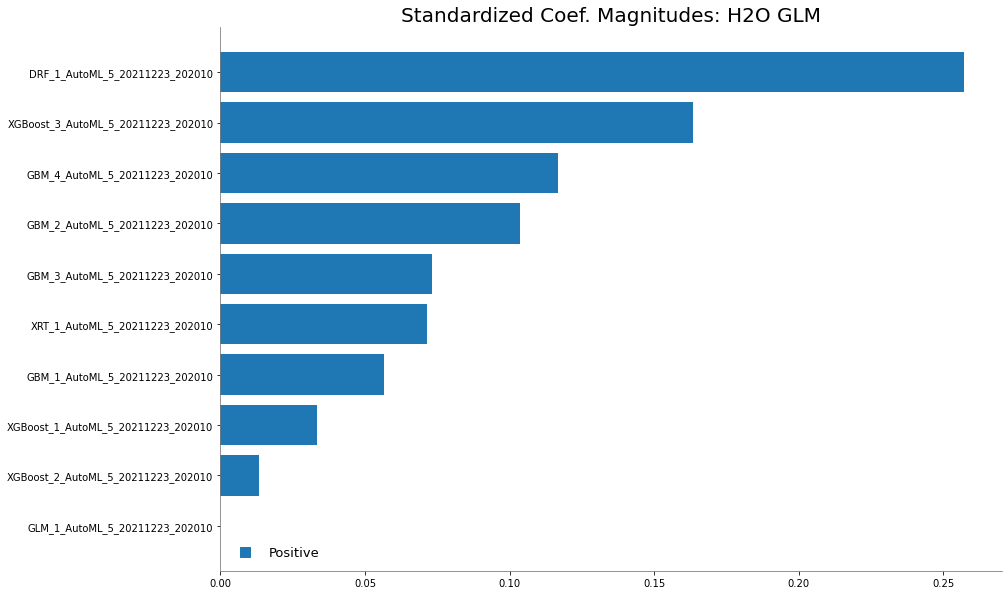

In [ ]:
%matplotlib inline
metalearner.std_coef_plot()

In [ ]:
aml1_perf_test = aml1.leader.model_performance(test1)
print(aml1_perf_test.accuracy())
print(aml1_perf_test.auc())
print(aml1_perf_test.aucpr())

aml1_perf_train = aml1.leader.model_performance(train1)
print(aml1_perf_train.accuracy())
print(aml1_perf_train.auc())
print(aml1_perf_train.aucpr())

aml1_perf_valid = aml1.leader.model_performance(valid1)
print(aml1_perf_valid.accuracy())
print(aml1_perf_valid.auc())
print(aml1_perf_valid.aucpr())

[[0.5334472732690223, 0.6553846153846153]]
0.7063644225626888
0.6369171677224604
[[0.5161363117582435, 0.8679476696647588]]
0.9502611779830693
0.9470747733996902
[[0.5213465338112147, 0.6593920498830865]]
0.7090389362840945
0.6290815627610543


In [ ]:
# aml1_80_77_HA = h2o.save_model(model = aml1.leader, path="/content/Models", force=True)
# print(aml1_80_77_HA)

/content/Models/StackedEnsemble_AllModels_2_AutoML_1_20210920_225358


In [ ]:
test_model(test1, 'H/A', aml1)
test_model(train1, 'H/A', aml1)
test_model(valid1, 'H/A', aml1)

stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%
shape of preds is (5850, 3)
shape of preds is (5850, 1)
accuracy is 0.6123076923076923
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%
shape of preds is (29352, 3)
shape of preds is (29352, 1)
accuracy is 0.7698623603161624
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%
shape of preds is (3849, 3)
shape of preds is (3849, 1)
accuracy is 0.606131462717589


#### WH

In [ ]:
aml2 = H2OAutoML(max_models = 10, seed = 1)
aml2.train(x = x2, y = y2, training_frame = train2)

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%
Model Details
H2OStackedEnsembleEstimator :  Stacked Ensemble
Model Key:  StackedEnsemble_AllModels_4_AutoML_6_20211223_202953

No model summary for this model

ModelMetricsBinomial: stackedensemble
** Reported on train data. **

MSE: 0.012057039528749062
RMSE: 0.1098045514937749
LogLoss: 0.08984319348281743
Mean Per-Class Error: 0.0033882257225162854
AUC: 0.9999155799810184
AUCPR: 0.9999108215511293
Gini: 0.9998311599620369

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.5603336048507292: 


0       1   Error            Rate
0      0  5076.0    22.0  0.0043   (22.0/5098.0)
1      1    12.0  4864.0  0.0025   (12.0/4876.0)
2  Total  5088.0  4886.0  0.0034   (34.0/9974.0)


Maximum Metrics: Maximum metrics at their respective thresholds


metric  threshold        value    idx
0                        max f1   0.560334     0.996517  183.0
1                        max f2   0.432068     0.997339  201.0
2                  max f0point5   0.611606     0.996716  176.0
3                  max accuracy   0.560334     0.996591  183.0
4                 max precision   0.983629     1.000000    0.0
5                    max recall   0.358847     1.000000  214.0
6               max specificity   0.983629     1.000000    0.0
7              max absolute_mcc   0.560334     0.993181  183.0
8    max min_per_class_accuracy   0.593454     0.996469  179.0
9   max mean_per_class_accuracy   0.560334     0.996612  183.0
10                      max tns   0.983629  5098.000000    0.0
11                      max fns   0.983629  4865.000000    0.0
12                      max fps   0.037585  5098.000000  399.0
13                      max tps   0.358847  4876.000000  214.0
14                      max tnr   0.983629     1.000000    0.0
15                      max fnr   0.983629     0.997744    0.0
16                      max fpr   0.037585     1.000000  399.0
17                      max tpr   0.358847     1.000000  214.0


Gains/Lift Table: Avg response rate: 48.89 %, avg score: 51.23 %


group  cumulative_data_fraction  ...  cumulative_gain  kolmogorov_smirnov
0       1                  0.011029  ...       104.552912            0.022559
1       2                  0.025767  ...       104.552912            0.052707
2       3                  0.030178  ...       104.552912            0.061731
3       4                  0.040004  ...       104.552912            0.081829
4       5                  0.050030  ...       104.552912            0.102338
5       6                  0.100160  ...       104.552912            0.204881
6       7                  0.152597  ...       104.552912            0.312141
7       8                  0.200020  ...       104.552912            0.409147
8       9                  0.299980  ...       104.552912            0.613618
9      10                  0.400040  ...       104.552912            0.818294
10     11                  0.500000  ...       100.000000            0.978227
11     12                  0.599960  ...        66.677807            0.782660
12     13                  0.700221  ...        42.812142            0.586505
13     14                  0.799980  ...        25.003133            0.391330
14     15                  0.900742  ...        11.019590            0.194194
15     16                  1.000000  ...         0.000000            0.000000

[16 rows x 14 columns]



ModelMetricsBinomial: stackedensemble
** Reported on cross-validation data. **

MSE: 0.11489789273544601
RMSE: 0.33896591677548643
LogLoss: 0.3679970970156909
Mean Per-Class Error: 0.16432445556364256
AUC: 0.9135938017066738
AUCPR: 0.9212232692031075
Gini: 0.8271876034133476

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.38472076887783946: 


0        1   Error               Rate
0      0  19091.0   4144.0  0.1784   (4144.0/23235.0)
1      1   3362.0  19007.0  0.1503   (3362.0/22369.0)
2  Total  22453.0  23151.0  0.1646   (7506.0/45604.0)


Maximum Metrics: Maximum metrics at their respective thresholds


metric  threshold         value    idx
0                        max f1   0.384721      0.835105  225.0
1                        max f2   0.191861      0.875229  305.0
2                  max f0point5   0.695393      0.868005  124.0
3                  max accuracy   0.510208      0.841856  183.0
4                 max precision   0.984338      1.000000    0.0
5                    max recall   0.039512      1.000000  398.0
6               max specificity   0.984338      1.000000    0.0
7              max absolute_mcc   0.538715      0.685325  174.0
8    max min_per_class_accuracy   0.415911      0.836112  214.0
9   max mean_per_class_accuracy   0.510208      0.841052  183.0
10                      max tns   0.984338  23235.000000    0.0
11                      max fns   0.984338  22259.000000    0.0
12                      max fps   0.036453  23235.000000  399.0
13                      max tps   0.039512  22369.000000  398.0
14                      max tnr   0.984338      1.000000    0.0
15                      max fnr   0.984338      0.995082    0.0
16                      max fpr   0.036453      1.000000  399.0
17                      max tpr   0.039512      1.000000  398.0


Gains/Lift Table: Avg response rate: 49.05 %, avg score: 49.06 %


group  cumulative_data_fraction  ...  cumulative_gain  kolmogorov_smirnov
0       1                  0.010021  ...       103.425321            0.020342
1       2                  0.020020  ...       103.424832            0.040640
2       3                  0.031006  ...       103.294707            0.062862
3       4                  0.040040  ...       103.424832            0.081280
4       5                  0.050018  ...       103.245783            0.101357
5       6                  0.100057  ...       102.173618            0.200653
6       7                  0.150009  ...       101.576721            0.299069
7       8                  0.200048  ...       100.251220            0.393627
8       9                  0.299996  ...        95.109175            0.560012
9      10                  0.400009  ...        84.805282            0.665814
10     11                  0.500000  ...        68.501051            0.672245
11     12                  0.599991  ...        51.297904            0.604094
12     13                  0.700004  ...        35.556651            0.488519
13     14                  0.799996  ...        21.753987            0.341576
14     15                  0.899987  ...        10.074577            0.177960
15     16                  1.000000  ...         0.000000            0.000000

[16 rows x 14 columns]

In [ ]:
lb2 = aml2.leaderboard

In [ ]:
lb2

model_id auc logloss aucpr mean_per_class_error rmse mse 
 
 
 StackedEnsemble_AllModels_4_AutoML_6_20211223_202953 0.913594 0.367997 0.921223 0.164324 0.338966 0.114898 
 StackedEnsemble_BestOfFamily_5_AutoML_6_20211223_202953 0.911361 0.3724 0.919157 0.165403 0.341404 0.116557 
 StackedEnsemble_AllModels_3_AutoML_6_20211223_202953 0.911275 0.37242 0.919236 0.163708 0.341085 0.116339 
 StackedEnsemble_BestOfFamily_4_AutoML_6_20211223_202953 0.909441 0.376311 0.916975 0.166927 0.343279 0.117841 
 StackedEnsemble_BestOfFamily_2_AutoML_6_20211223_202953 0.907318 0.384084 0.913983 0.166377 0.346578 0.120116 
 StackedEnsemble_BestOfFamily_6_AutoML_6_20211223_202953 0.907308 0.384203 0.914039 0.16681 0.346624 0.120148 
 StackedEnsemble_AllModels_5_AutoML_6_20211223_202953 0.907297 0.384197 0.913852 0.166926 0.346649 0.120166 
 StackedEnsemble_BestOfFamily_3_AutoML_6_20211223_202953 0.907288 0.384143 0.914005 0.167161 0.346608 0.120137 
 StackedEnsemble_AllModels_1_AutoML_6_20211223_202953 0.907285 0.384144 0.913998 0.167562 0.346637 0.120157 
 StackedEnsemble_AllModels_2_AutoML_6_20211223_202953 0.907262 0.384145 0.913973 0.167649 0.346643 0.120161

In [ ]:
lb2.head(rows=lb2.nrows)

model_id auc logloss aucpr mean_per_class_error rmse mse 
 
 
 StackedEnsemble_AllModels_4_AutoML_6_20211223_202953 0.913594 0.367997 0.921223 0.164324 0.338966 0.114898 
 StackedEnsemble_BestOfFamily_5_AutoML_6_20211223_202953 0.911361 0.3724 0.919157 0.165403 0.341404 0.116557 
 StackedEnsemble_AllModels_3_AutoML_6_20211223_202953 0.911275 0.37242 0.919236 0.163708 0.341085 0.116339 
 StackedEnsemble_BestOfFamily_4_AutoML_6_20211223_202953 0.909441 0.376311 0.916975 0.166927 0.343279 0.117841 
 StackedEnsemble_BestOfFamily_2_AutoML_6_20211223_202953 0.907318 0.384084 0.913983 0.166377 0.346578 0.120116 
 StackedEnsemble_BestOfFamily_6_AutoML_6_20211223_202953 0.907308 0.384203 0.914039 0.16681 0.346624 0.120148 
 StackedEnsemble_AllModels_5_AutoML_6_20211223_202953 0.907297 0.384197 0.913852 0.166926 0.346649 0.120166 
 StackedEnsemble_BestOfFamily_3_AutoML_6_20211223_202953 0.907288 0.384143 0.914005 0.167161 0.346608 0.120137 
 StackedEnsemble_AllModels_1_AutoML_6_20211223_202953 0.907285 0.384144 0.913998 0.167562 0.346637 0.120157 
 StackedEnsemble_AllModels_2_AutoML_6_20211223_202953 0.907262 0.384145 0.913973 0.167649 0.346643 0.120161 
 GBM_4_AutoML_6_20211223_202953 0.904739 0.393256 0.909941 0.16919 0.349841 0.122389 
 DRF_1_AutoML_6_20211223_202953 0.887415 0.445207 0.894417 0.190999 0.376243 0.141559 
 StackedEnsemble_BestOfFamily_1_AutoML_6_20211223_202953 0.881181 0.432805 0.882906 0.196705 0.37168 0.138146 
 XGBoost_2_AutoML_6_20211223_202953 0.875904 0.450564 0.876455 0.202293 0.377343 0.142388 
 GBM_3_AutoML_6_20211223_202953 0.875499 0.445274 0.877872 0.20344 0.377606 0.142586 
 XGBoost_1_AutoML_6_20211223_202953 0.873584 0.452021 0.873263 0.205015 0.379446 0.143979 
 GBM_1_AutoML_6_20211223_202953 0.872382 0.448918 0.873979 0.205265 0.379769 0.144224 
 GBM_2_AutoML_6_20211223_202953 0.862188 0.466095 0.864825 0.215671 0.388407 0.15086 
 XRT_1_AutoML_6_20211223_202953 0.849146 0.551835 0.843031 0.237129 0.428683 0.183769 
 XGBoost_3_AutoML_6_20211223_202953 0.840838 0.494321 0.844564 0.250481 0.402678 0.16215 
 GLM_1_AutoML_6_20211223_202953 0.763319 0.58305 0.760105 0.322948 0.445416 0.198396

In [ ]:
# Get model ids for all models in the AutoML Leaderboard
model_ids = list(aml2.leaderboard['model_id'].as_data_frame().iloc[:,0])
# Get the "All Models" Stacked Ensemble model
se = h2o.get_model([mid for mid in model_ids if "StackedEnsemble_AllModels" in mid][0])
# Get the Stacked Ensemble metalearner model
metalearner = se.metalearner()

In [ ]:
# metalearner.coef_norm()

In [ ]:
# %matplotlib inline
# metalearner.std_coef_plot()

In [ ]:
test_model(test2, 'W/H', aml2)
test_model(train2, 'W/H', aml2)
test_model(valid2, 'W/H', aml2)

stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%
shape of preds is (9191, 3)
shape of preds is (9191, 1)
accuracy is 0.841040147970841
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%
shape of preds is (45604, 3)
shape of preds is (45604, 1)
accuracy is 0.992084027716867
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%
shape of preds is (6038, 3)
shape of preds is (6038, 1)
accuracy is 0.847962901623054


In [ ]:
aml2_perf_test = aml2.leader.model_performance(test2)
print(aml2_perf_test.accuracy())
print(aml2_perf_test.auc())
print(aml2_perf_test.aucpr())

aml2_perf_train = aml2.leader.model_performance(train2)
print(aml2_perf_train.accuracy())
print(aml2_perf_train.auc())
print(aml2_perf_train.aucpr())

aml2_perf_valid = aml2.leader.model_performance(valid2)
print(aml2_perf_valid.accuracy())
print(aml2_perf_valid.auc())
print(aml2_perf_valid.aucpr())

[[0.4709836672868622, 0.8477858774888478]]
0.9205250290269541
0.9277027637326112
[[0.546736831198967, 0.9962064731163933]]
0.9999074967169156
0.9999004320748586
[[0.4912986492303371, 0.8504471679364027]]
0.9230541503387133
0.931692950547533
